In [183]:
options(digits = 9)
options(repr.plot.width=18, repr.plot.height=10)

In [184]:
# install.packages("xtable")
library(xtable)

# Preparacion del modelo

In [185]:
df_trm <- read.csv("trm.csv")
df_oil <- read.csv("ExpPETROLEO.csv")

In [186]:
df_trm$fecha <- as.Date(df_trm$fecha, format = "%d/%m/%Y")
df_oil$fecha <- as.Date(paste0("01-", df_oil$fecha), format = "%d-%b-%y")


In [187]:
df <- merge(df_trm, df_oil, by = "fecha", all = FALSE)
rm(df_trm, df_oil)
df$XOILCOP <- (df$ExpPetrol * df$TRM)/1000000
df <- df[, c("fecha", "XOILCOP")]
head(df)

fecha      XOILCOP   
1 1992-01-01 82.8151752
2 1992-02-01 65.9505013
3 1992-03-01 88.5414409
4 1992-04-01 79.1156893
5 1992-05-01 82.8059717
6 1992-06-01 64.0133782

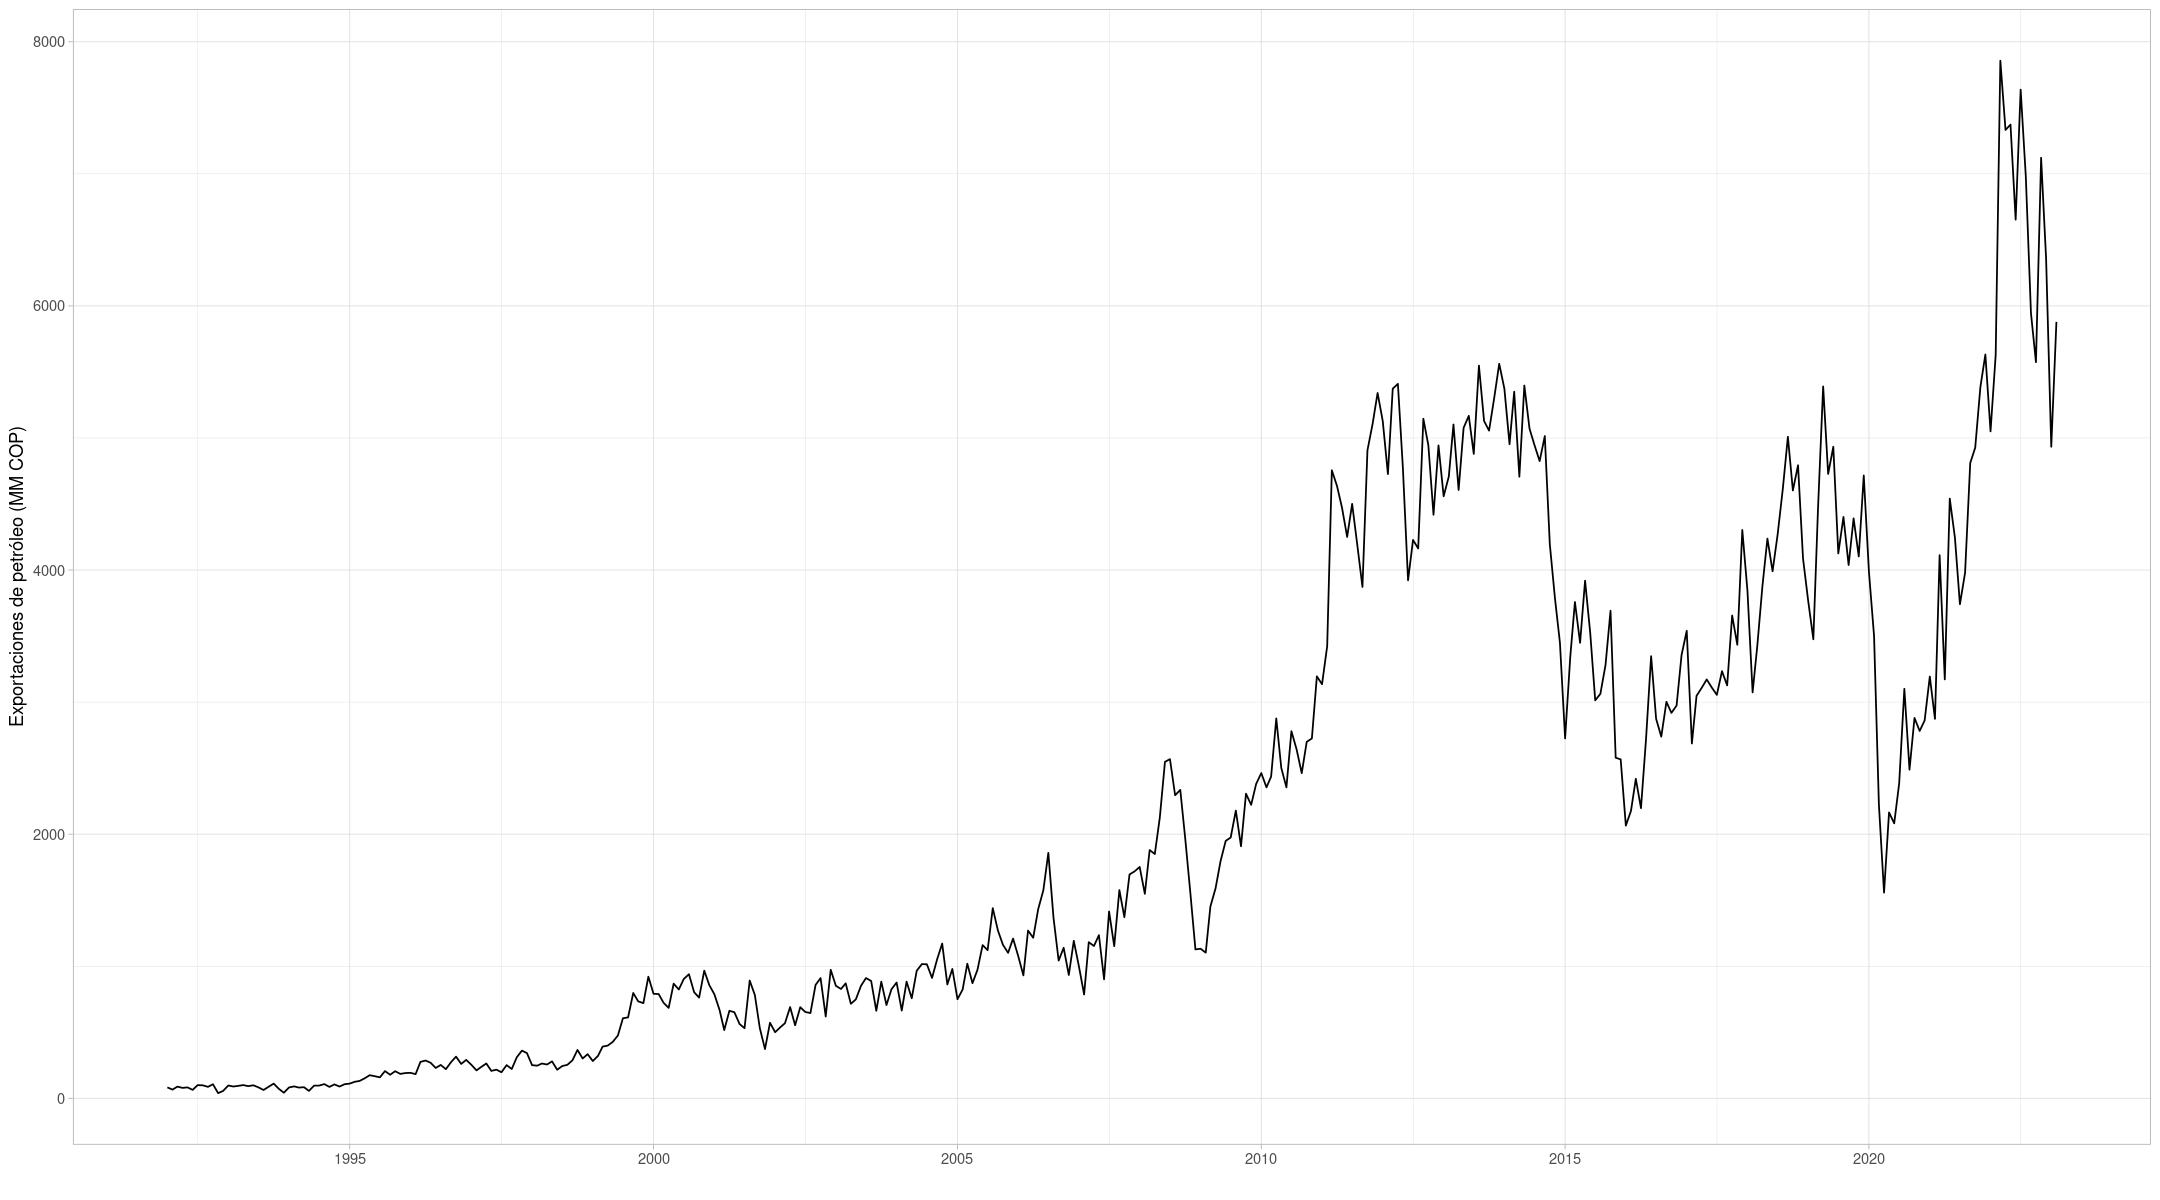

In [188]:
# install.packages("ggplot2")
library(ggplot2)

graph_ts <- ggplot(df, aes(x = fecha, y = XOILCOP)) + 
  geom_line() +
  xlab("") +
  ylab("Exportaciones de petróleo (MM COP)") +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
  scale_x_date(date_breaks = "5 years", date_labels = "%Y") +
  theme_light()

ggsave("../Imagenes/ts.png", plot = graph_ts, width = 6, height = 3.3)

graph_ts

In [189]:
# install.packages("tseries")
library(tseries)

myts <- ts(df$XOILCOP, start = 1992, frequency = 12)

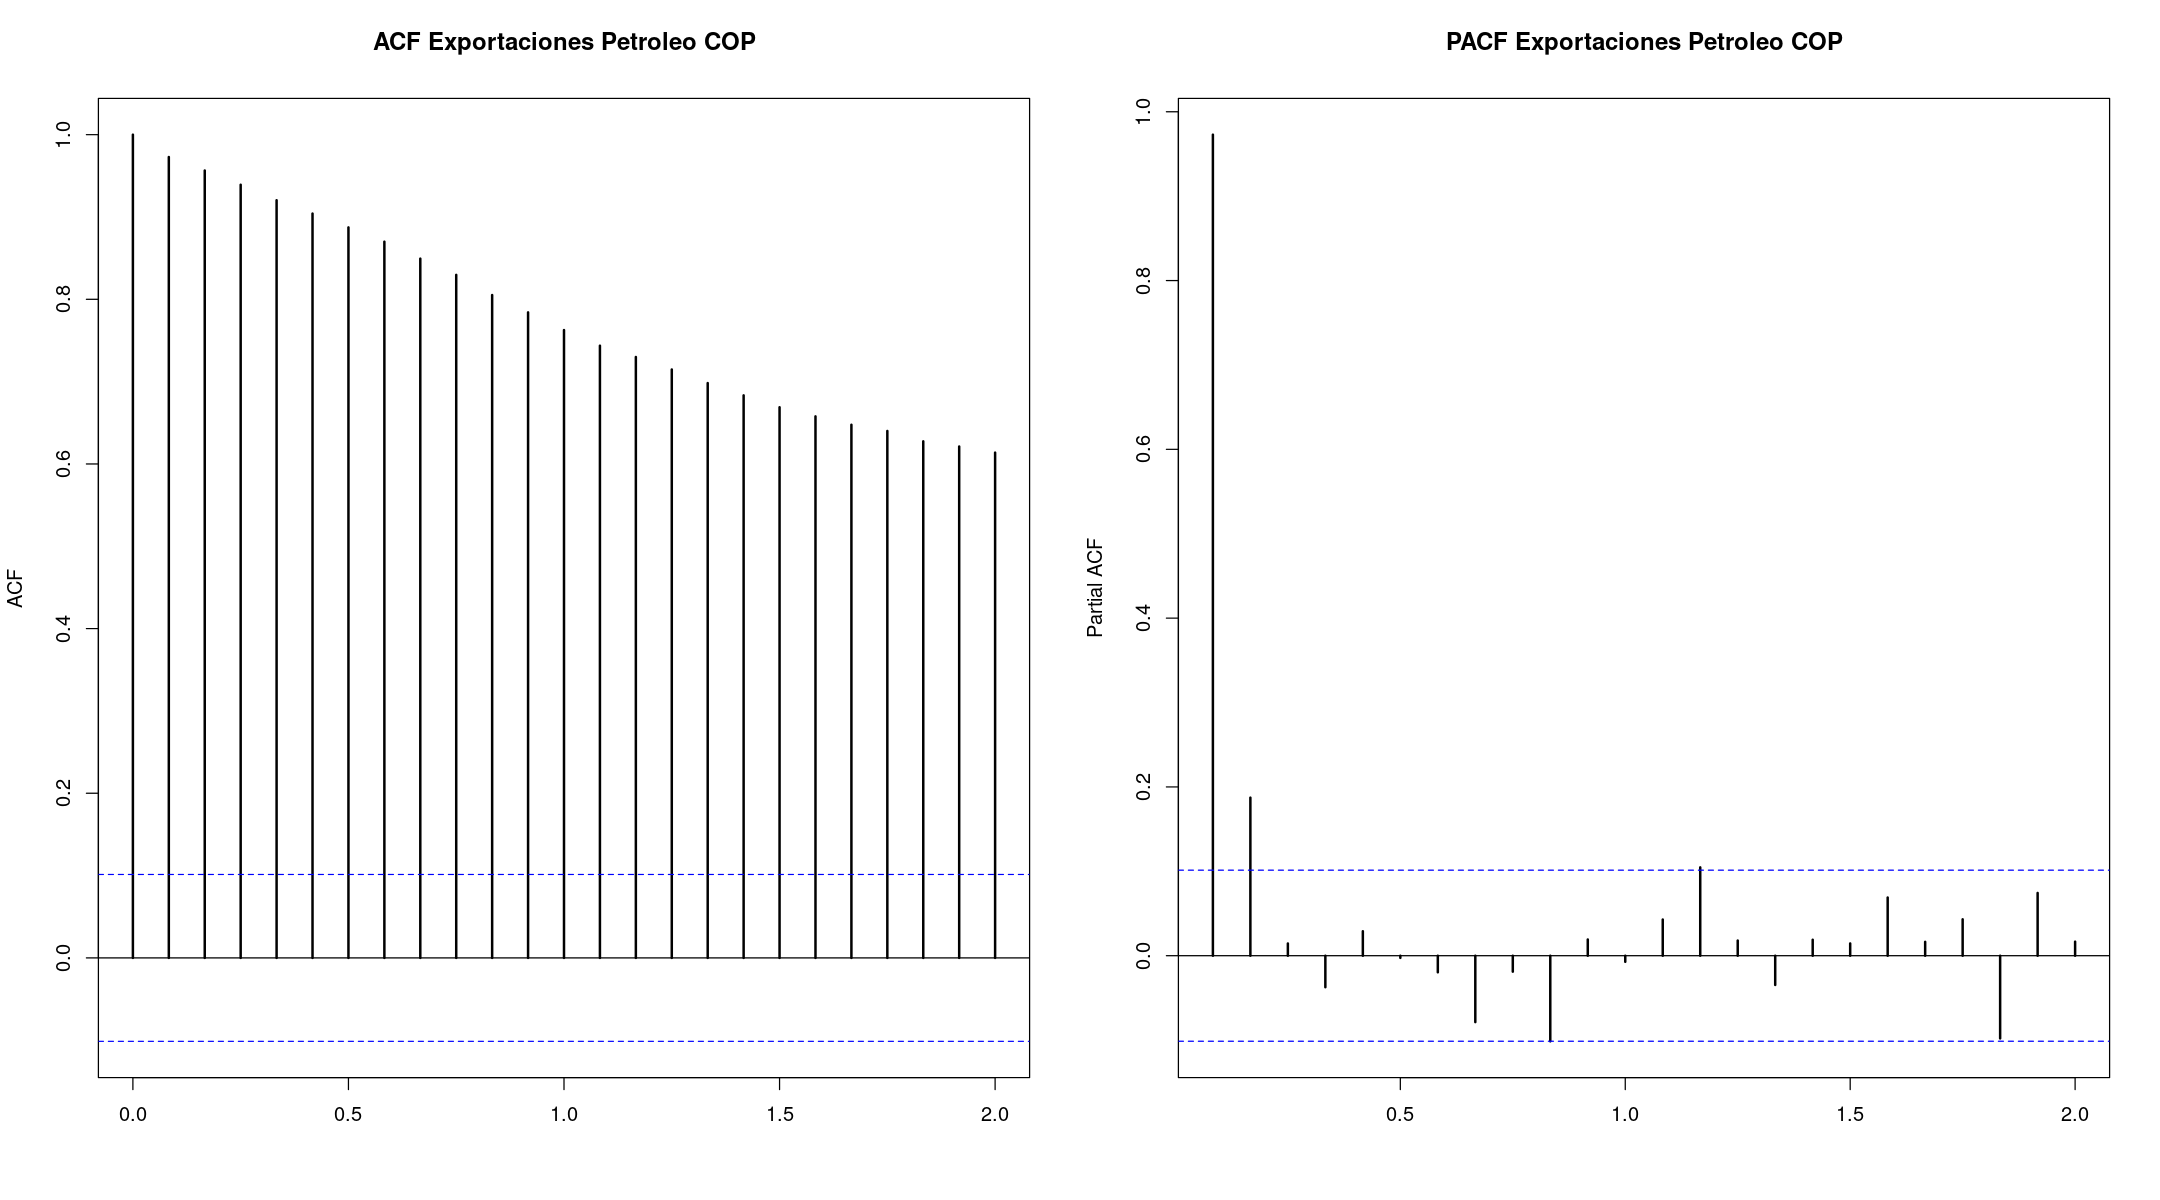

In [190]:
par(mfrow=c(1,2))
acf(myts,lag.max=24,plot=T,lwd=2,xlab='',main='ACF Exportaciones Petroleo COP') 
pacf(myts,lag.max=24,plot=T,lwd=2,xlab='',main='PACF Exportaciones Petroleo COP')

In [191]:
png("../Imagenes/acf_pacf1.png", width = 600, height = 333)
par(mfrow=c(1,2))
acf(myts,lag.max=24,plot=T,lwd=2,xlab='',main='') 
pacf(myts,lag.max=24,plot=T,lwd=2,xlab='',main='')
dev.off()

png 
  2


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-1490.4264  -150.9680     2.0238   115.5861  2352.2848 

Coefficients:
               Estimate  Std. Error  t value  Pr(>|t|)   
(Intercept) -46.2420147  41.7722985 -1.10700 0.2690162   
z.lag.1      -0.0686684   0.0208890 -3.28731 0.0011089 **
tt            1.1254633   0.3659611  3.07536 0.0022596 **
z.diff.lag   -0.1716035   0.0517328 -3.31711 0.0010002 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 373.047 on 368 degrees of freedom
Multiple R-squared:  0.0693104,	Adjusted R-squared:  0.0617233 
F-statistic: 9.13525 on 3 and 368 DF,  p-value: 7.60715e-06


Value of test-statistic is: -3.2873 3.9632 5.4975 

Critical values for test statisti

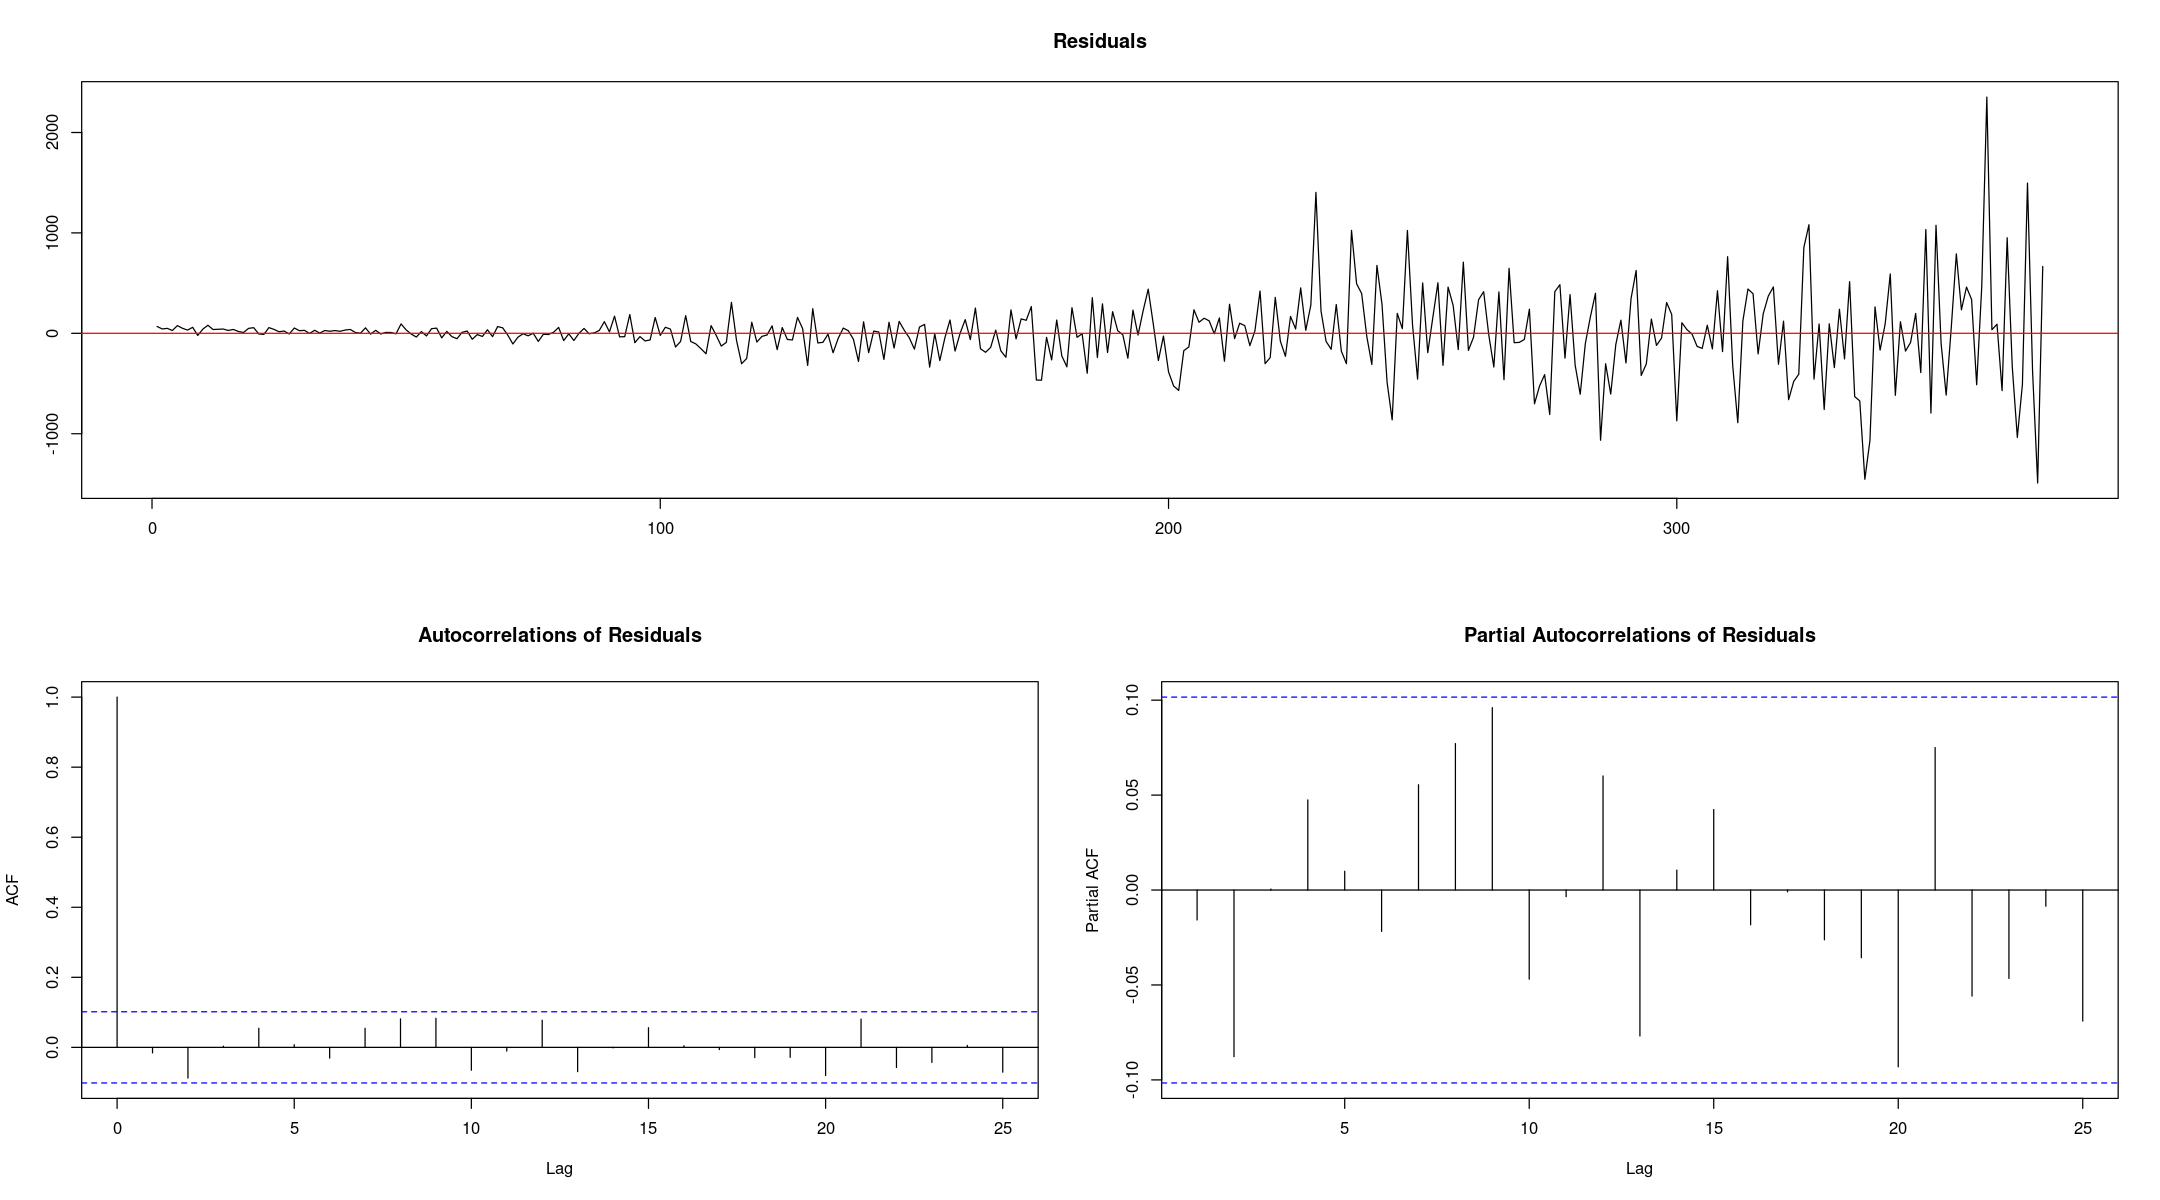

In [192]:
# install.packages("urca")
library(urca)

adf.trend_oil= ur.df(myts, type="trend", lags = 1); plot(adf.trend_oil)
summary(adf.trend_oil)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-1539.5742  -136.0200   -27.4593   142.8552  2368.8039 

Coefficients:
              Estimate Std. Error  t value   Pr(>|t|)    
(Intercept) 45.4878982 29.5779995  1.53790 0.12493098    
z.lag.1     -0.0127470  0.0103983 -1.22587 0.22102934    
z.diff.lag  -0.1985428  0.0515668 -3.85020 0.00013909 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 377.299 on 369 degrees of freedom
Multiple R-squared:  0.045391,	Adjusted R-squared:  0.040217 
F-statistic: 8.77286 on 2 and 369 DF,  p-value: 0.000189586


Value of test-statistic is: -1.2259 1.1886 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47  4.61  3.7

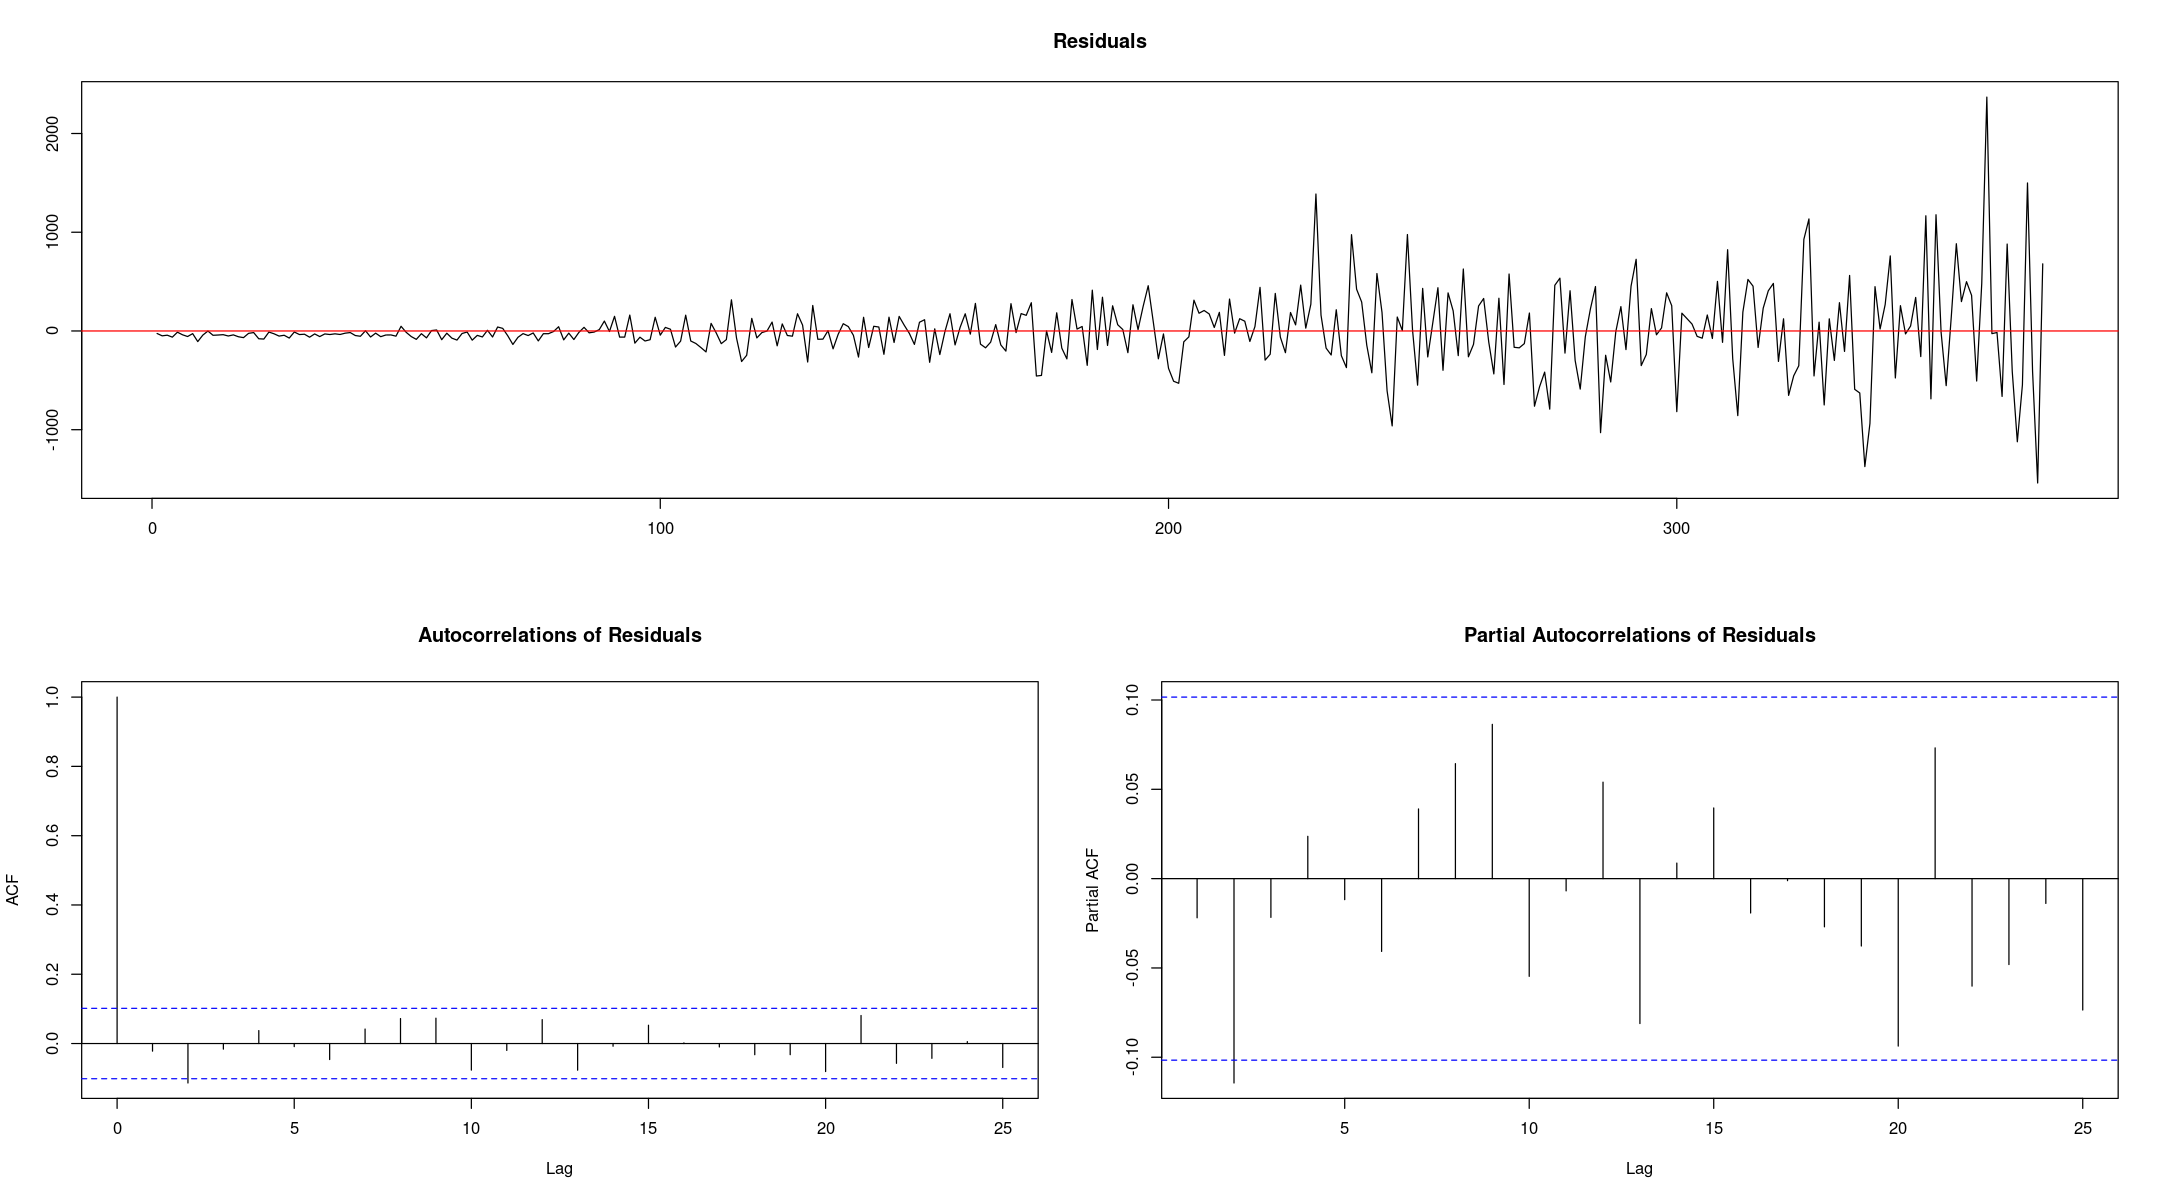

In [193]:
adf.drift_oil <- ur.df(myts, type="drift", lags = 1); plot(adf.drift_oil)
summary(adf.drift_oil) 

In [194]:
d.ts= diff(myts) #variacion
l.ts= log(myts) #logaritmo
dl.ts= diff(log(myts)) #tasa de crecimiento

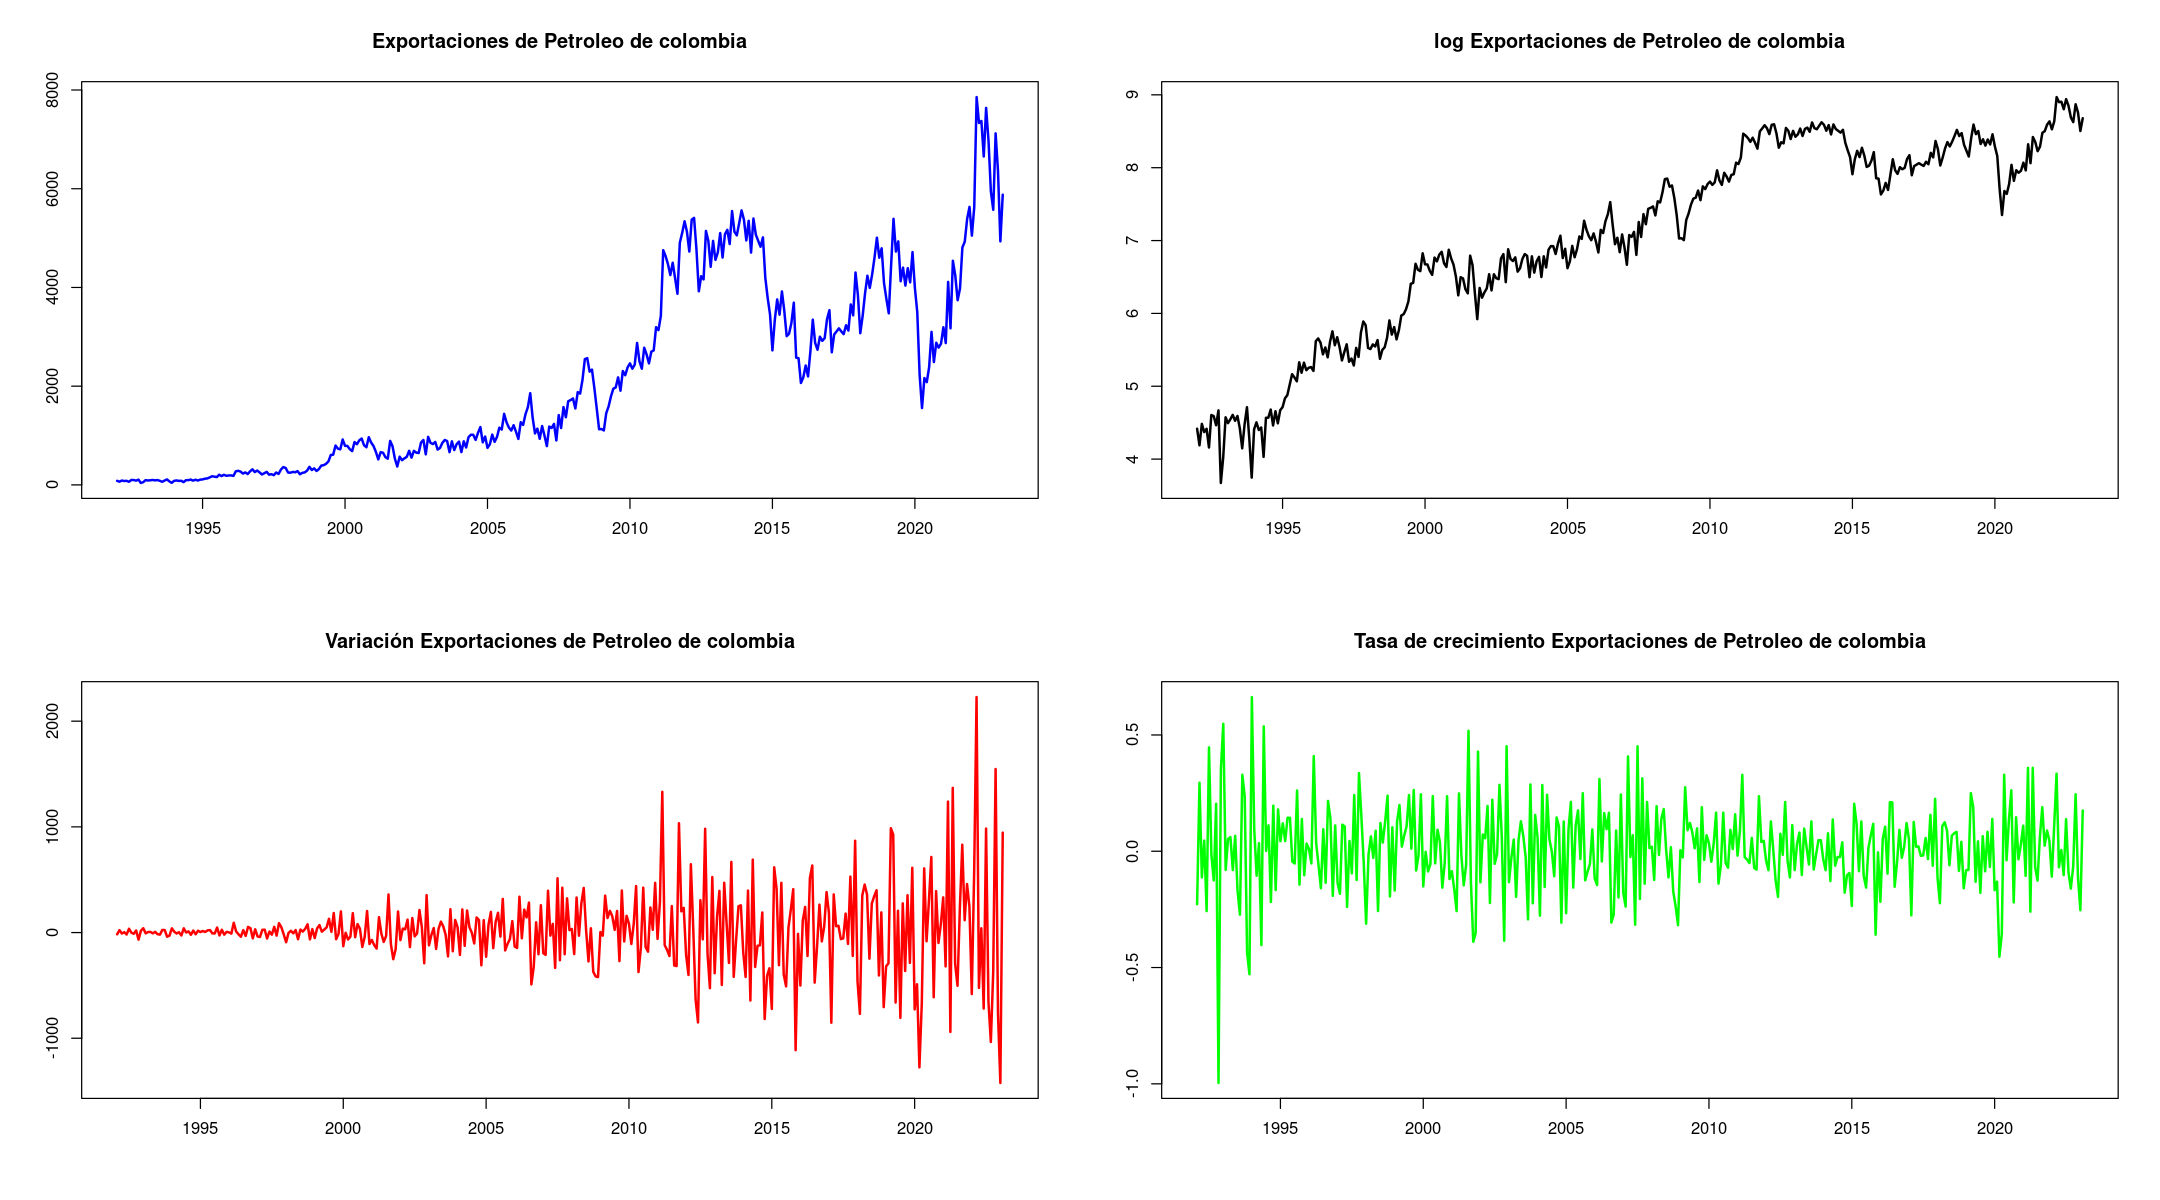

In [195]:
par(mfrow=c(2,2))
plot.ts(myts, xlab="",ylab="", main="Exportaciones de Petroleo de colombia",lty=1, lwd=2, col="blue")
plot.ts(l.ts, xlab="",ylab="", main="log Exportaciones de Petroleo de colombia",lty=1, lwd=2, col="black")
plot.ts(d.ts, xlab="",ylab="", main="Variación Exportaciones de Petroleo de colombia",lty=1, lwd=2, col="red")
plot.ts(dl.ts, xlab="",ylab="", main="Tasa de crecimiento Exportaciones de Petroleo de colombia",lty=1, lwd=2, col="green")


In [196]:
png("../Imagenes/creci_ts.png", width = 600, height = 333)
plot.ts(dl.ts, xlab="",ylab="", main="Tasa de crecimiento-Exportaciones de Petroleo de colombia (MM COP) 1992-2023",lty=1, lwd=2, col="green")
abline(h=0)
dev.off()


png 
  2

In [197]:
png("../Imagenes/acf_pacf2.png", width = 600, height = 333)
par(mfrow=c(1,2))
acf(dl.ts,lag.max=24,plot=T,lwd=2,xlab='',main='')
pacf(dl.ts,lag.max=24,plot=T,lwd=2,xlab='',main='')
dev.off()

png 
  2

In [198]:
x <- ur.df(dl.ts, type="trend", lags = 1)
summary(x)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.9785726 -0.0976694  0.0108752  0.1086276  0.4784091 

Coefficients:
                Estimate   Std. Error   t value   Pr(>|t|)    
(Intercept)  2.95850e-02  1.84636e-02   1.60235  0.1099392    
z.lag.1     -1.48156e+00  8.24827e-02 -17.96214 < 2.22e-16 ***
tt          -6.77231e-05  8.54004e-05  -0.79301  0.4282859    
z.diff.lag   1.56268e-01  5.14953e-02   3.03461  0.0025802 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.175956 on 367 degrees of freedom
Multiple R-squared:  0.650218,	Adjusted R-squared:  0.647359 
F-statistic: 227.409 on 3 and 367 DF,  p-value: < 2.22e-16


Value of test-statistic is: -17.9621 107.5486 161.3222 

Criti

In [199]:
adf.dl.ts <- ur.df(dl.ts, type="drift", selectlags = "AIC")
summary(adf.dl.ts)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.9666692 -0.0982386  0.0105768  0.1064398  0.4911225 

Coefficients:
               Estimate  Std. Error   t value   Pr(>|t|)    
(Intercept)  0.01688384  0.00918096   1.83901  0.0667199 .  
z.lag.1     -1.47839479  0.08234418 -17.95385 < 2.22e-16 ***
z.diff.lag   0.15487693  0.05143944   3.01086  0.0027849 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.175867 on 368 degrees of freedom
Multiple R-squared:  0.649619,	Adjusted R-squared:  0.647715 
F-statistic: 341.143 on 2 and 368 DF,  p-value: < 2.22e-16


Value of test-statistic is: -17.9538 161.1711 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  

In [200]:
# install.packages("psych")
library(psych)

describe(dl.ts)
describe(d.ts)

vars n   mean         sd          median       trimmed      mad        
X1 1    373 0.0114276566 0.185462235 0.0134589562 0.0110117748 0.169462417
   min          max         range      skew         kurtosis   se           
X1 -0.996333379 0.662717681 1.65905106 -0.207069372 2.36296975 0.00960287054

vars n   mean       sd         median     trimmed    mad        min        
X1 1    373 15.5391373 384.607909 6.22098492 9.54857042 213.641024 -1423.41157
   max       range      skew        kurtosis   se        
X1 2227.7271 3651.13867 0.644282283 4.83728888 19.9142427

# Identificaion del Modelo

In [201]:
##Identificación-ARIMA-Manual
AR.m <- 6
MA.m <- 6
arma_seleccion_df = function(ts_object, AR.m, MA.m, d, bool_trend, metodo){
  index = 1
  df = data.frame(p = double(), d = double(), q = double(), AIC = double(), BIC = double())
  for (p in 0:AR.m) {
    for (q in 0:MA.m)  {
      fitp <- arima(ts_object, order = c(p, d, q), include.mean = bool_trend, 
                    method = metodo)
      df[index,] = c(p, d, q, AIC(fitp), BIC(fitp))
      index = index + 1
    }
  }  
  return(df)
}

# install.packages("dplyr")
library(dplyr)

#mejor segun AIC
arma_min_AIC = function(df){
  df2 = df %>% 
    filter(AIC == min(AIC))
  return(df2)
}

#mejor segun BIC
arma_min_BIC = function(df){
  df2 = df %>% 
    filter(BIC == min(BIC))
  return(df2)
}


In [202]:
#con d=1
mod_d1_ts = arma_seleccion_df(l.ts, AR.m, MA.m, d = 1, TRUE, "ML")
# View(mod_d1_ts)

Warning message in arima(ts_object, order = c(p, d, q), include.mean = bool_trend, :
“possible convergence problem: optim gave code = 1”
Warning message in arima(ts_object, order = c(p, d, q), include.mean = bool_trend, :
“possible convergence problem: optim gave code = 1”


In [203]:
min_aic_lts = arma_min_AIC(mod_d1_ts); min_aic_lts #(4,1,2)
min_bic_lts = arma_min_BIC(mod_d1_ts); min_bic_lts #(0,1,1)

p d q AIC         BIC      
1 4 1 2 -242.309248 -214.8582

p d q AIC         BIC        
1 0 1 1 -233.321254 -225.478098

In [204]:
#con d=0
mod_d0_ts = arma_seleccion_df(dl.ts, AR.m, MA.m, d = 0, TRUE, "ML")
##View(mod_d0_ts)

min_aic_dlts = arma_min_AIC(mod_d0_ts); min_aic_dlts #(4,0,3)
min_bic_dlts = arma_min_BIC(mod_d0_ts); min_bic_dlts #(0,0,1)

Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in arima(ts_object, order = c(p, d, q), include.mean = bool_trend, :
“possible convergence problem: optim gave code = 1”
Warning message in arima(ts_object, order = c(p, d, q), include.mean = bool_trend, :
“possible convergence problem: optim gave code = 1”
Warning message in arima(ts_object, order = c(p, d, q), include.mean = bool_trend, :
“possible convergence problem: optim gave code = 1”


p d q AIC        BIC        
1 4 0 3 -243.32993 -208.035724

p d q AIC         BIC        
1 0 0 1 -235.353238 -223.588503

In [205]:
aic_bic <- rbind(min_aic_lts, min_bic_lts, min_aic_dlts, min_bic_dlts)
print(xtable(aic_bic))

% latex table generated in R 4.3.0 by xtable 1.8-4 package
% Sat Apr 29 11:40:45 2023
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrr}
  \hline
 & p & d & q & AIC & BIC \\ 
  \hline
1 & 4.00 & 1.00 & 2.00 & -242.31 & -214.86 \\ 
  2 & 0.00 & 1.00 & 1.00 & -233.32 & -225.48 \\ 
  3 & 4.00 & 0.00 & 3.00 & -243.33 & -208.04 \\ 
  4 & 0.00 & 0.00 & 1.00 & -235.35 & -223.59 \\ 
   \hline
\end{tabular}
\end{table}


In [206]:
# install.packages("tidyverse", dependencies = T)
library(tidyverse)
# install.packages("tsibble")
library(tsibble)

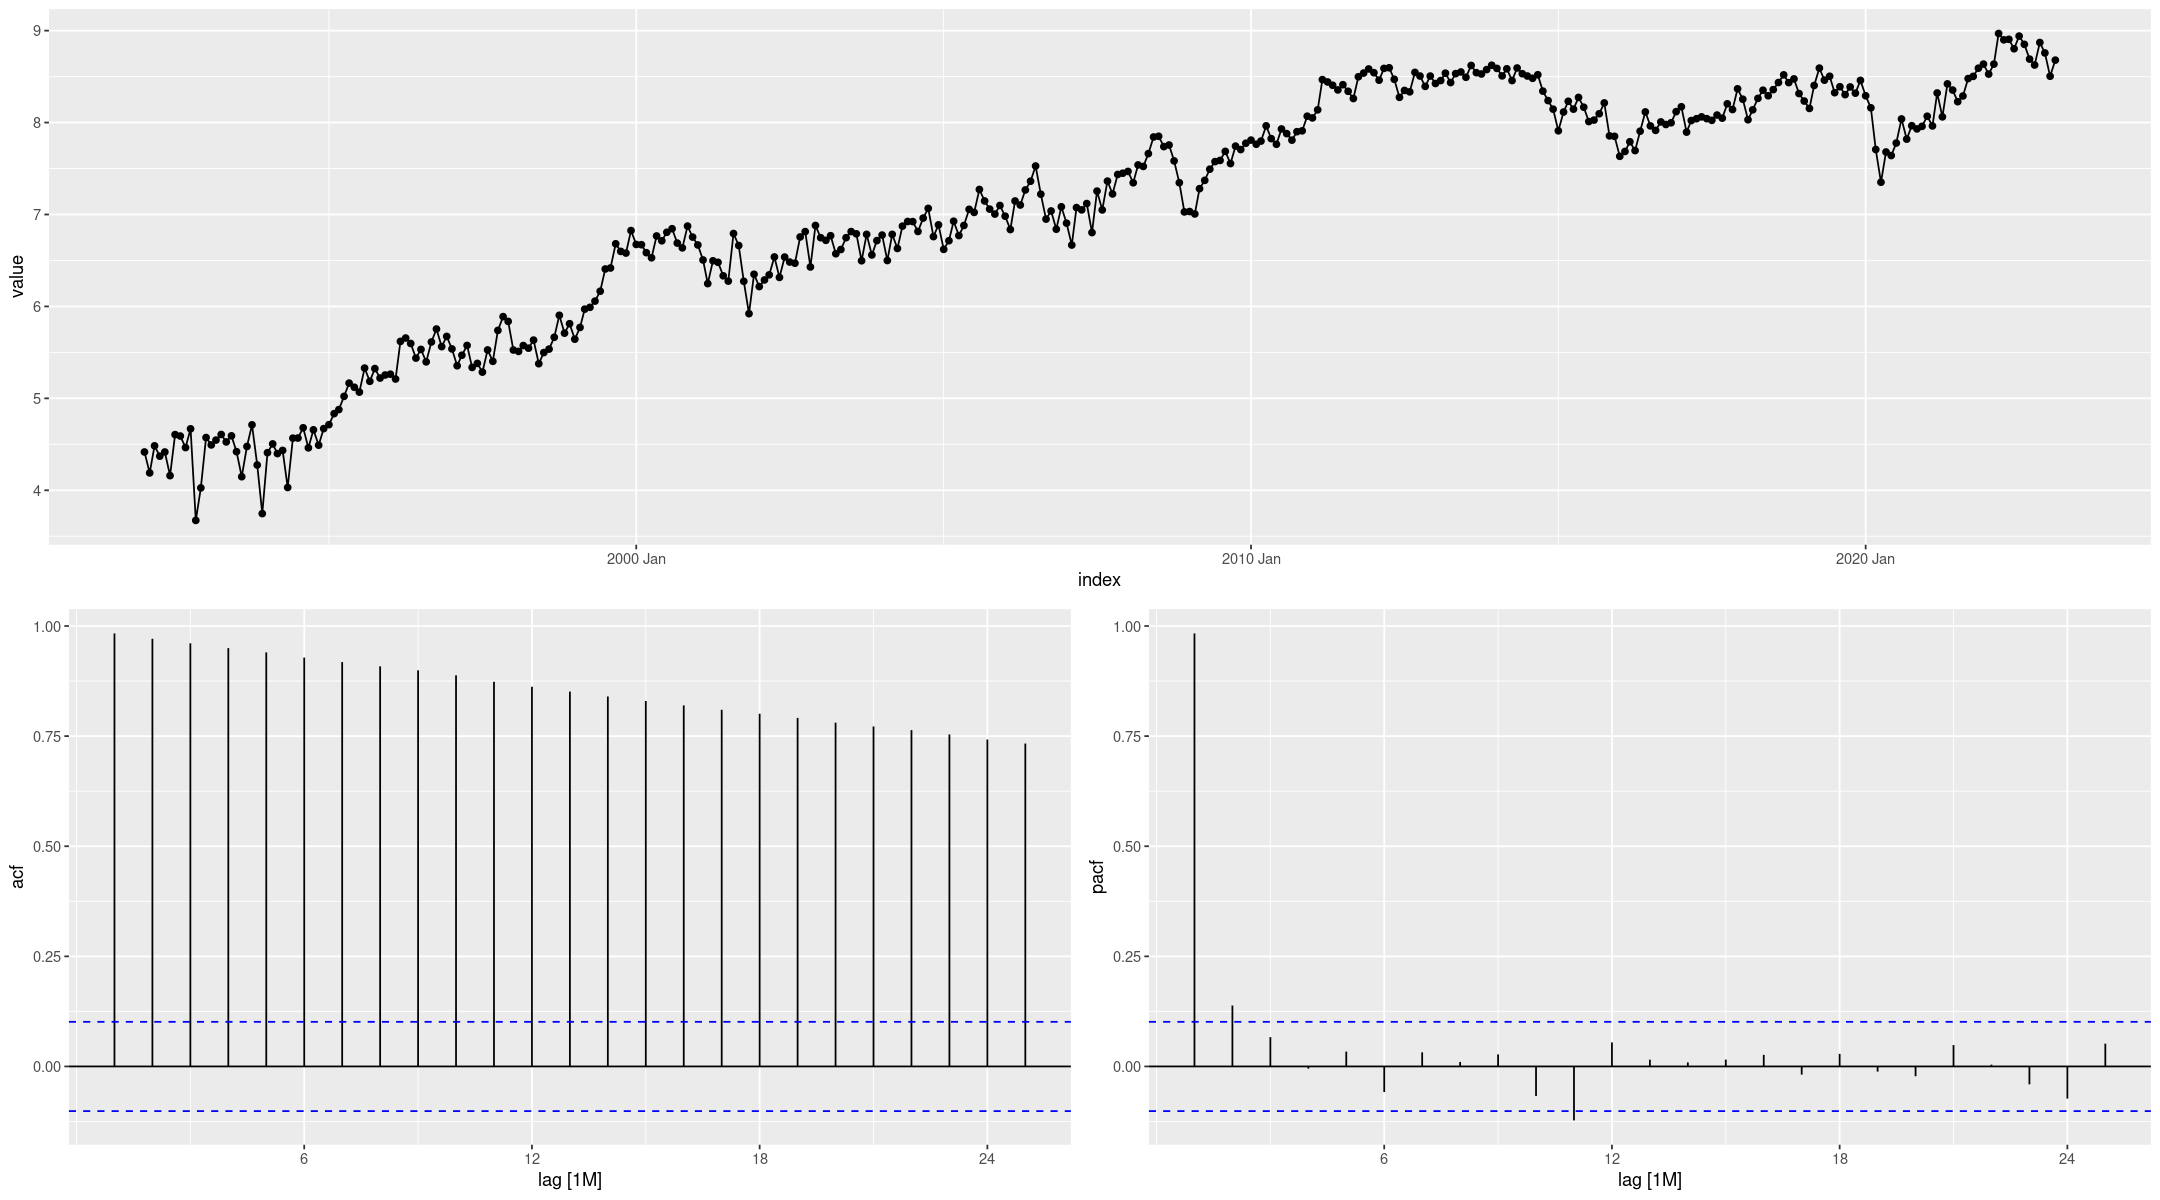

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


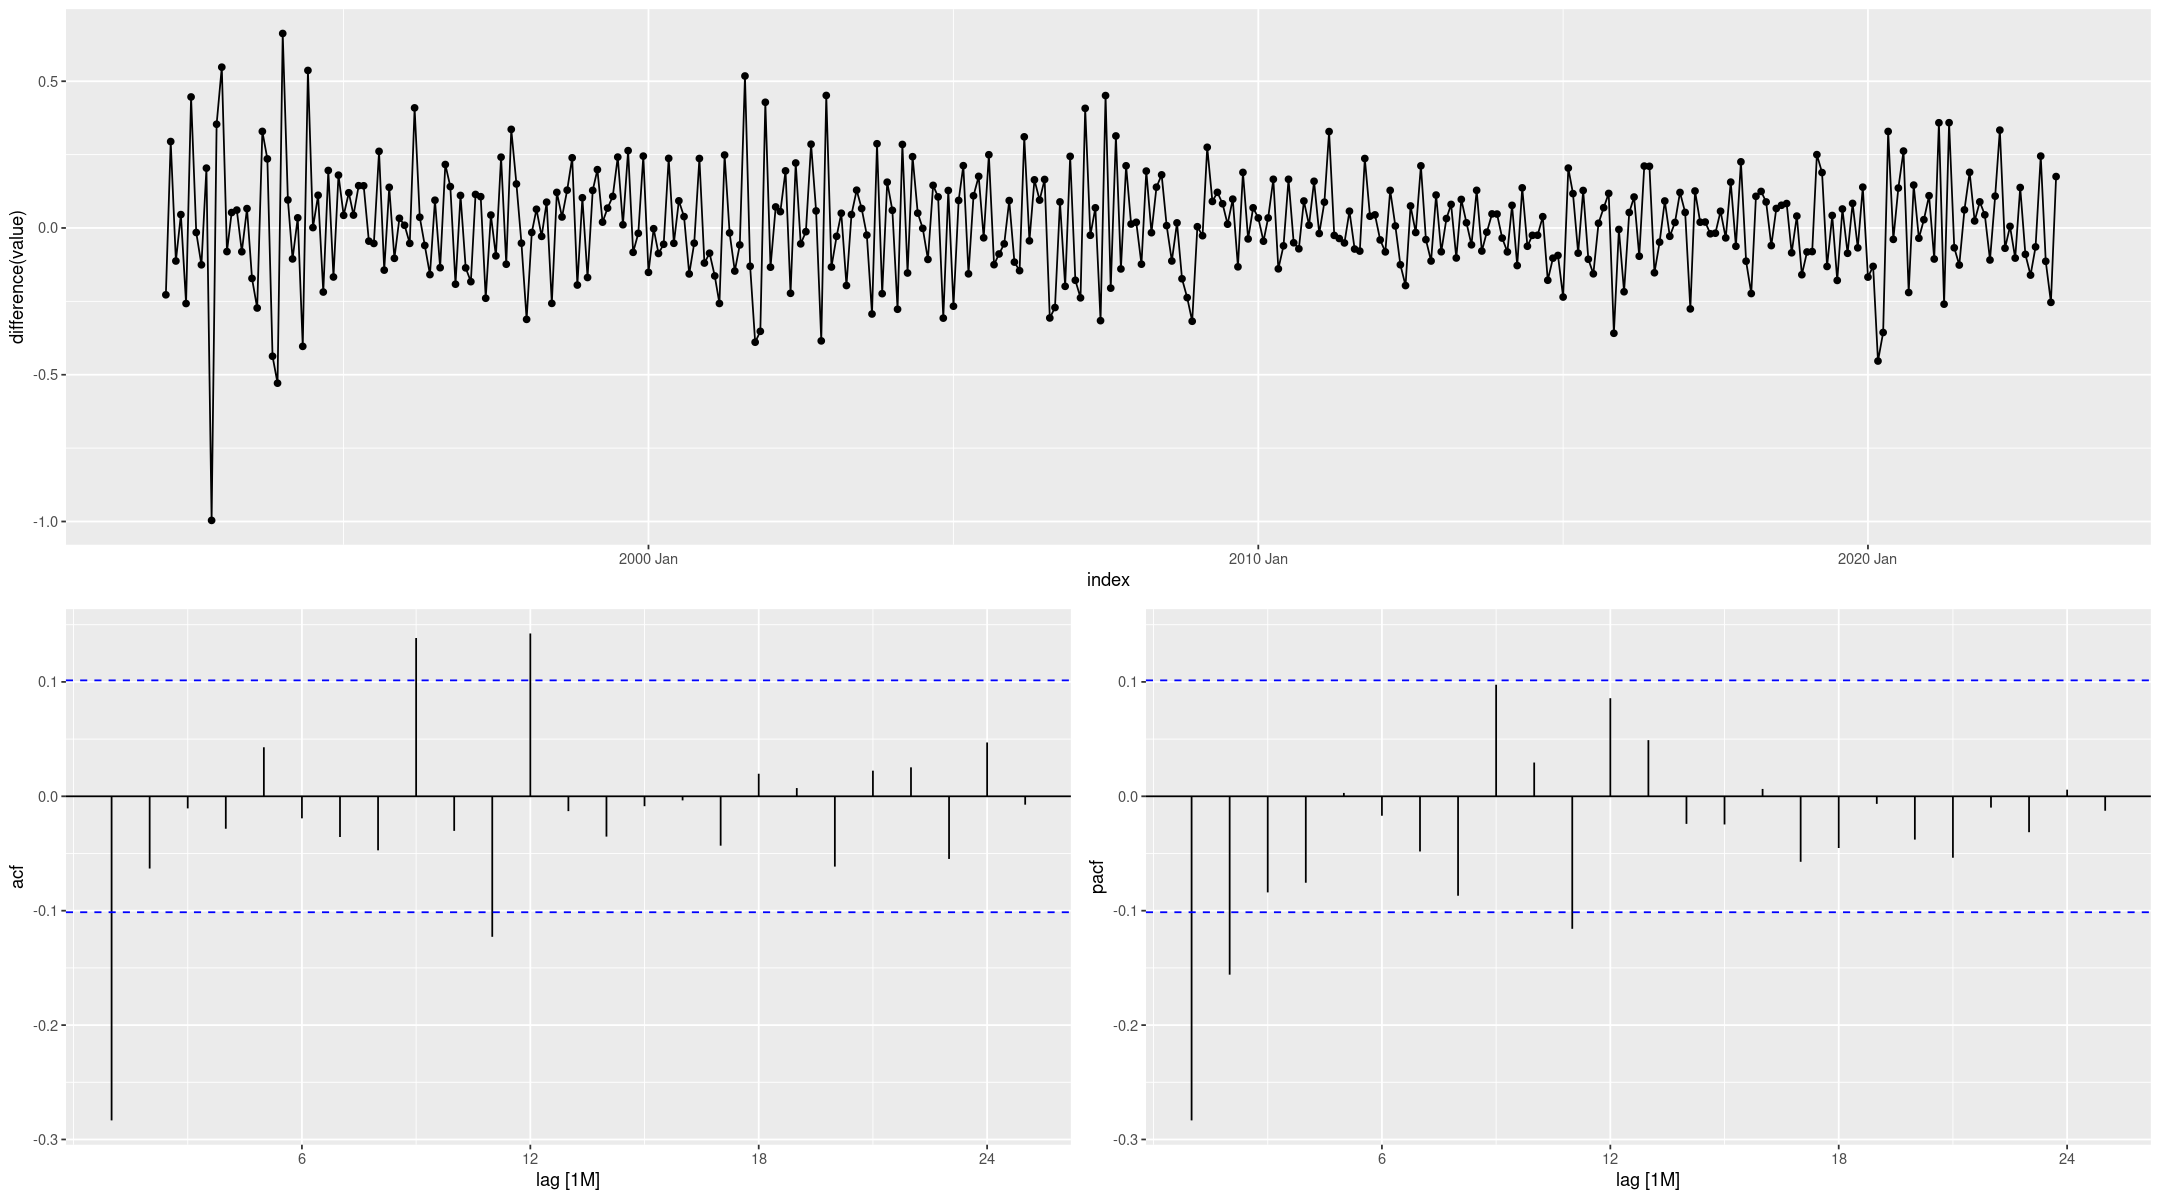

In [207]:
#ARIMA del paquete fable 
l.tsibble=as_tsibble(l.ts)
#class(l.tsibble)
#glimpse(l.tsibble)
# install.packages("feasts")
library(feasts)

l.tsibble %>%
  gg_tsdisplay(value, plot_type='partial')

l.tsibble %>%
  gg_tsdisplay(difference(value), plot_type='partial')

In [208]:
# Usando el criterio de información AIC
# install.packages("fable", dependencies = TRUE)
library(fable)

l.st_fit_aic <- l.tsibble %>%
  model(stepwise = ARIMA(value, ic = "aic"),
        search = ARIMA(value, ic = "aic", stepwise=FALSE))

l.st_fit_aic %>% pivot_longer(everything(), names_to = "Model name",
                         values_to = "Orders")

Model name Orders                            
1 stepwise   <ARIMA(0,1,1)(2,0,0)[12] w/ drift>
2 search     <ARIMA(0,1,1)(2,0,0)[12] w/ drift>

ambos modelos recomendados son SARIMA que modelan parte estacional

In [209]:
# Usando el criterio de información BIC
l.st_fit_bic <- l.tsibble %>%
  model(stepwise = ARIMA(value, ic = "bic"),
        search = ARIMA(value, ic = "bic", stepwise=FALSE))

l.st_fit_bic %>% pivot_longer(everything(), names_to = "Model name",
                                   values_to = "Orders")

Model name Orders                   
1 stepwise   <ARIMA(0,1,1)(2,0,0)[12]>
2 search     <ARIMA(0,1,1)(2,0,0)[12]>

In [210]:
# install.packages("knitr")
library(knitr)

step_search <- rbind(l.st_fit_aic %>% pivot_longer(everything(), names_to = "Model name",
                         values_to = "Orders"), l.st_fit_aic %>% pivot_longer(everything(), names_to = "Model name",
                         values_to = "Orders"))

kable(step_search, format = "latex")


\begin{tabular}{l|l}
\hline
Model name & Orders\\
\hline
stepwise & <ARIMA(0,1,1)(2,0,0)[12] w/ drift>\\
\hline
search & <ARIMA(0,1,1)(2,0,0)[12] w/ drift>\\
\hline
stepwise & <ARIMA(0,1,1)(2,0,0)[12] w/ drift>\\
\hline
search & <ARIMA(0,1,1)(2,0,0)[12] w/ drift>\\
\hline
\end{tabular}

ambos modelos recomendados son SARIMA que modelan parte estacional

# Estimacion del modelo

In [211]:
# install.packages("tsibble")
library(tsibble)

arima_4.1.2_lts_fable  = as_tsibble(l.ts) %>%
  model(arima412 = ARIMA(value ~ pdq(4,1,2) + PDQ(0, 0, 0)))

arima_0.1.1_lts_fable  = as_tsibble(l.ts) %>%
  model(arima011 = ARIMA(value ~ pdq(0,1,1) + PDQ(2, 0, 0)))

arima_4.0.3_lts_fable  = as_tsibble(l.ts) %>%
  model(arima403 = ARIMA(value ~ pdq(4,0,3) + PDQ(0, 0, 0)))

arima_0.0.1_lts_fable  = as_tsibble(l.ts) %>%
  model(arima001 = ARIMA(value ~ pdq(0,0,1) + PDQ(0, 0, 0)))

Warning message:
“It looks like you're trying to fully specify your ARIMA model but have not said if a constant should be included.
You can include a constant using `ARIMA(y~1)` to the formula or exclude it by adding `ARIMA(y~0)`.”
Warning message:
“1 error encountered for arima403
[1] There are no ARIMA models to choose from after imposing the `order_constraint`, please consider allowing more models.
”


In [212]:
arima_4.1.2_lts <- arima(l.ts, order = c(4,1,2), include.mean = T, method = "ML") # modelamiento ARIMA (4,1,2) #Recomendado AIC D=1
arima_0.1.1_lts <- arima(l.ts, order = c(0,1,1), seasonal = list(order = c(2, 0, 0)), include.mean = T, method = "ML") # modelamiento ARIMA (0,1,1) #Recomendado BIC D=1 y SARIMA en todos los modelos.
arima_4.0.3_dlts <- arima(dl.ts, order = c(4,0,3), include.mean = T, method = "ML") # modelamiento ARIMA (4,0,3) #Recomendado AIC D=0
arima_0.0.1_dlts <- arima(dl.ts, order = c(0,0,1), include.mean = T, method = "ML") # modelamiento ARIMA (0,0,1)

In [213]:
# install.packages("stargazer")
library(stargazer)

In [214]:
stargazer(arima_4.1.2_lts, arima_0.1.1_lts, arima_4.0.3_dlts,arima_0.0.1_dlts,
          column.labels=c("ARIMA (4,1,2)", "ARIMA (0,1,1)","ARMA (4,3)","AR(1)"),keep.stat=c("n","rsq"), 
          type = "latex", style = "aer")


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Sat, Apr 29, 2023 - 11:40:55 AM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
\\[-1.8ex] & \multicolumn{2}{c}{l.ts} & \multicolumn{2}{c}{dl.ts} \\ 
 & ARIMA (4,1,2) & ARIMA (0,1,1) & ARMA (4,3) & AR(1) \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4)\\ 
\hline \\[-1.8ex] 
 ar1 & $-$0.699$^{***}$ &  & $-$0.446$^{*}$ &  \\ 
  & (0.059) &  & (0.261) &  \\ 
  & & & & \\ 
 ar2 & $-$1.196$^{***}$ &  & $-$1.026$^{***}$ &  \\ 
  & (0.061) &  & (0.197) &  \\ 
  & & & & \\ 
 ar3 & $-$0.412$^{***}$ &  & $-$0.145 &  \\ 
  & (0.060) &  & (0.282) &  \\ 
  & & & & \\ 
 ar4 & $-$0.215$^{***}$ &  & $-$0.150 &  \\ 
  & (0.053) &  & (0.102) &  \\ 
  & & & & \\ 
 ma1 & 0.383$^{***}$ & $-$0.352$^{***}$ & 0.109 & $-$0.379$^{***}$ \\ 
  & (0.035) & (0.053) & (0.266) & (0.053) \\ 
  & & & & \\ 
 ma

# Validacion del Modelo

In [215]:
# install.packages('forecast')
library(forecast)

# install.packages("aTSA")
library(aTSA)

# install.packages("car")
library(car)

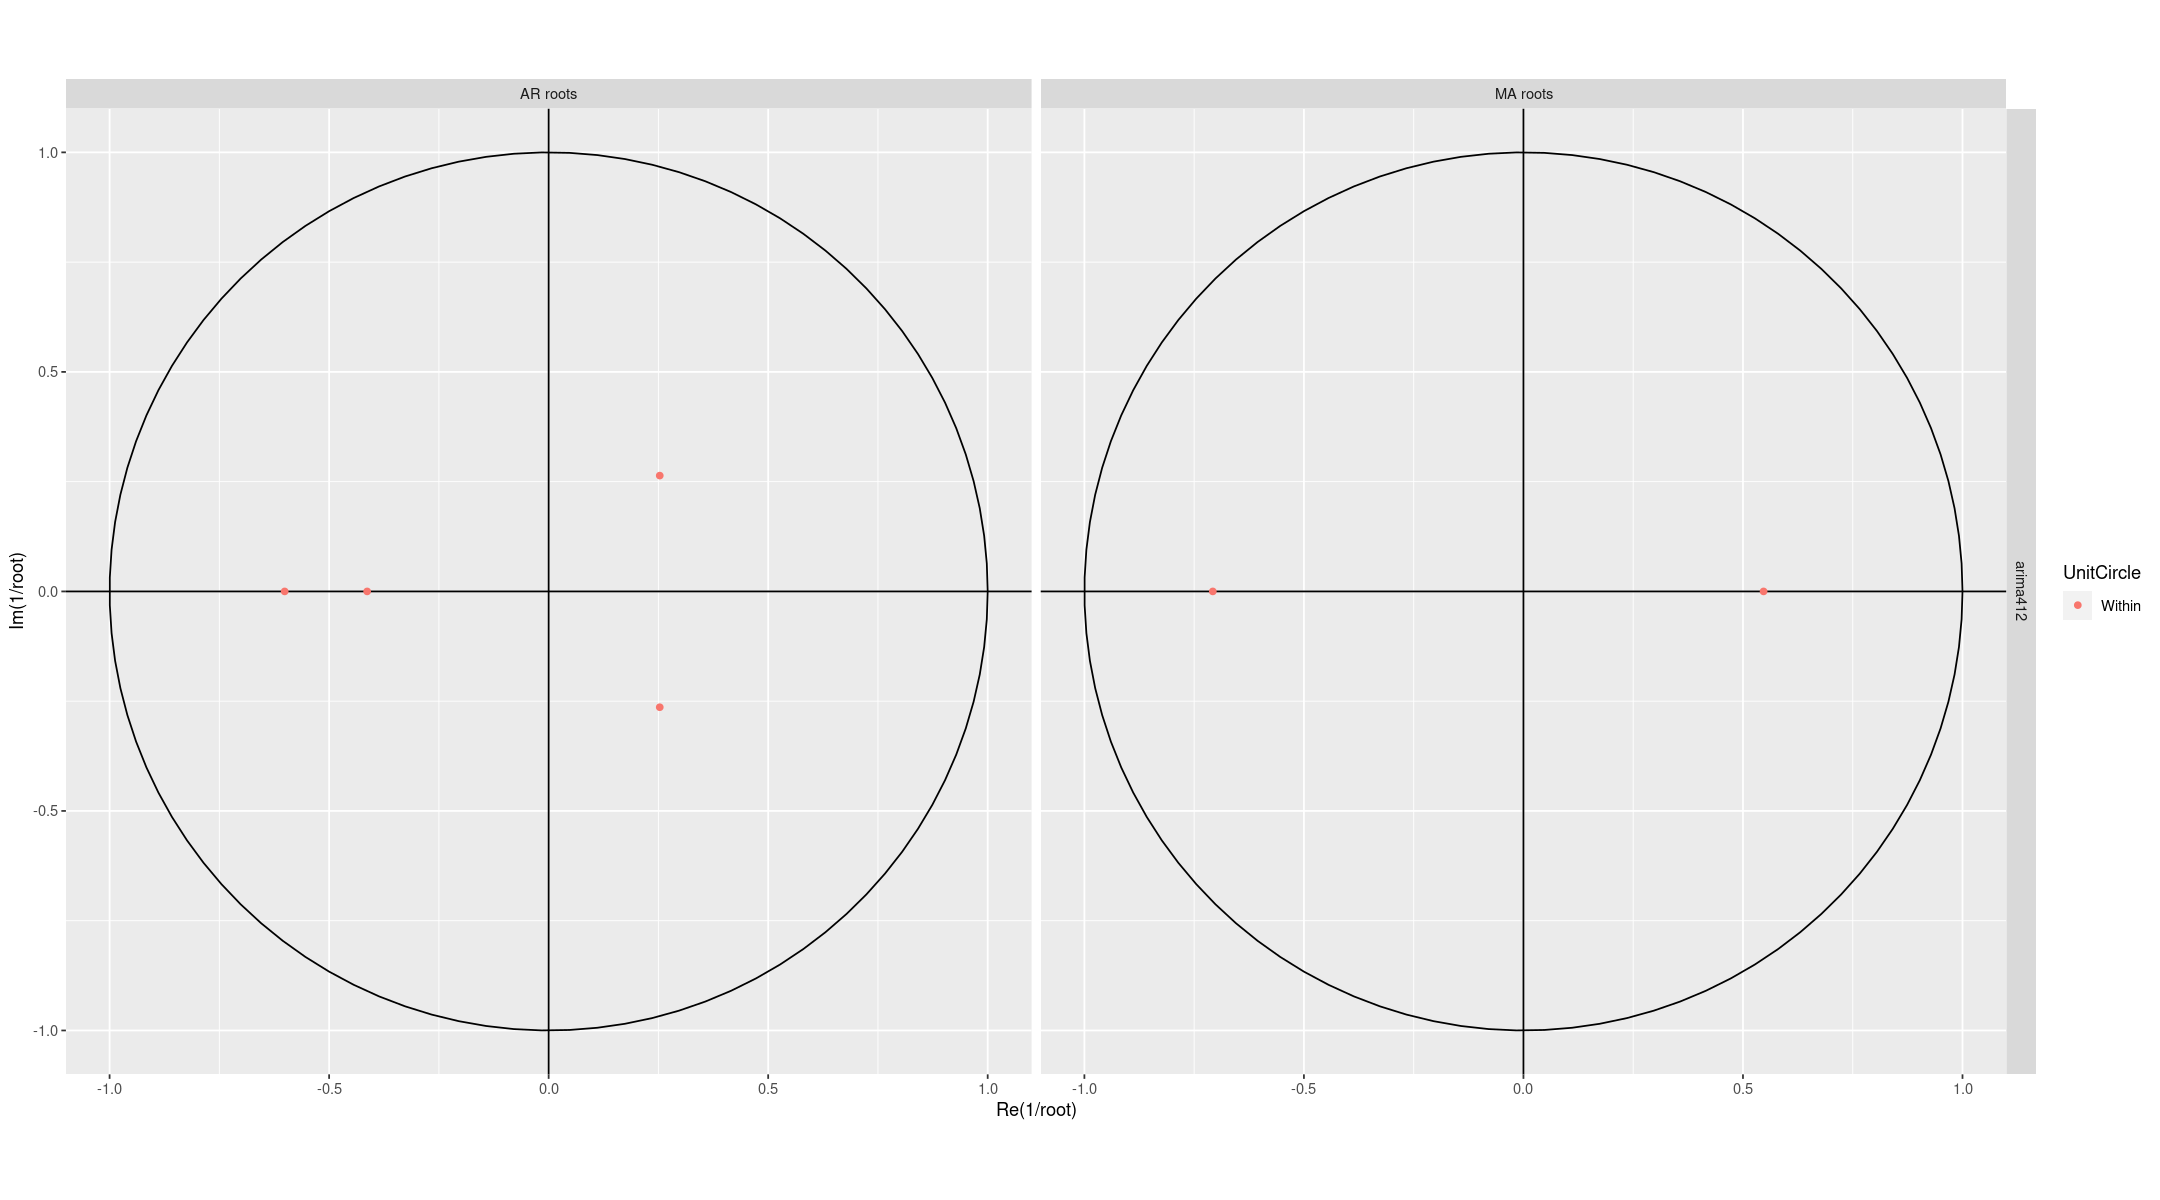

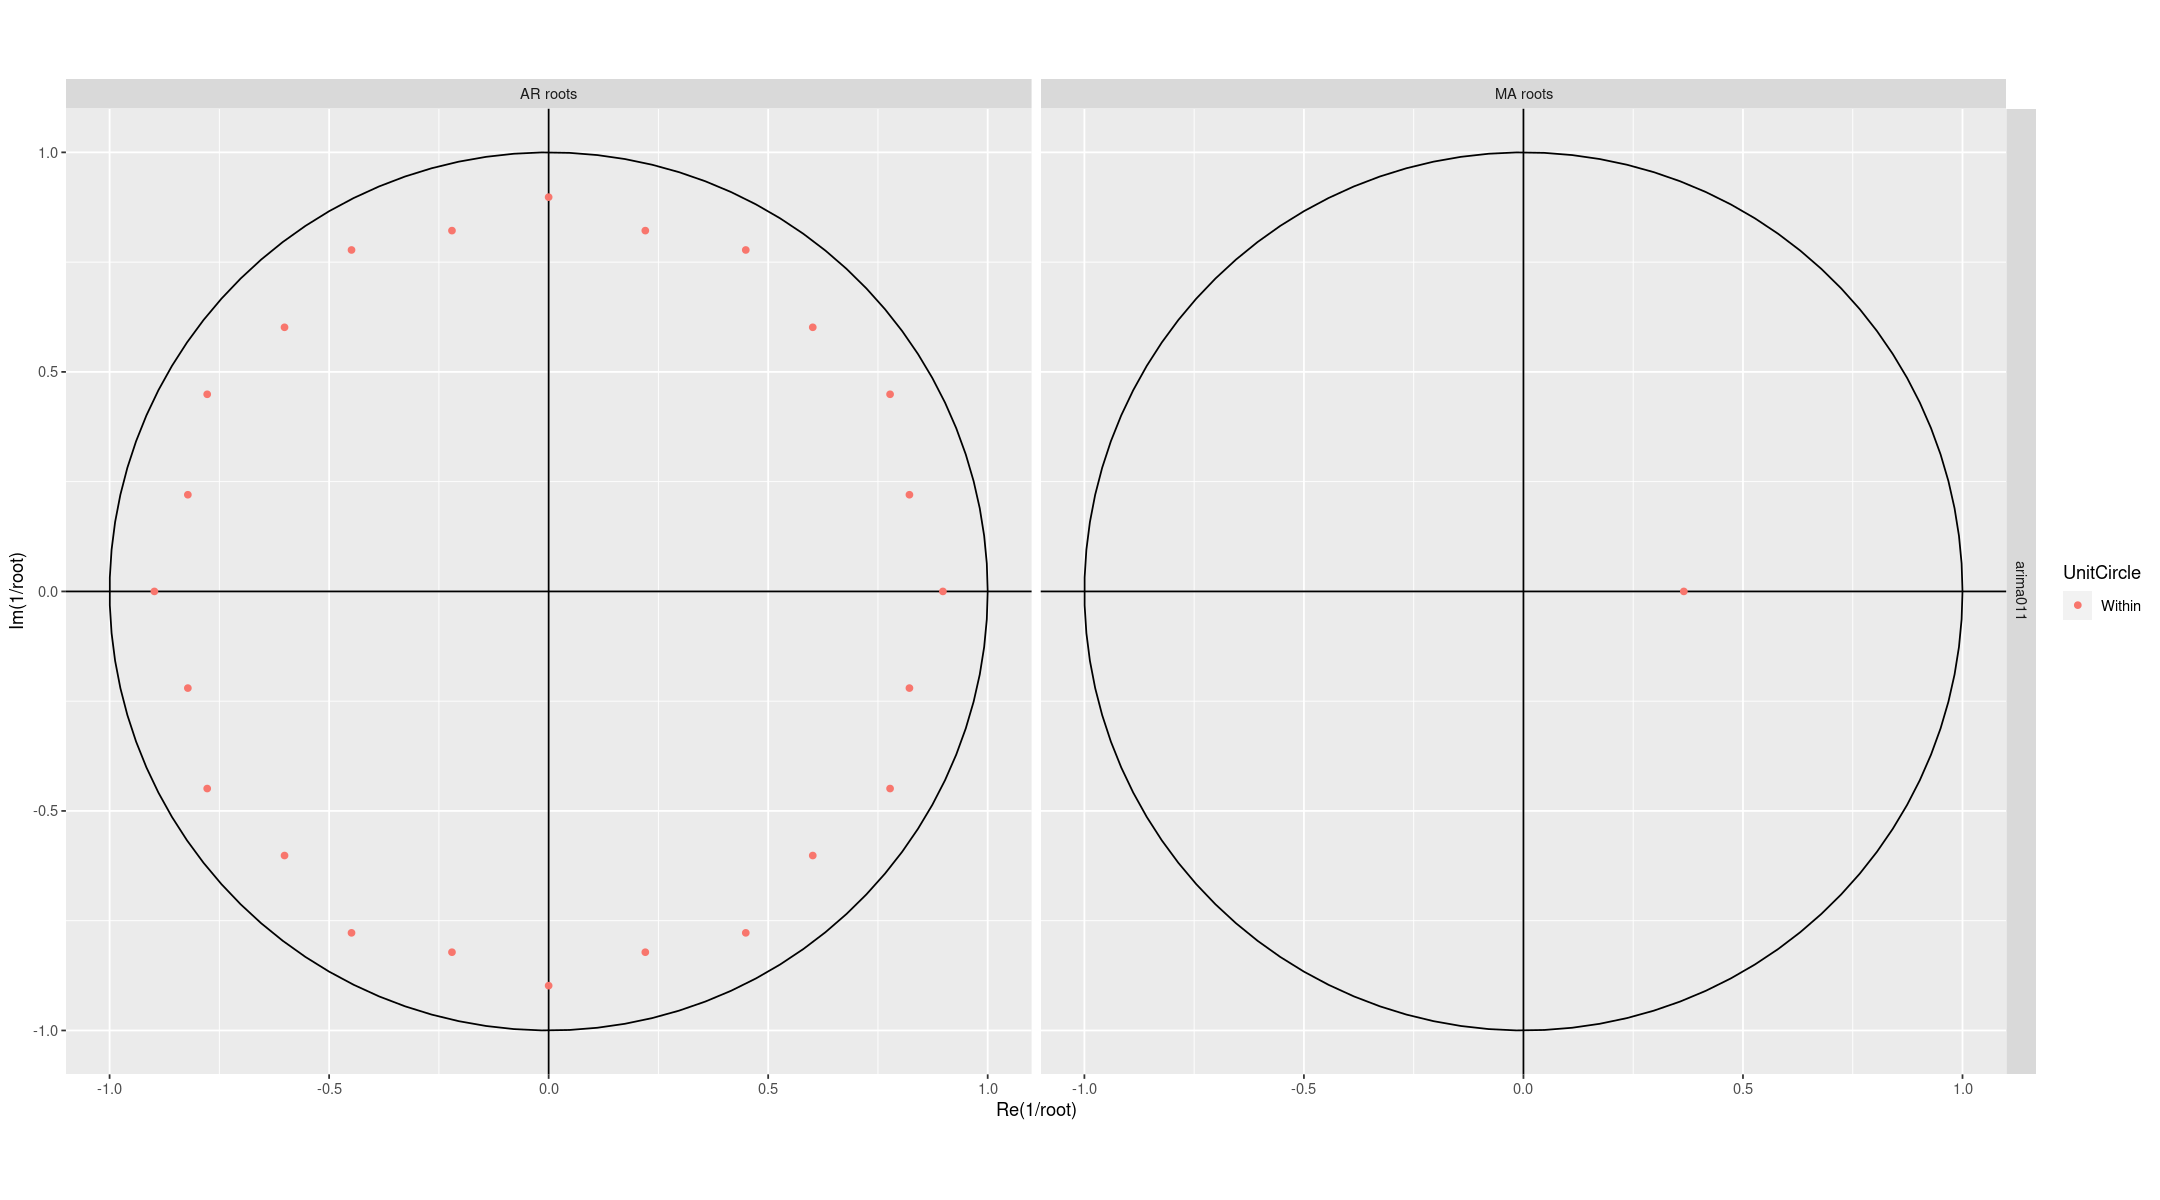

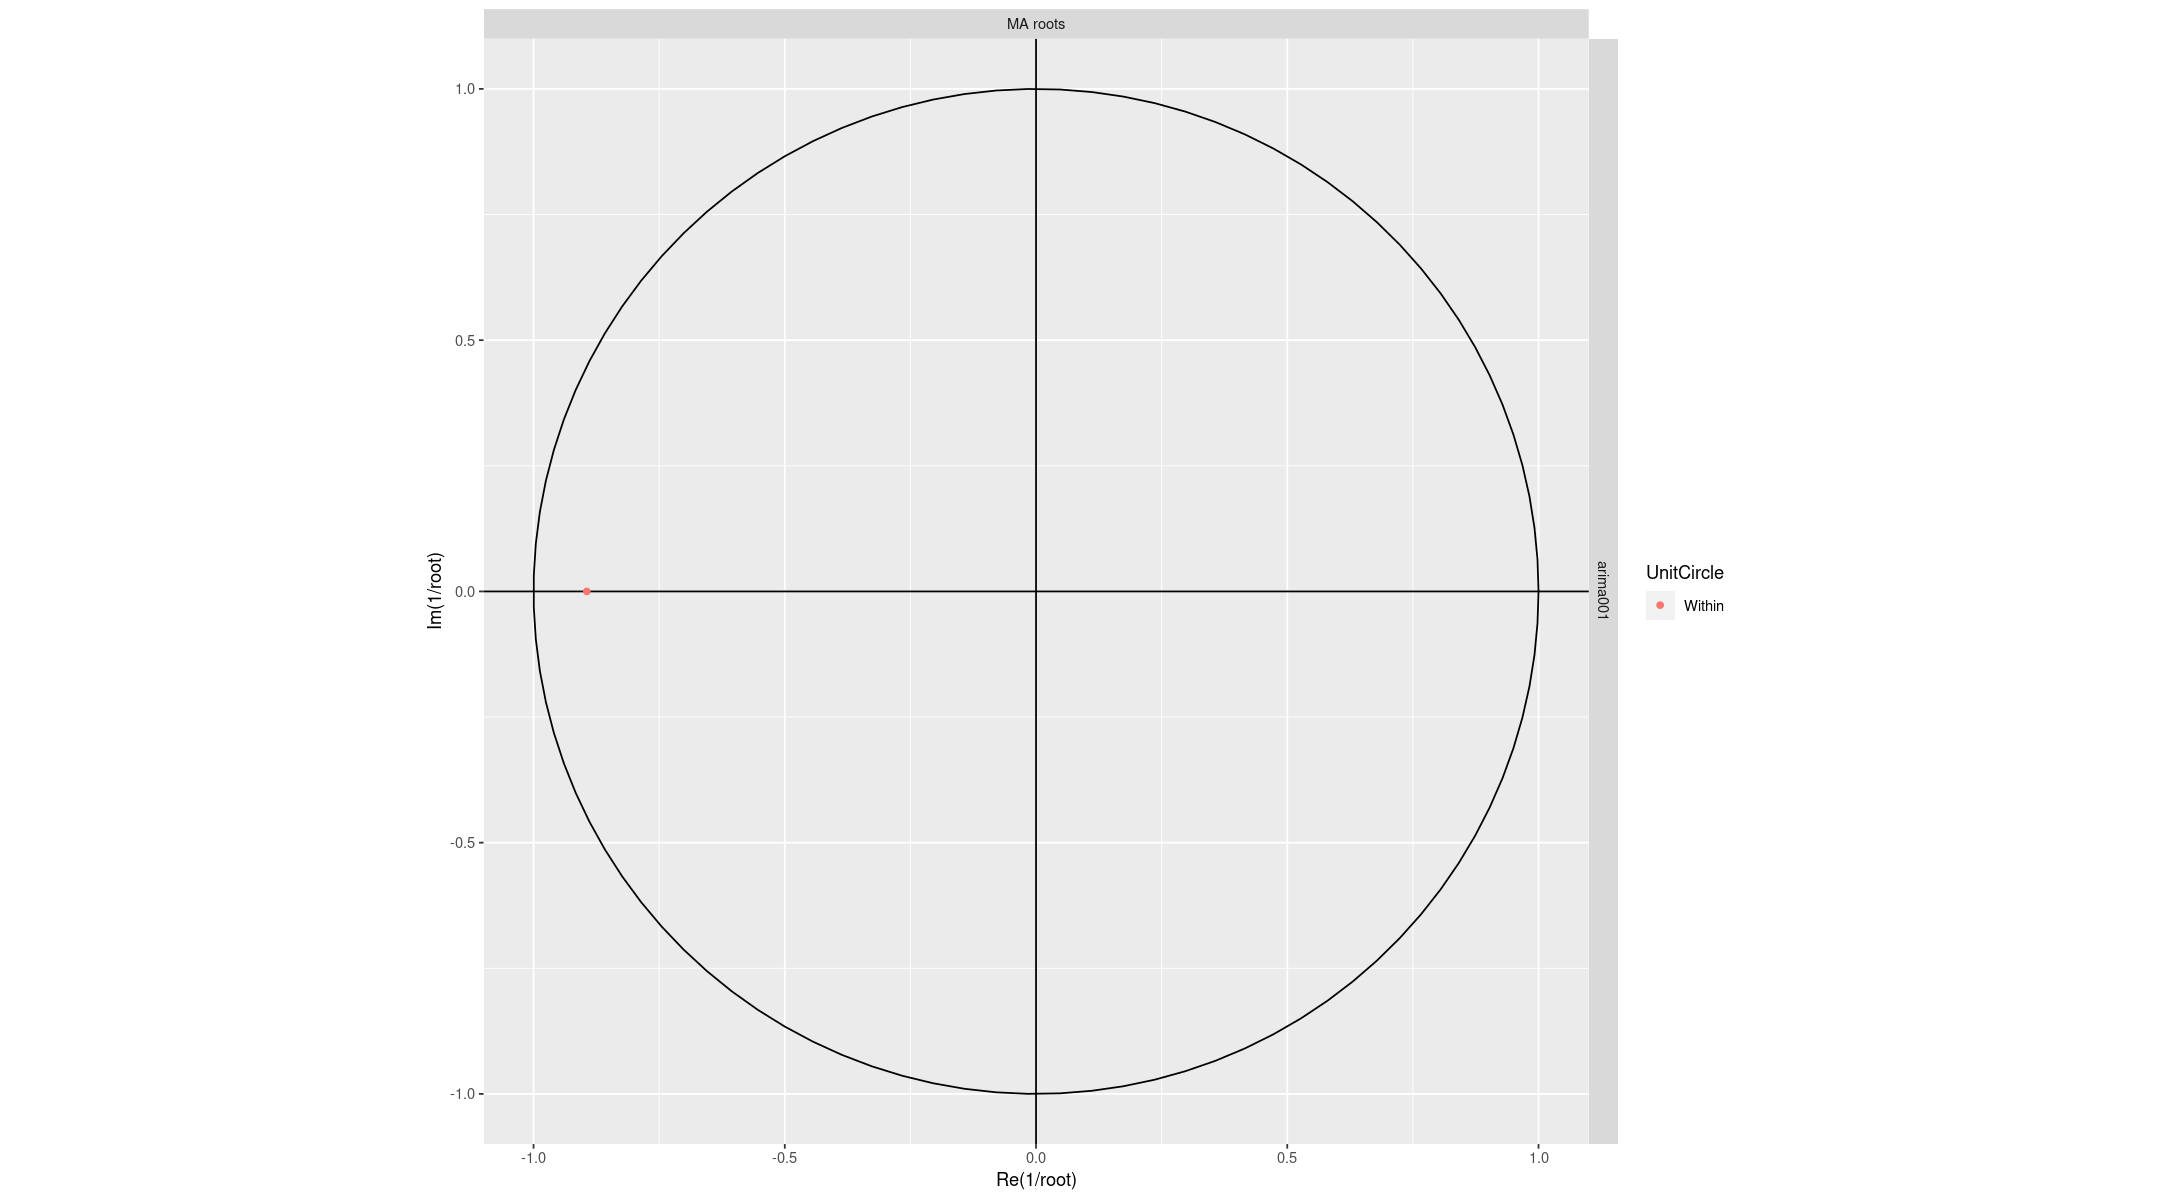

In [216]:
gg_arma(arima_4.1.2_lts_fable)
gg_arma(arima_0.1.1_lts_fable)
# gg_arma(arima_4.0.3_lts_fable) # da error
gg_arma(arima_0.0.1_lts_fable)

## ARIMA (4,1,2)

### Pruebas de correlación serial en los residuales

In [217]:
res_arima_4.1.2_l.ts = residuals(arima_4.1.2_lts)

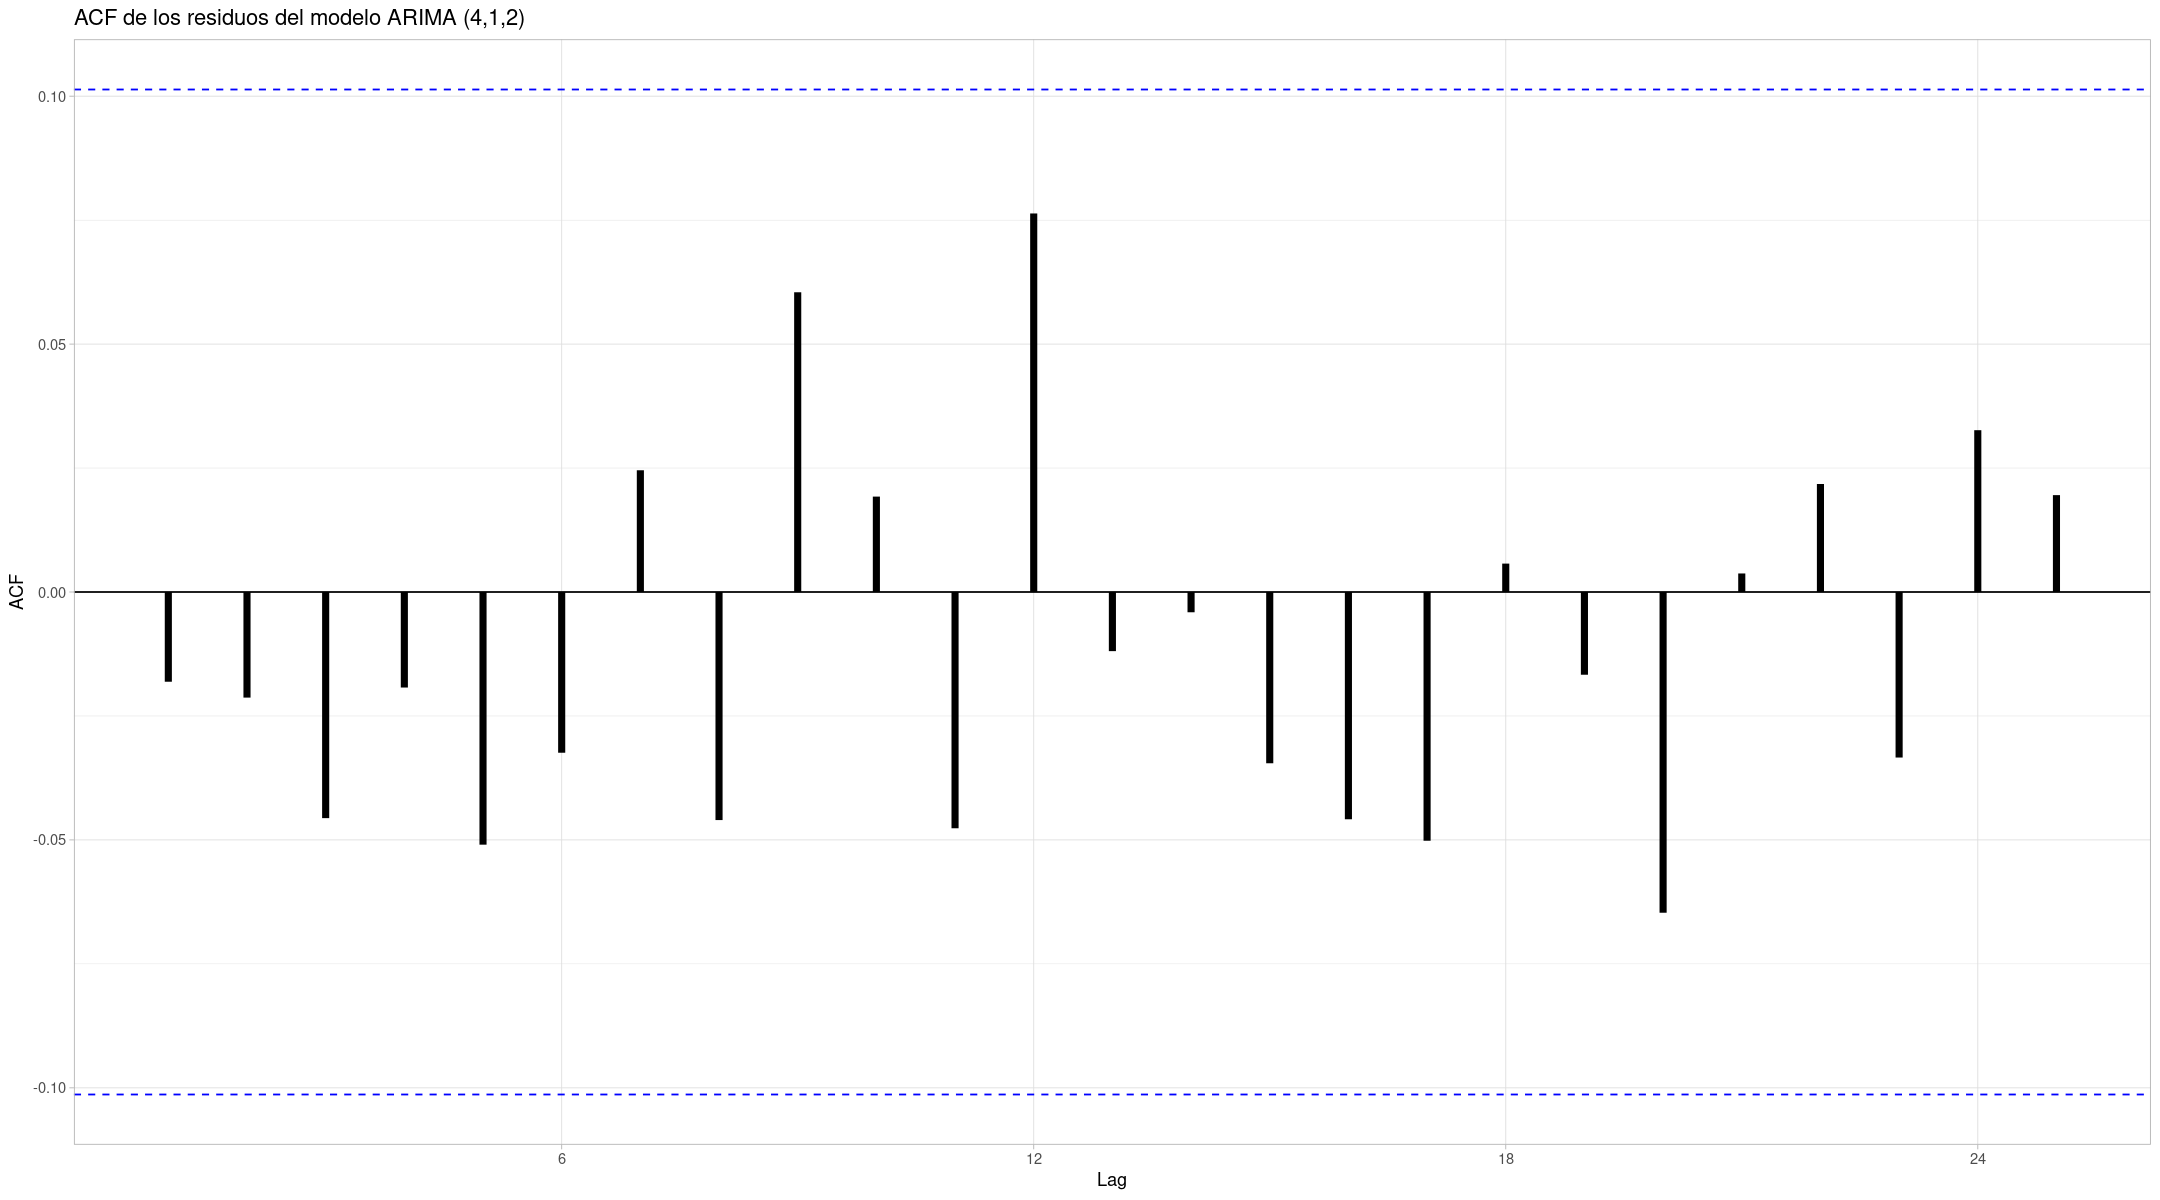

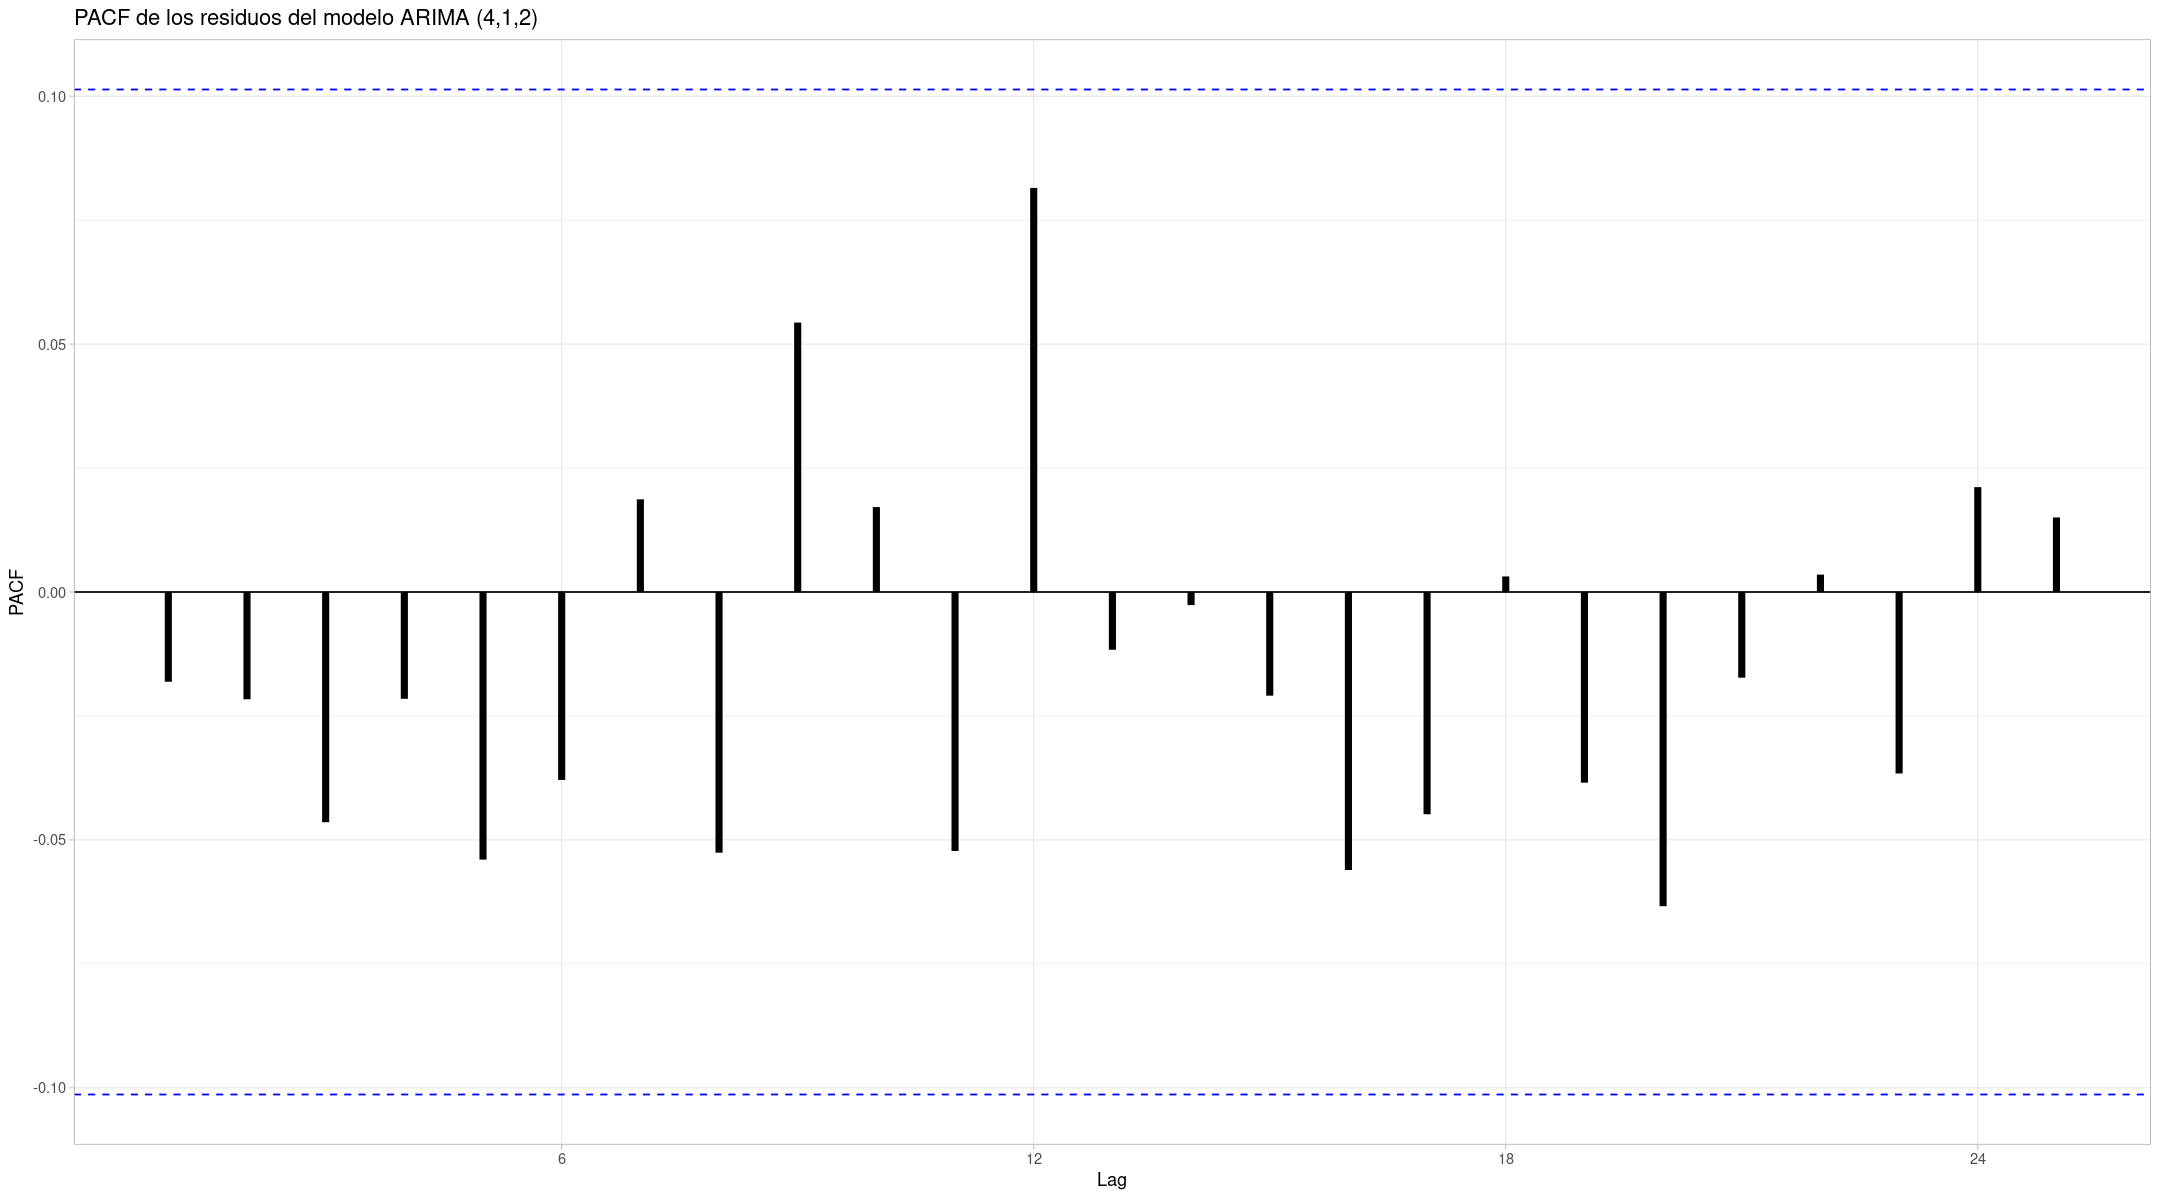

In [218]:
ggAcf(res_arima_4.1.2_l.ts, lwd=2) + ggtitle("ACF de los residuos del modelo ARIMA (4,1,2)") + theme_light()

ggPacf(res_arima_4.1.2_l.ts, lwd=2) + ggtitle("PACF de los residuos del modelo ARIMA (4,1,2)") + theme_light()


#### Prueba formal

In [219]:

lags.test = length(l.ts)/4
#test box-pierce
Box.test(res_arima_4.1.2_l.ts, lag=lags.test, type = ("Box-Pierce")) #NRh0
Box.test(res_arima_4.1.2_l.ts, lag=20, type = ("Box-Pierce")) #NRh0
Box.test(res_arima_4.1.2_l.ts, lag=30, type = ("Box-Pierce")) #NRh0
# Test Ljung-Box
Box.test(res_arima_4.1.2_l.ts, lag=lags.test, type = ("Ljung-Box")) #NRh0
Box.test(res_arima_4.1.2_l.ts, lag=20, type = ("Ljung-Box")) #NRh0
Box.test(res_arima_4.1.2_l.ts, lag=30, type = ("Ljung-Box")) #NRh0


	Box-Pierce test

data:  res_arima_4.1.2_l.ts
X-squared = 64.12734, df = 93.5, p-value = 0.991244



	Box-Pierce test

data:  res_arima_4.1.2_l.ts
X-squared = 12.03864, df = 20, p-value = 0.91474



	Box-Pierce test

data:  res_arima_4.1.2_l.ts
X-squared = 20.51975, df = 30, p-value = 0.902302



	Box-Ljung test

data:  res_arima_4.1.2_l.ts
X-squared = 73.91682, df = 93.5, p-value = 0.932763



	Box-Ljung test

data:  res_arima_4.1.2_l.ts
X-squared = 12.48612, df = 20, p-value = 0.898329



	Box-Ljung test

data:  res_arima_4.1.2_l.ts
X-squared = 21.68735, df = 30, p-value = 0.865173


### Pruebas de Heterocedasticidad en los residuales

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ p.value
[1,]     4 12.9 0.01196
[2,]     8 14.1 0.07842
[3,]    12 22.7 0.03045
[4,]    16 38.7 0.00120
[5,]    20 40.2 0.00474
[6,]    24 40.9 0.01687
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 244.7 0.000000
[2,]     8 117.2 0.000000
[3,]    12  34.0 0.000356
[4,]    16  18.0 0.263169
[5,]    20  13.6 0.805078
[6,]    24  11.5 0.977216


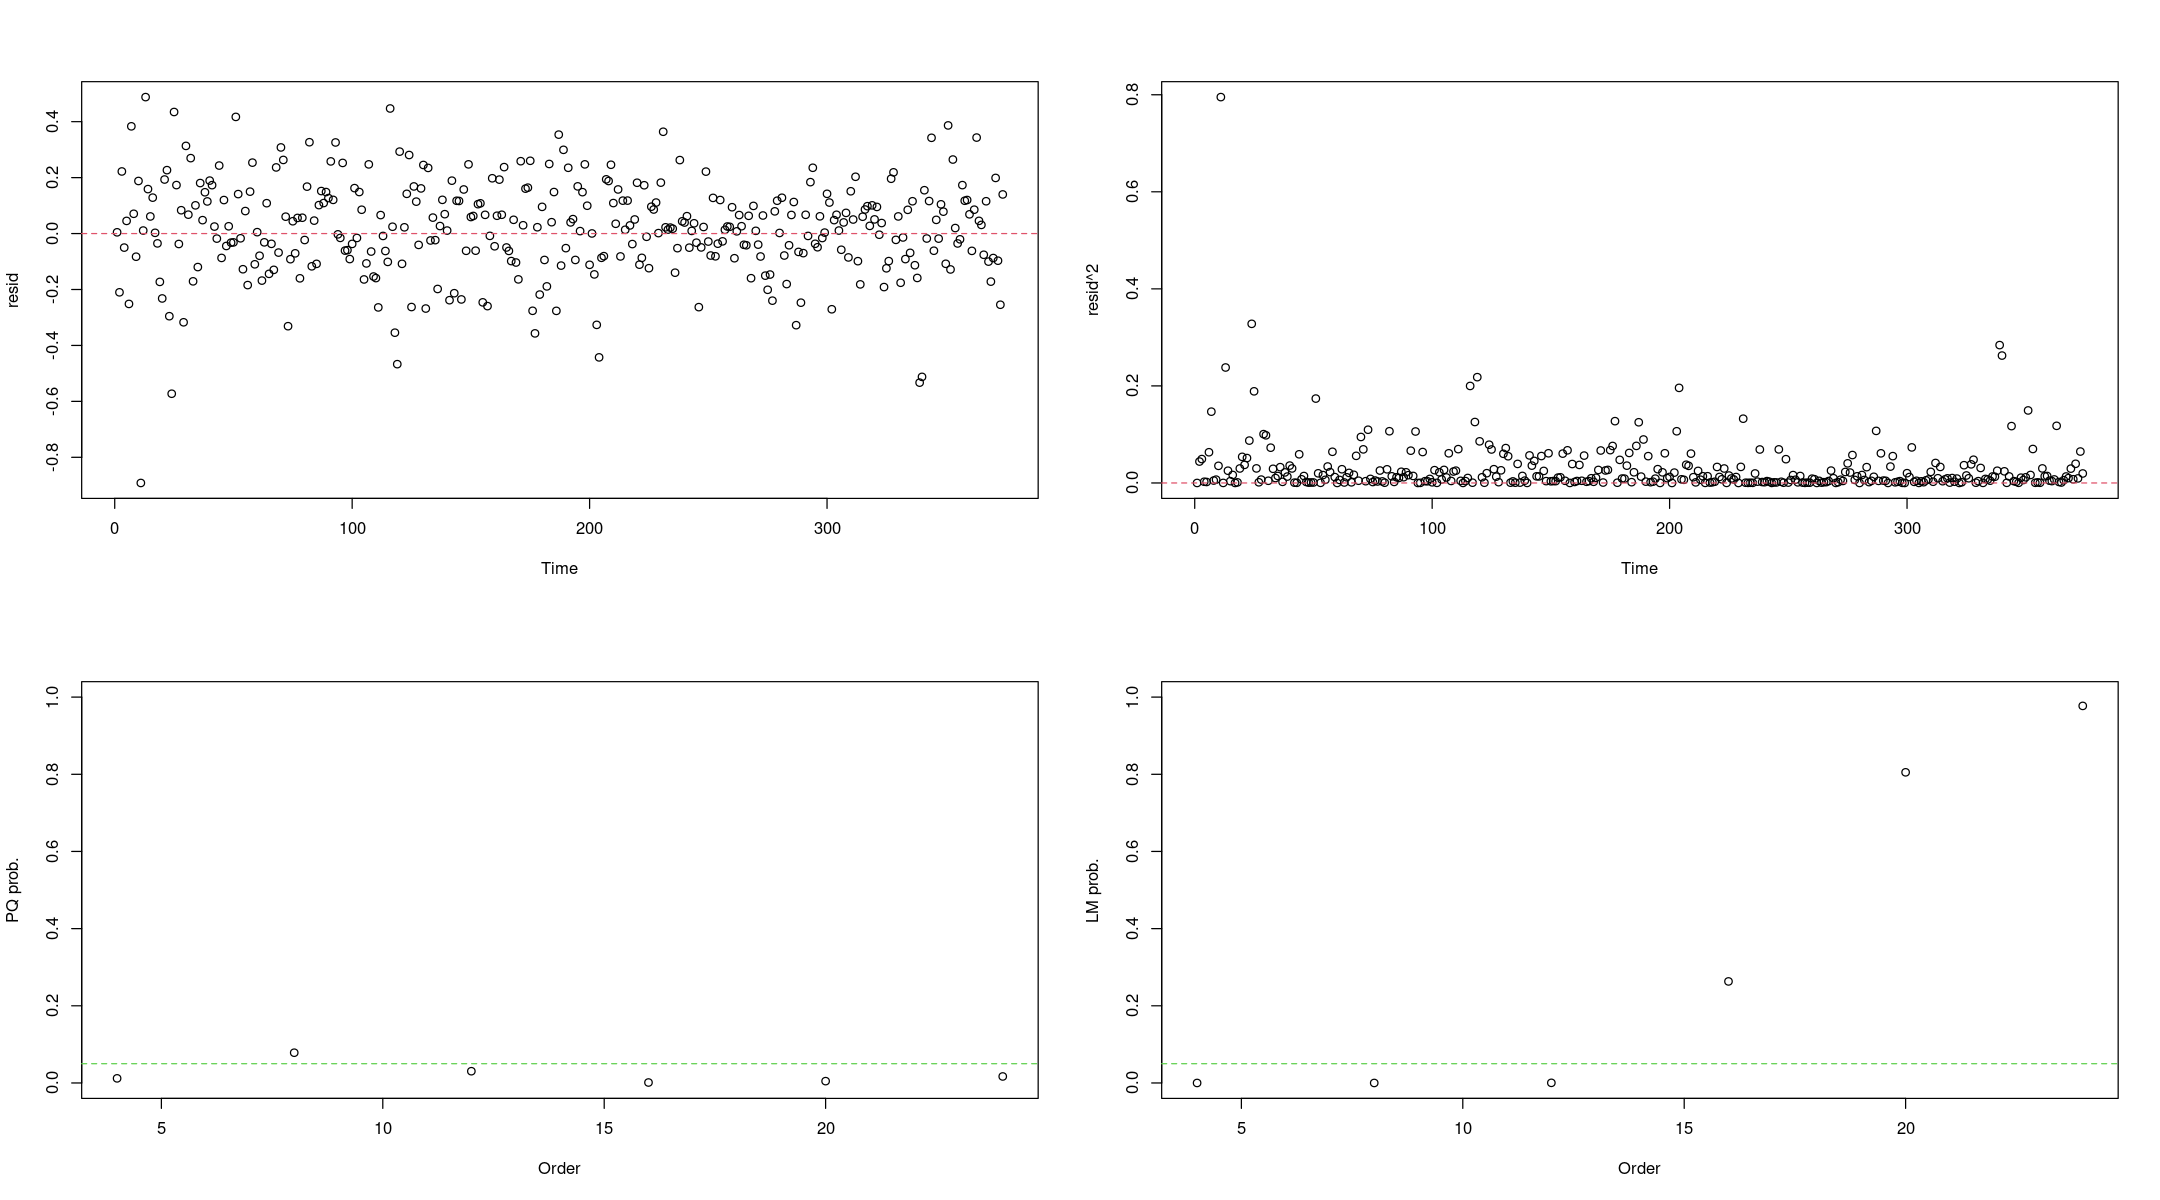

In [220]:
arch_l.ts <-arch.test(arima_4.1.2_lts, output=TRUE)

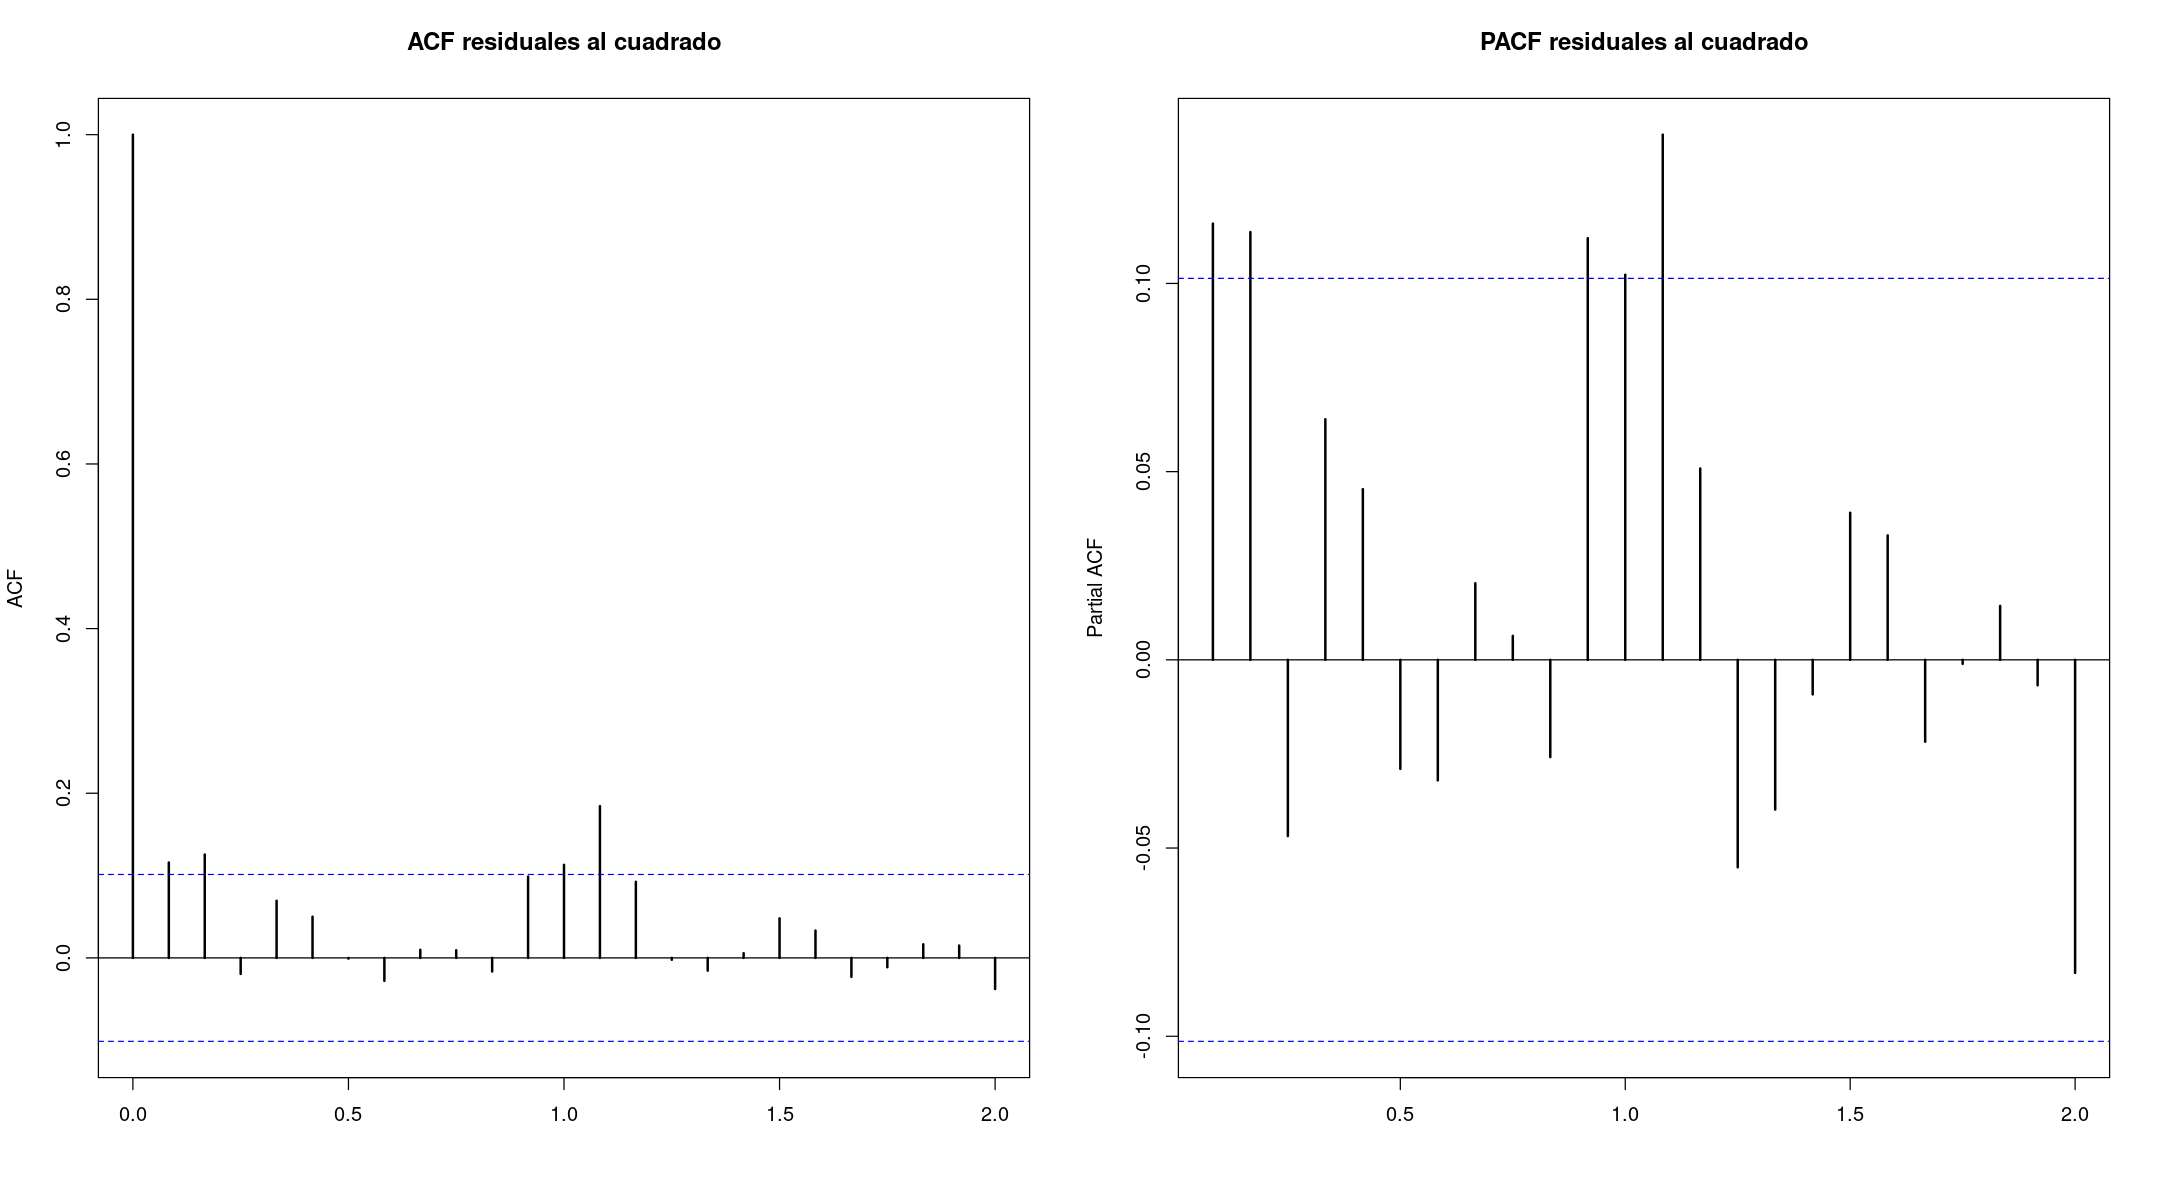

In [221]:
par(mfrow=c(1,2))
acf(res_arima_4.1.2_l.ts^2,lag.max=24,plot=T,lwd=2,xlab='',main='ACF residuales al cuadrado') 
pacf(res_arima_4.1.2_l.ts^2,lag.max=24,plot=T,lwd=2,xlab='',main='PACF residuales al cuadrado')

### Pruebas de normalidad en los residuales

In [222]:
jarque.bera.test(res_arima_4.1.2_l.ts)


	Jarque Bera Test

data:  res_arima_4.1.2_l.ts
X-squared = 112.1508, df = 2, p-value < 2.22e-16


[1] 11 24

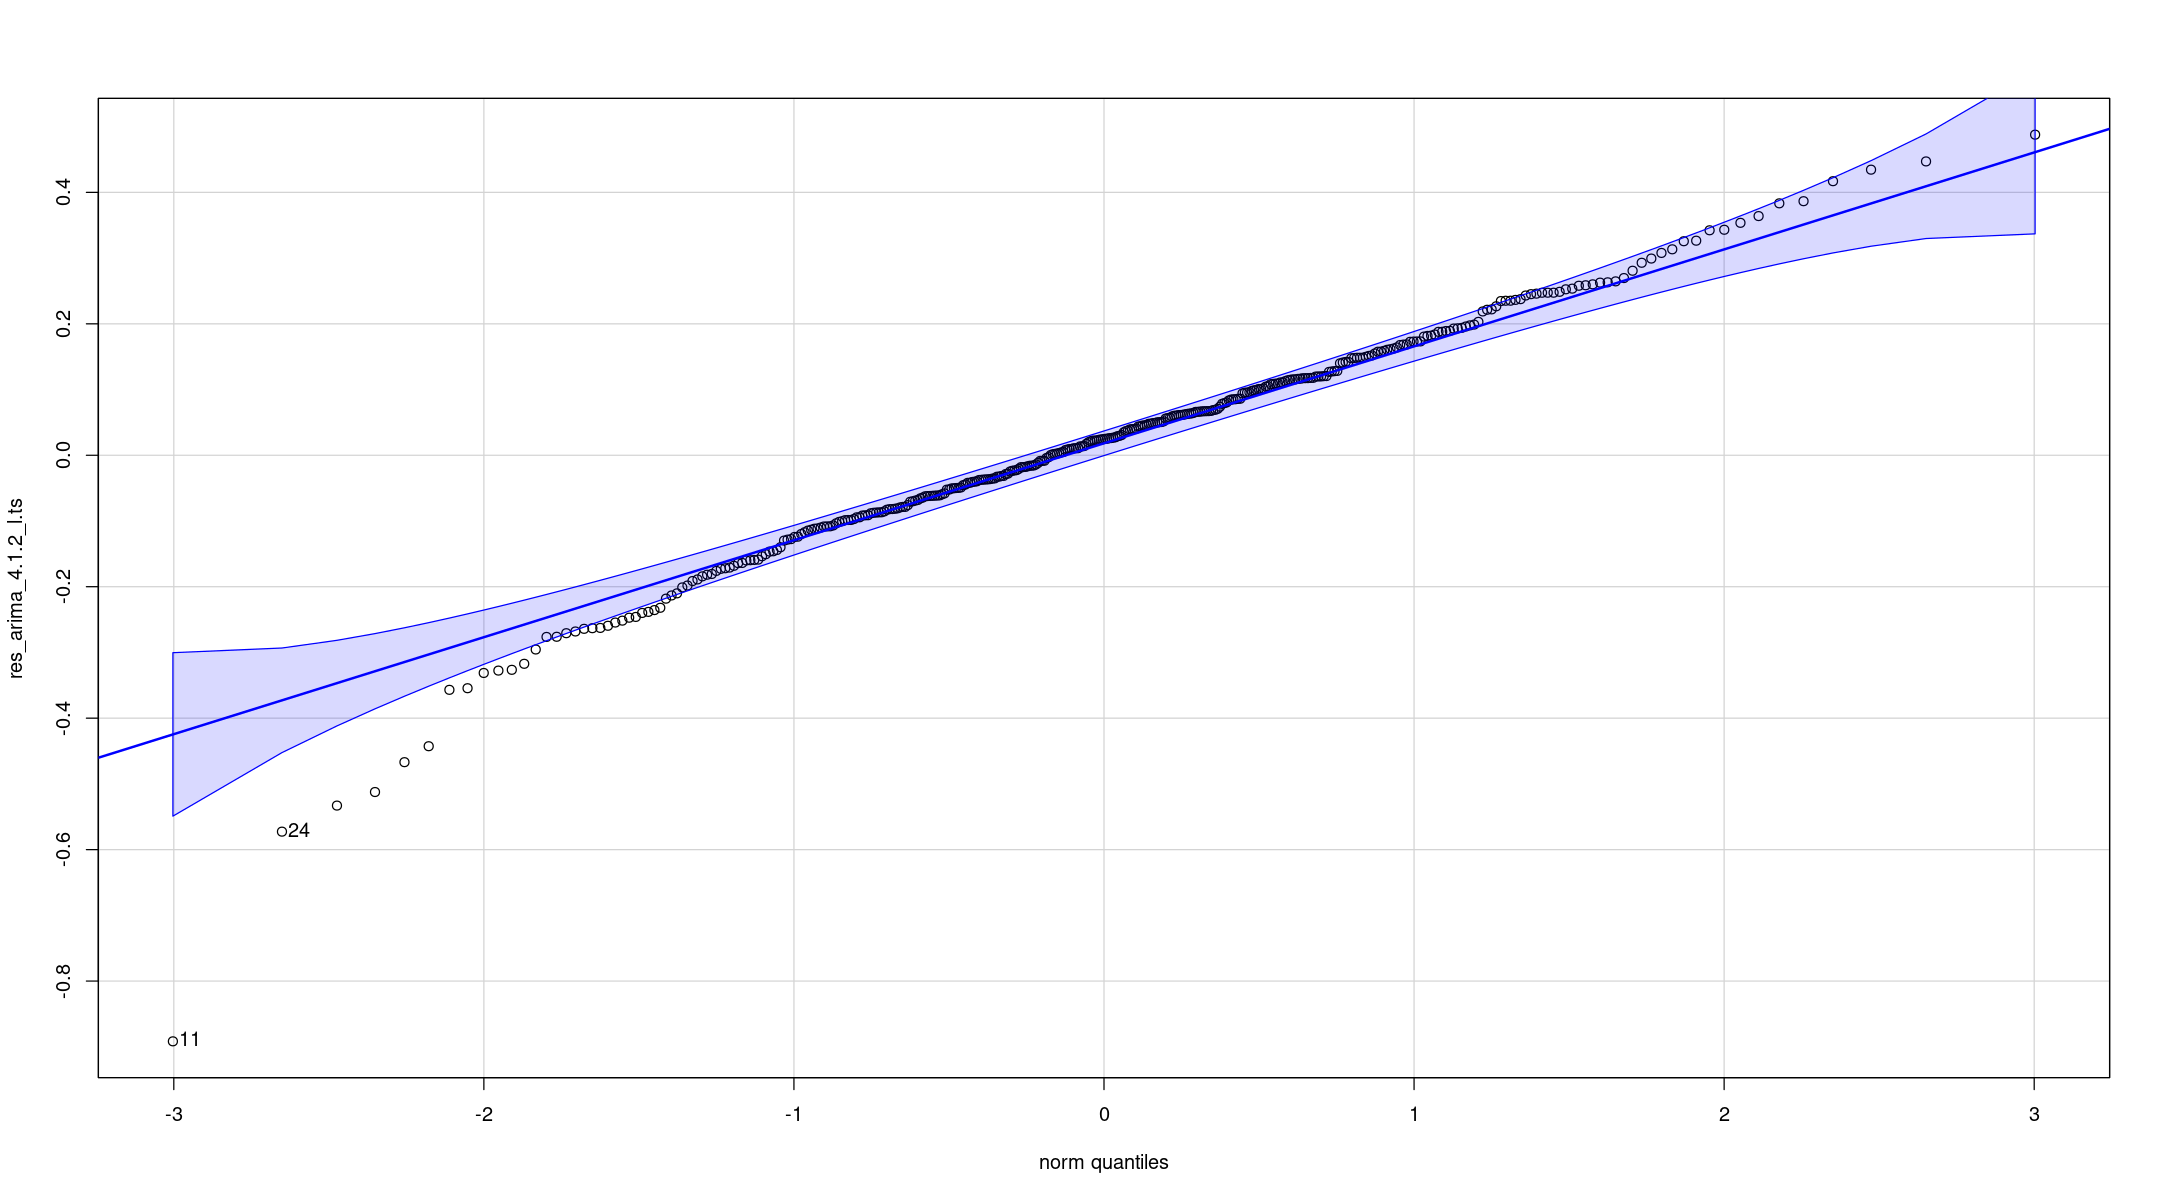

In [223]:
par(mfrow=c(1,1))
qqPlot(res_arima_4.1.2_l.ts)

## ARIMA (0,1,1)

### Pruebas de correlación serial en los residuales

In [224]:
res_arima_0.1.1_l.ts = residuals(arima_0.1.1_lts)

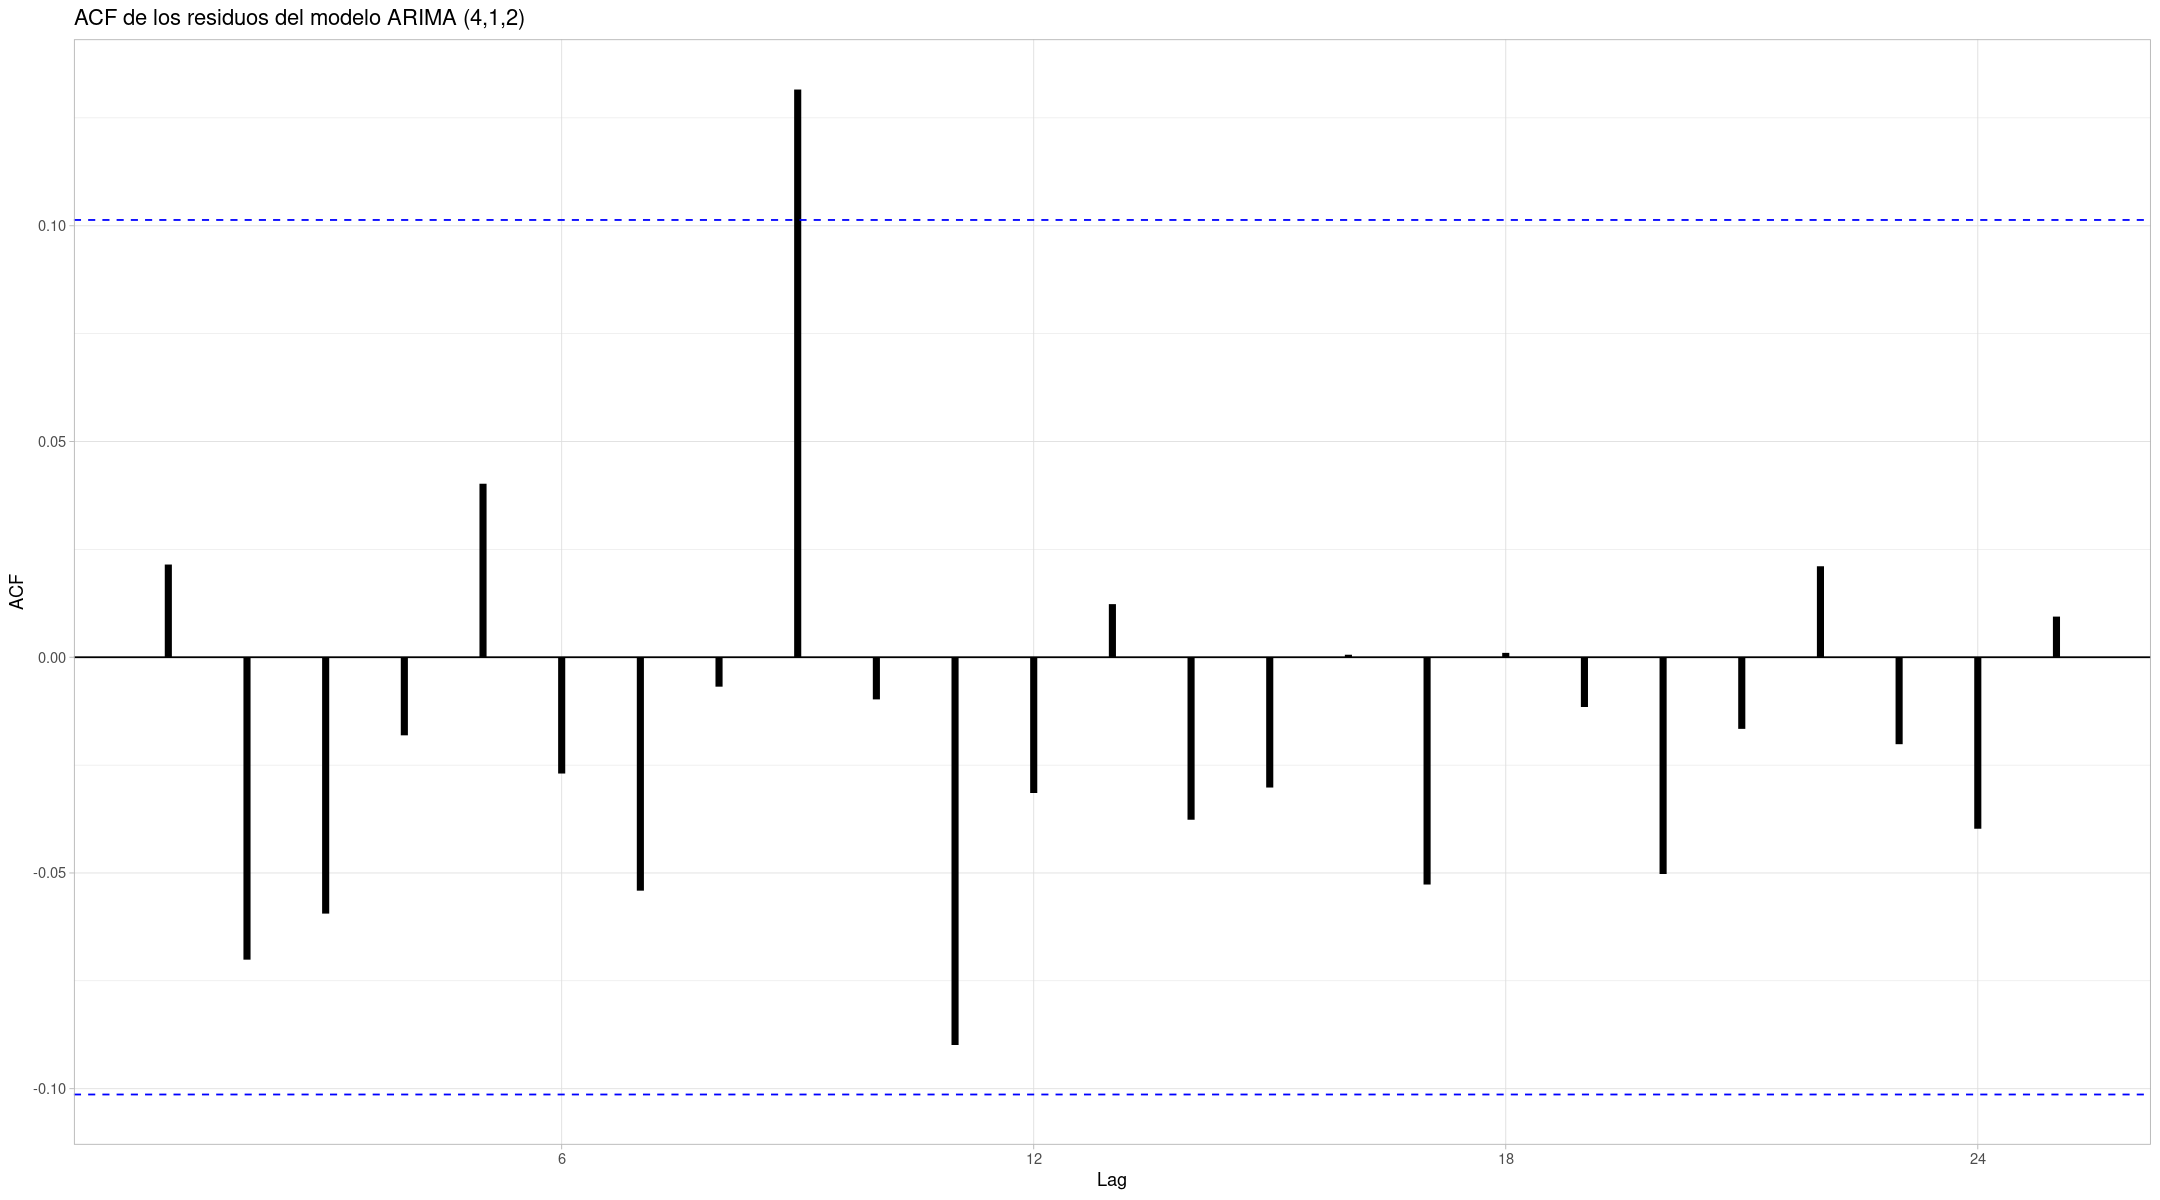

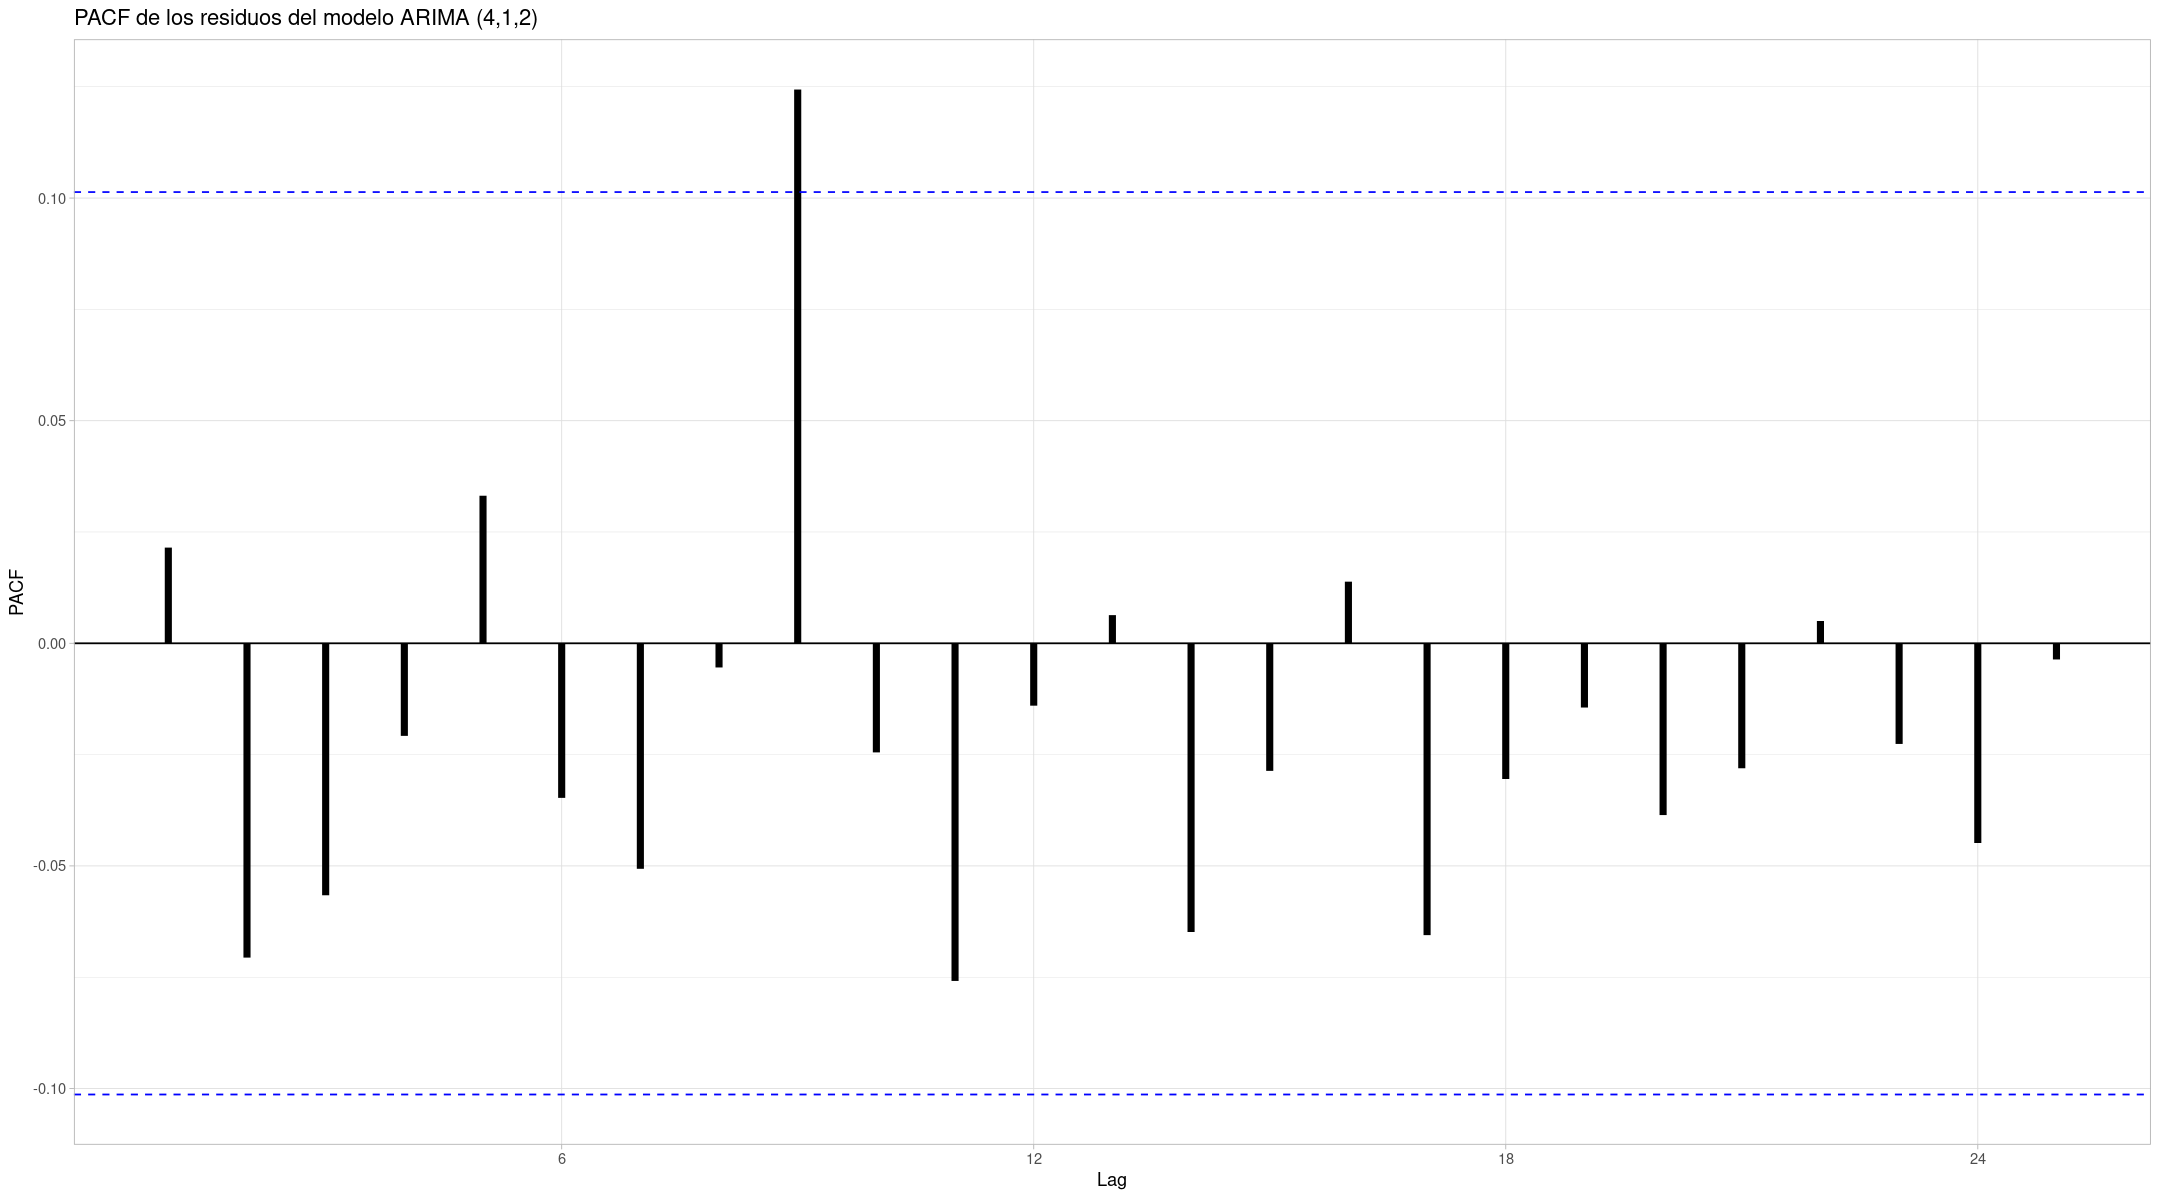

In [225]:
ggAcf(res_arima_0.1.1_l.ts, lwd=2) + ggtitle("ACF de los residuos del modelo ARIMA (4,1,2)") + theme_light()

ggPacf(res_arima_0.1.1_l.ts, lwd=2) + ggtitle("PACF de los residuos del modelo ARIMA (4,1,2)") + theme_light()


#### Prueba formal

In [226]:

lags.test = length(l.ts)/4
#test box-pierce
Box.test(res_arima_0.1.1_l.ts, lag=lags.test, type = ("Box-Pierce")) #NRh0
Box.test(res_arima_0.1.1_l.ts, lag=20, type = ("Box-Pierce")) #NRh0
Box.test(res_arima_0.1.1_l.ts, lag=30, type = ("Box-Pierce")) #NRh0
# Test Ljung-Box
Box.test(res_arima_0.1.1_l.ts, lag=lags.test, type = ("Ljung-Box")) #NRh0
Box.test(res_arima_0.1.1_l.ts, lag=20, type = ("Ljung-Box")) #NRh0
Box.test(res_arima_0.1.1_l.ts, lag=30, type = ("Ljung-Box")) #NRh0


	Box-Pierce test

data:  res_arima_0.1.1_l.ts
X-squared = 65.96824, df = 93.5, p-value = 0.98623



	Box-Pierce test

data:  res_arima_0.1.1_l.ts
X-squared = 18.30493, df = 20, p-value = 0.567329



	Box-Pierce test

data:  res_arima_0.1.1_l.ts
X-squared = 26.05218, df = 30, p-value = 0.672466



	Box-Ljung test

data:  res_arima_0.1.1_l.ts
X-squared = 75.17819, df = 93.5, p-value = 0.917633



	Box-Ljung test

data:  res_arima_0.1.1_l.ts
X-squared = 18.86835, df = 20, p-value = 0.530397



	Box-Ljung test

data:  res_arima_0.1.1_l.ts
X-squared = 27.27198, df = 30, p-value = 0.608956


### Pruebas de Heterocedasticidad en los residuales

0.009417
0.063439
0.021203
0.000184
0.000503
0.002202

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ  p.value
[1,]     4 13.4 0.009417
[2,]     8 14.8 0.063439
[3,]    12 23.9 0.021203
[4,]    16 44.2 0.000184
[5,]    20 47.5 0.000503
[6,]    24 48.5 0.002202
Lagrange-Multiplier test: 
     order    LM p.value
[1,]     4 276.8 0.00000
[2,]     8 133.3 0.00000
[3,]    12  39.7 0.00004
[4,]    16  20.0 0.17114
[5,]    20  14.8 0.73493
[6,]    24  12.7 0.95904


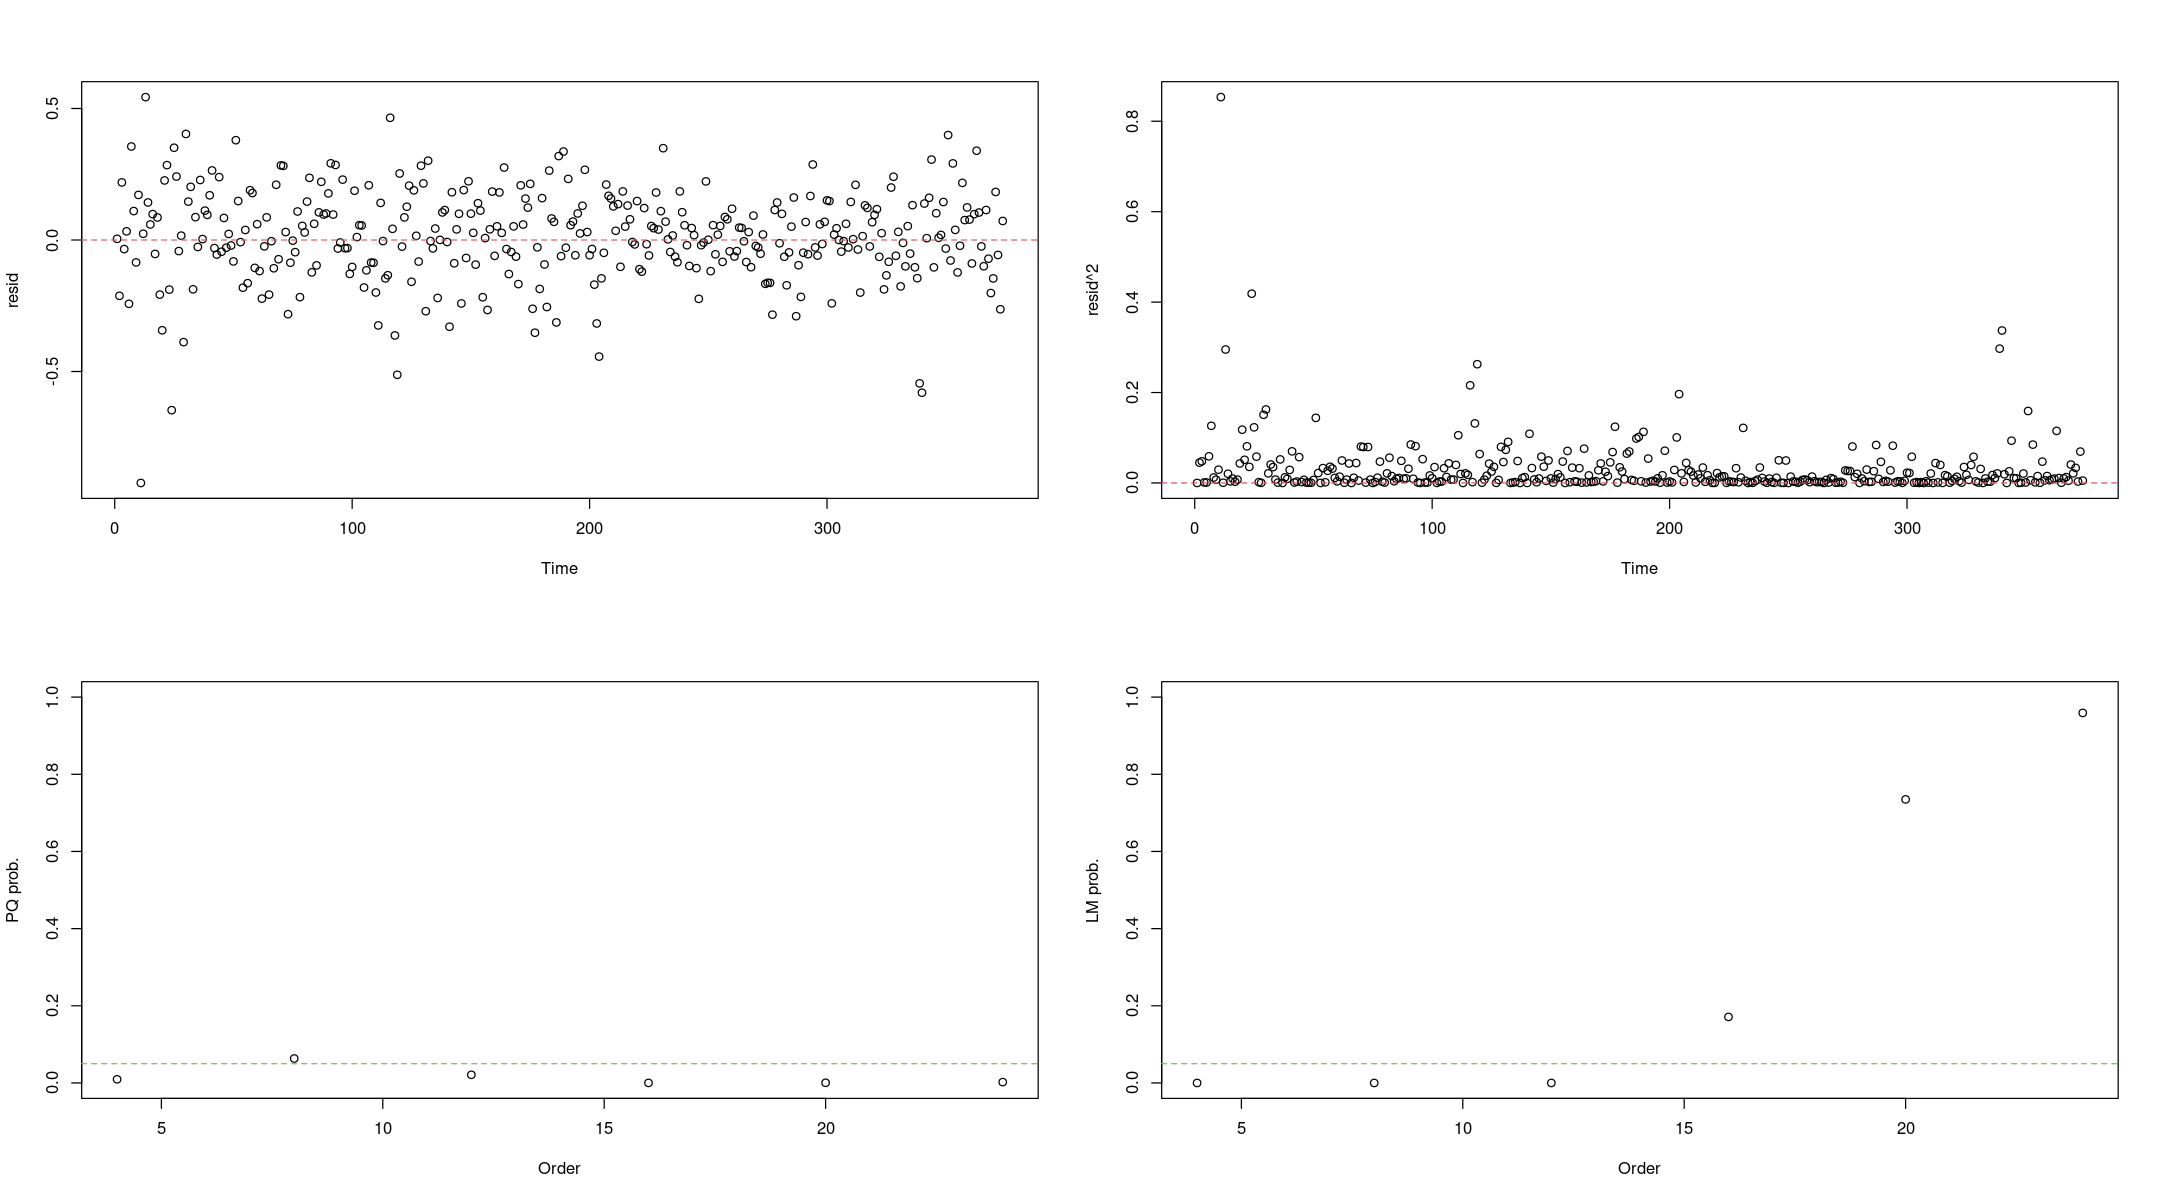

In [227]:
arch_l.ts <-arch.test(arima_0.1.1_lts, output=TRUE)

In [228]:
png("../Imagenes/acf_pacf_res.png", width = 600, height = 333)
par(mfrow=c(1,2))
acf(res_arima_0.1.1_l.ts^2,lag.max=24,plot=T,lwd=2,xlab='',main='') 
pacf(res_arima_0.1.1_l.ts^2,lag.max=24,plot=T,lwd=2,xlab='',main='')
dev.off()

png 
  2

### Pruebas de normalidad en los residuales

In [229]:
jarque.bera.test(res_arima_0.1.1_l.ts)


	Jarque Bera Test

data:  res_arima_0.1.1_l.ts
X-squared = 157.0809, df = 2, p-value < 2.22e-16


In [230]:
png("../Imagenes/normalidad.png", width = 500, height = 500)
par(mfrow=c(1,1))
qqPlot(res_arima_0.1.1_l.ts)
dev.off()

[1] 11 24

png 
  2

## ARMA (4,3)

### Pruebas de correlación serial en los residuales

In [231]:
res_arima_4.0.3_dl.ts = residuals(arima_4.0.3_dlts)

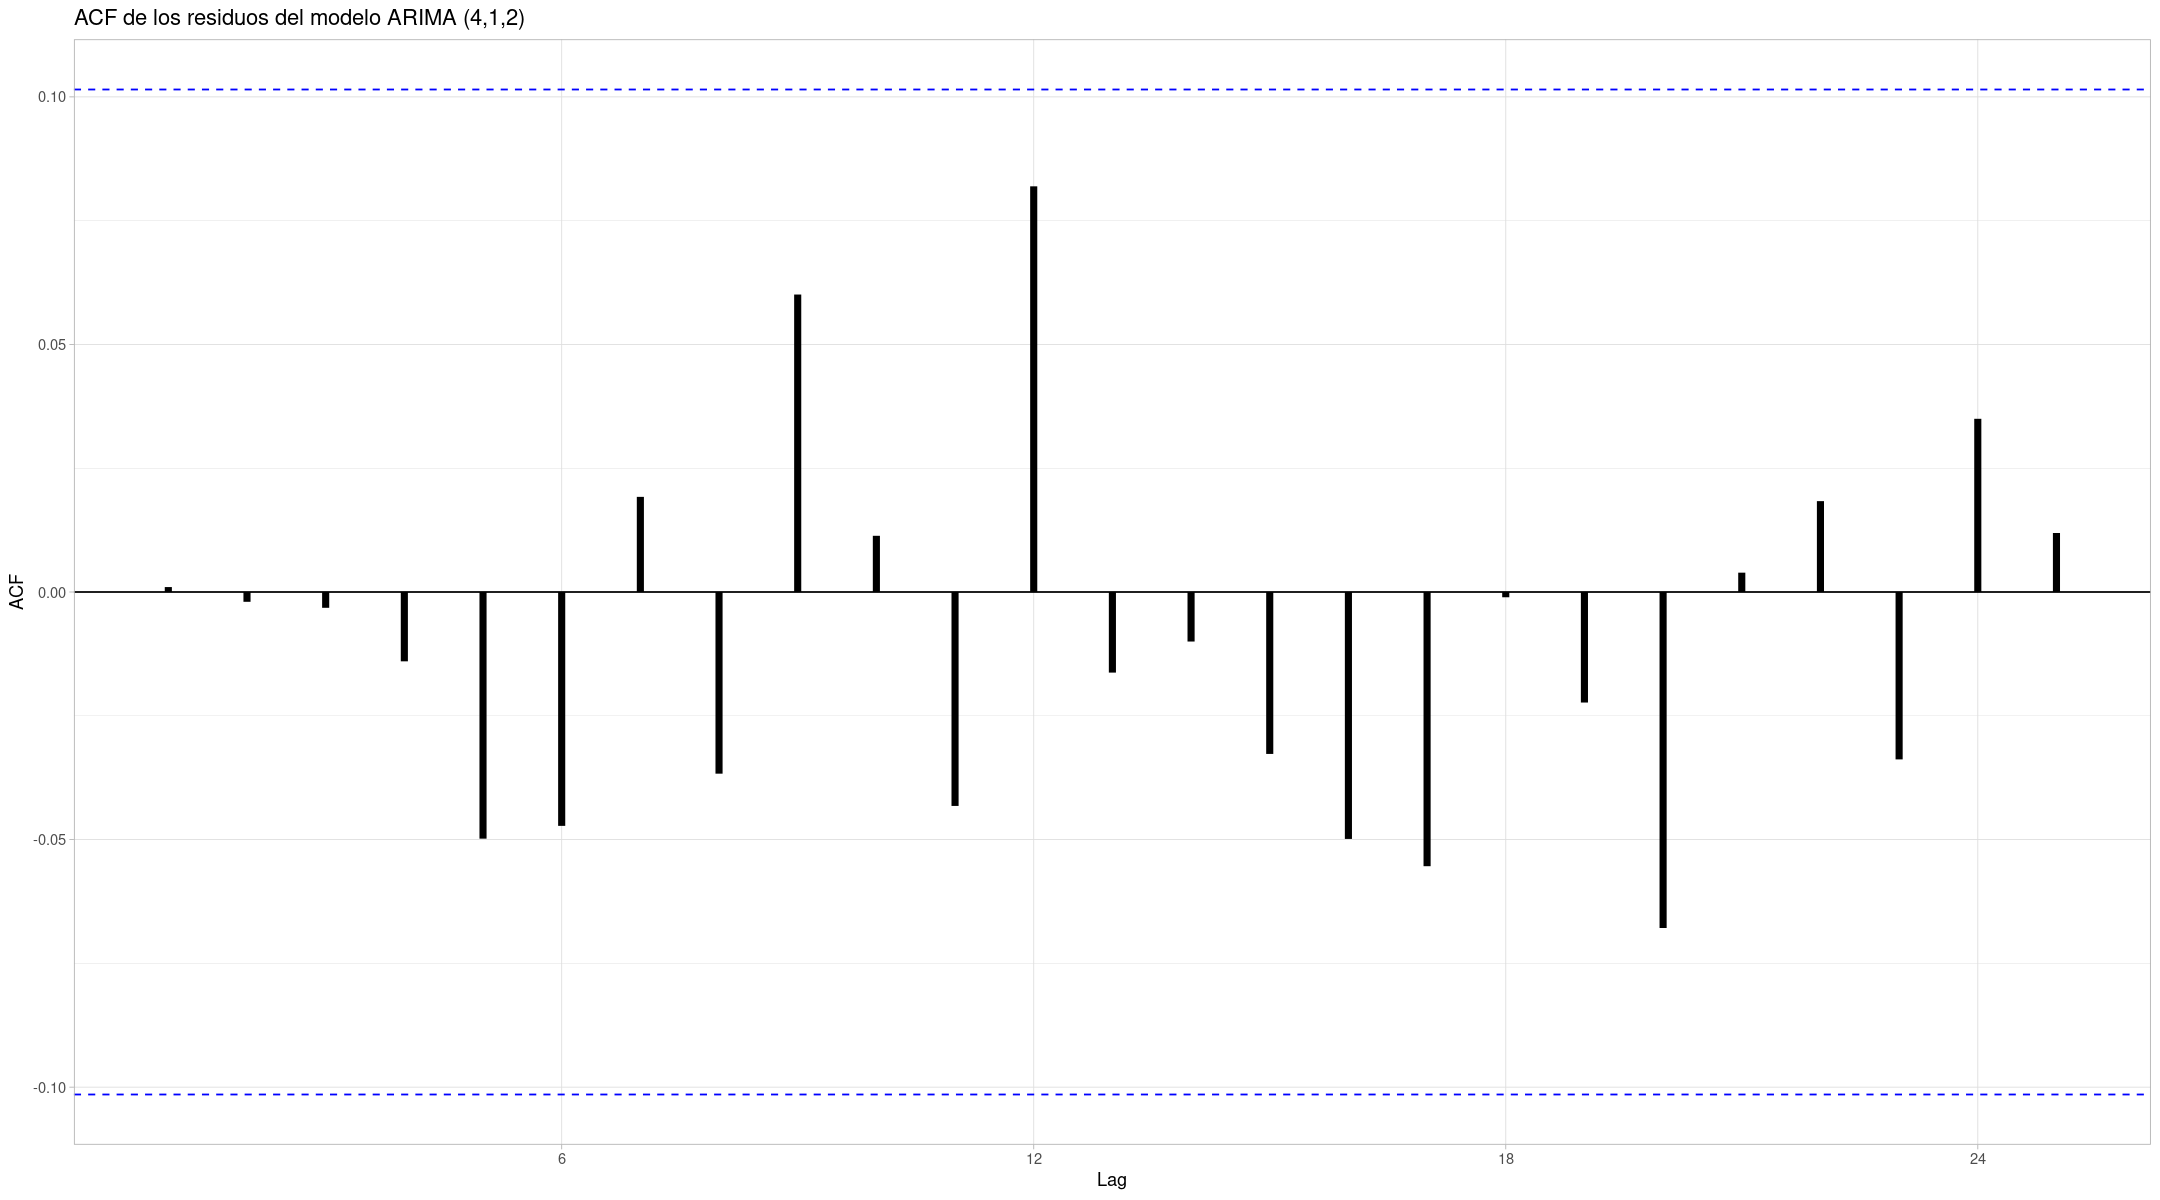

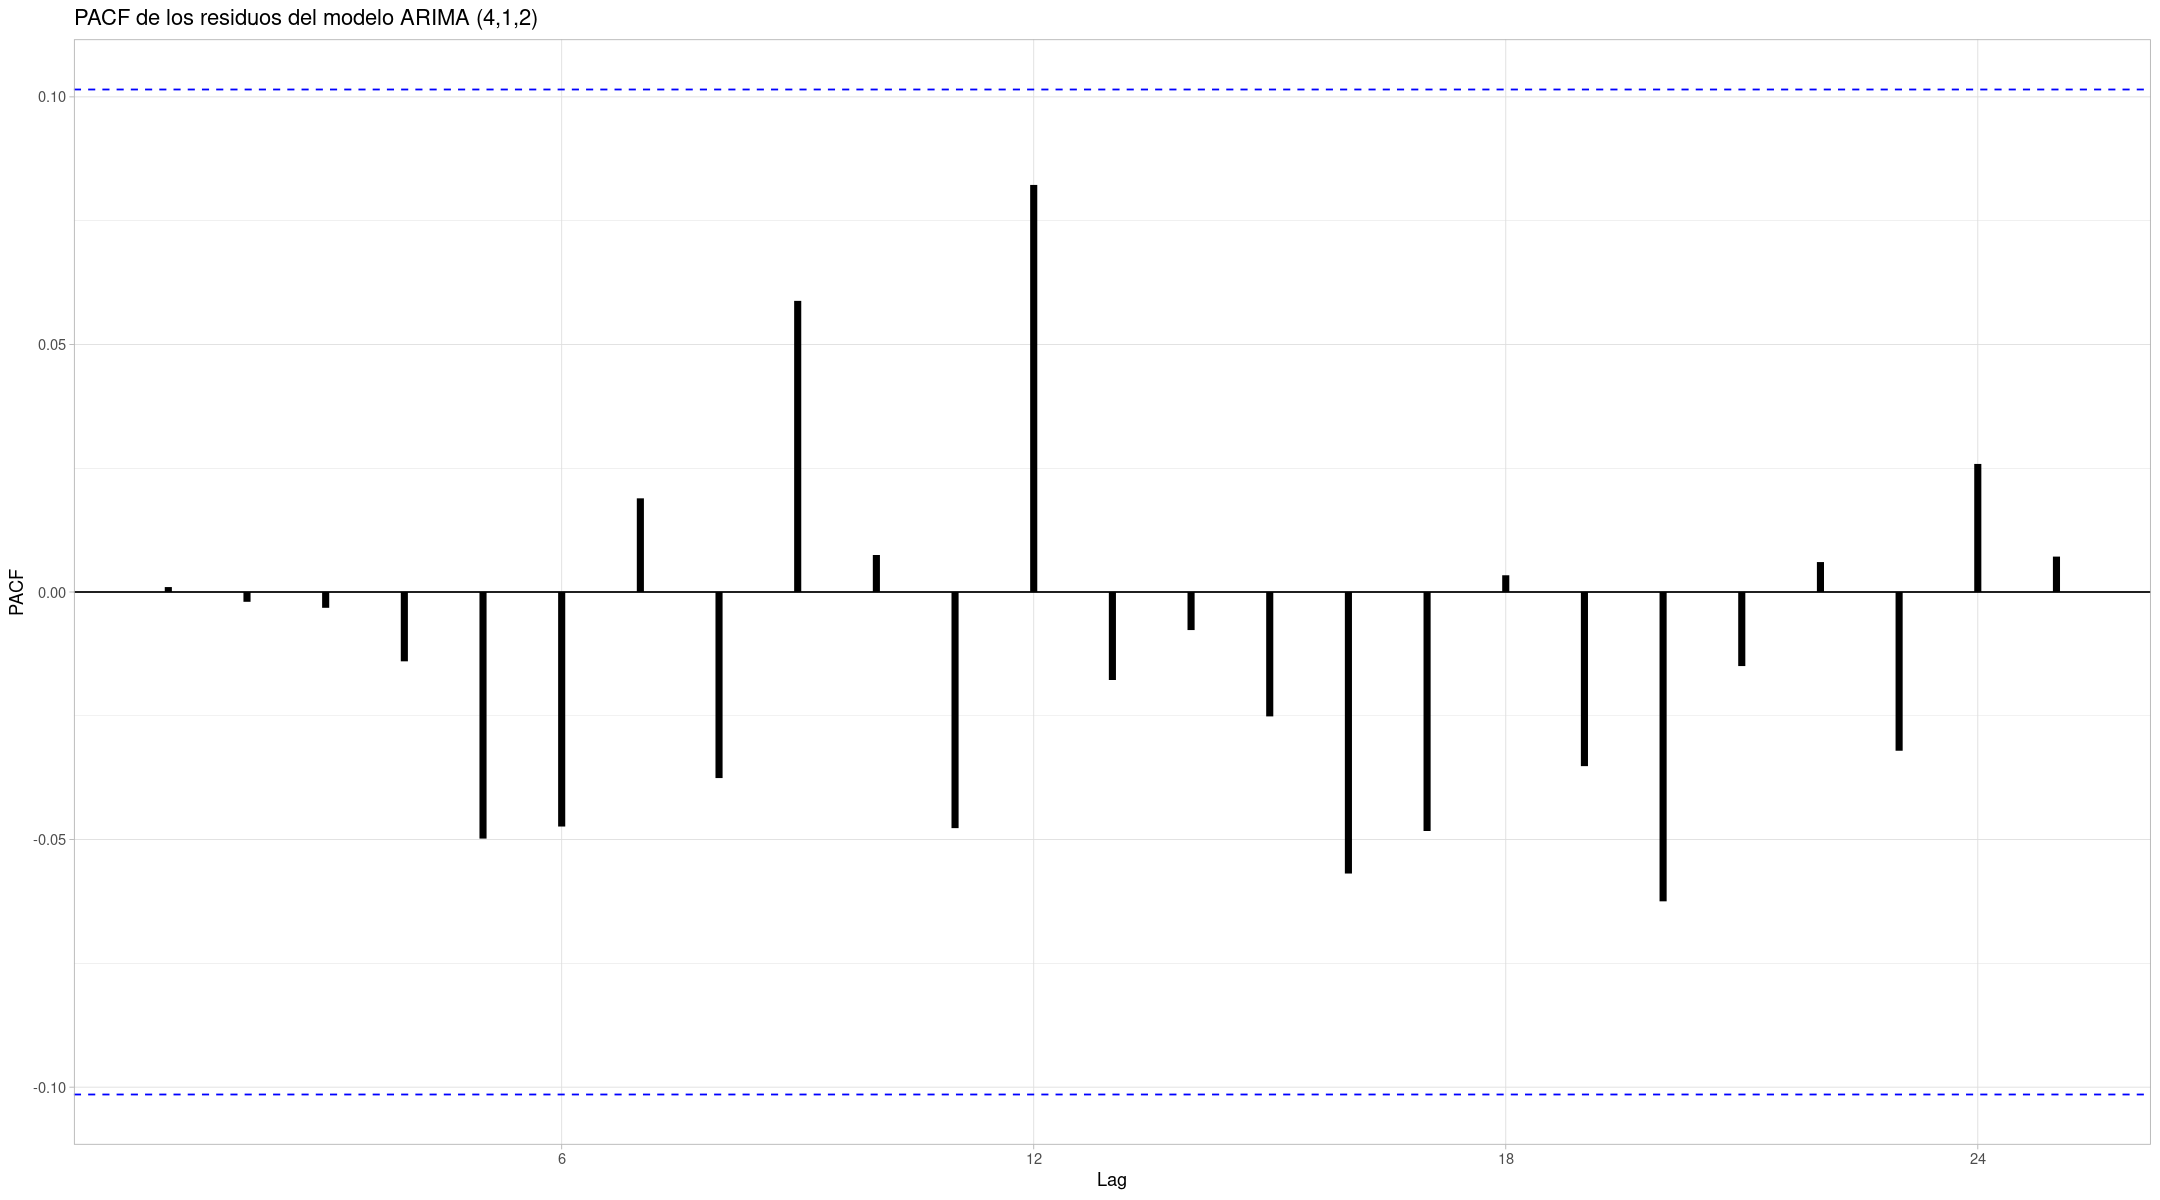

In [232]:
ggAcf(res_arima_4.0.3_dl.ts, lwd=2) + ggtitle("ACF de los residuos del modelo ARIMA (4,1,2)") + theme_light()

ggPacf(res_arima_4.0.3_dl.ts, lwd=2) + ggtitle("PACF de los residuos del modelo ARIMA (4,1,2)") + theme_light()


#### Prueba formal

In [233]:

lags.test = length(l.ts)/4
#test box-pierce
Box.test(res_arima_4.0.3_dl.ts, lag=lags.test, type = ("Box-Pierce")) #NRh0
Box.test(res_arima_4.0.3_dl.ts, lag=20, type = ("Box-Pierce")) #NRh0
Box.test(res_arima_4.0.3_dl.ts, lag=30, type = ("Box-Pierce")) #NRh0
# Test Ljung-Box
Box.test(res_arima_4.0.3_dl.ts, lag=lags.test, type = ("Ljung-Box")) #NRh0
Box.test(res_arima_4.0.3_dl.ts, lag=20, type = ("Ljung-Box")) #NRh0
Box.test(res_arima_4.0.3_dl.ts, lag=30, type = ("Ljung-Box")) #NRh0


	Box-Pierce test

data:  res_arima_4.0.3_dl.ts
X-squared = 62.83476, df = 93.5, p-value = 0.993765



	Box-Pierce test

data:  res_arima_4.0.3_dl.ts
X-squared = 11.58164, df = 20, p-value = 0.929723



	Box-Pierce test

data:  res_arima_4.0.3_dl.ts
X-squared = 20.02236, df = 30, p-value = 0.915958



	Box-Ljung test

data:  res_arima_4.0.3_dl.ts
X-squared = 72.51949, df = 93.5, p-value = 0.947072



	Box-Ljung test

data:  res_arima_4.0.3_dl.ts
X-squared = 12.05083, df = 20, p-value = 0.914315



	Box-Ljung test

data:  res_arima_4.0.3_dl.ts
X-squared = 21.21225, df = 30, p-value = 0.881134


### Pruebas de Heterocedasticidad en los residuales

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ p.value
[1,]     4 12.6 0.01355
[2,]     8 14.5 0.07005
[3,]    12 21.1 0.04917
[4,]    16 36.6 0.00237
[5,]    20 37.6 0.00992
[6,]    24 38.3 0.03247
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 258.7 0.000000
[2,]     8 122.7 0.000000
[3,]    12  32.1 0.000731
[4,]    16  19.0 0.214299
[5,]    20  15.0 0.723000
[6,]    24  13.5 0.940941


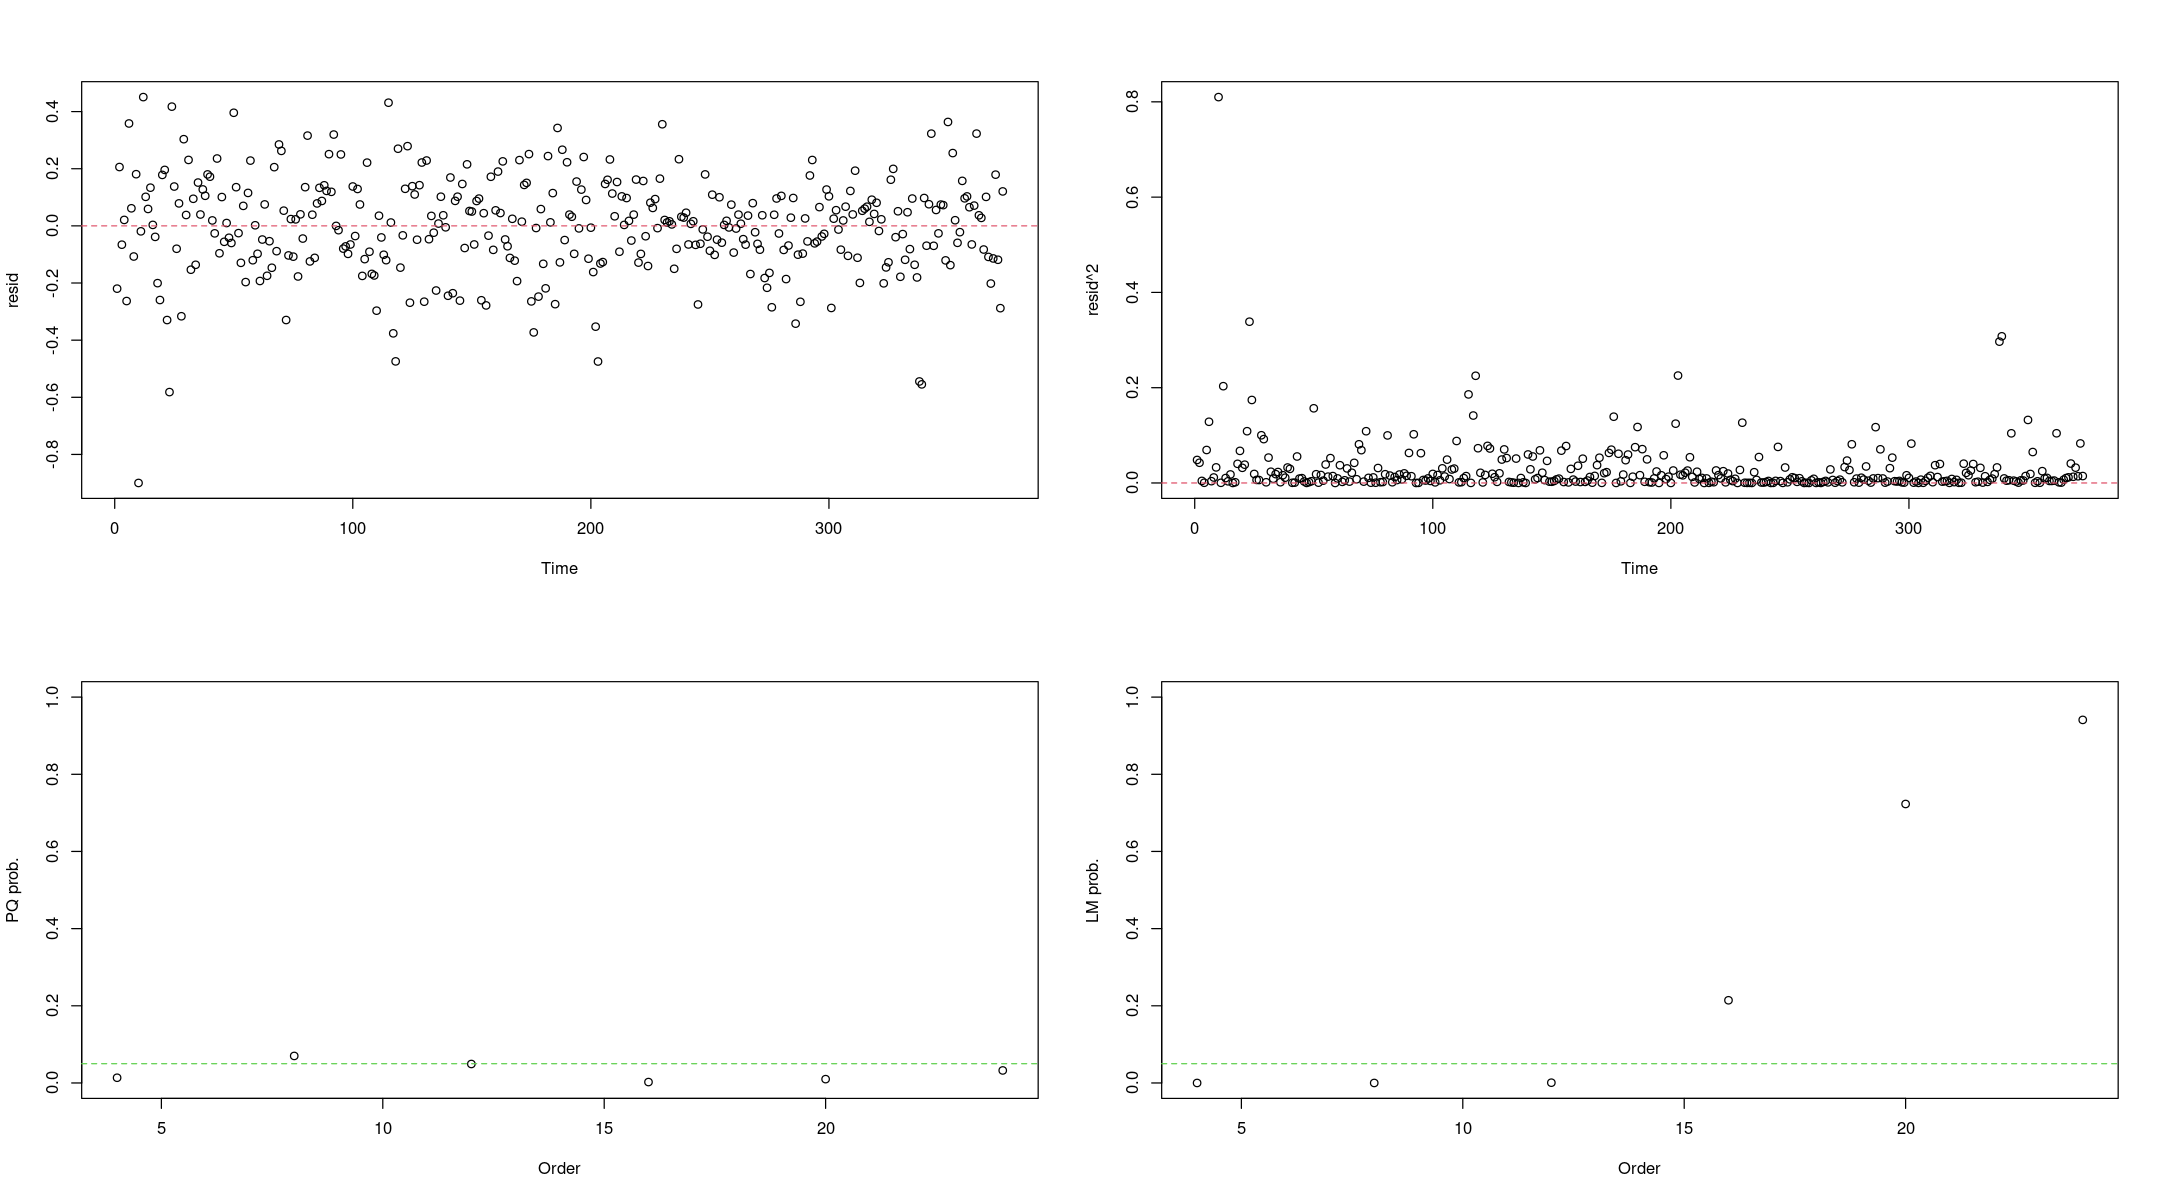

In [234]:
arch_l.ts <-arch.test(arima_4.0.3_dlts, output=TRUE)

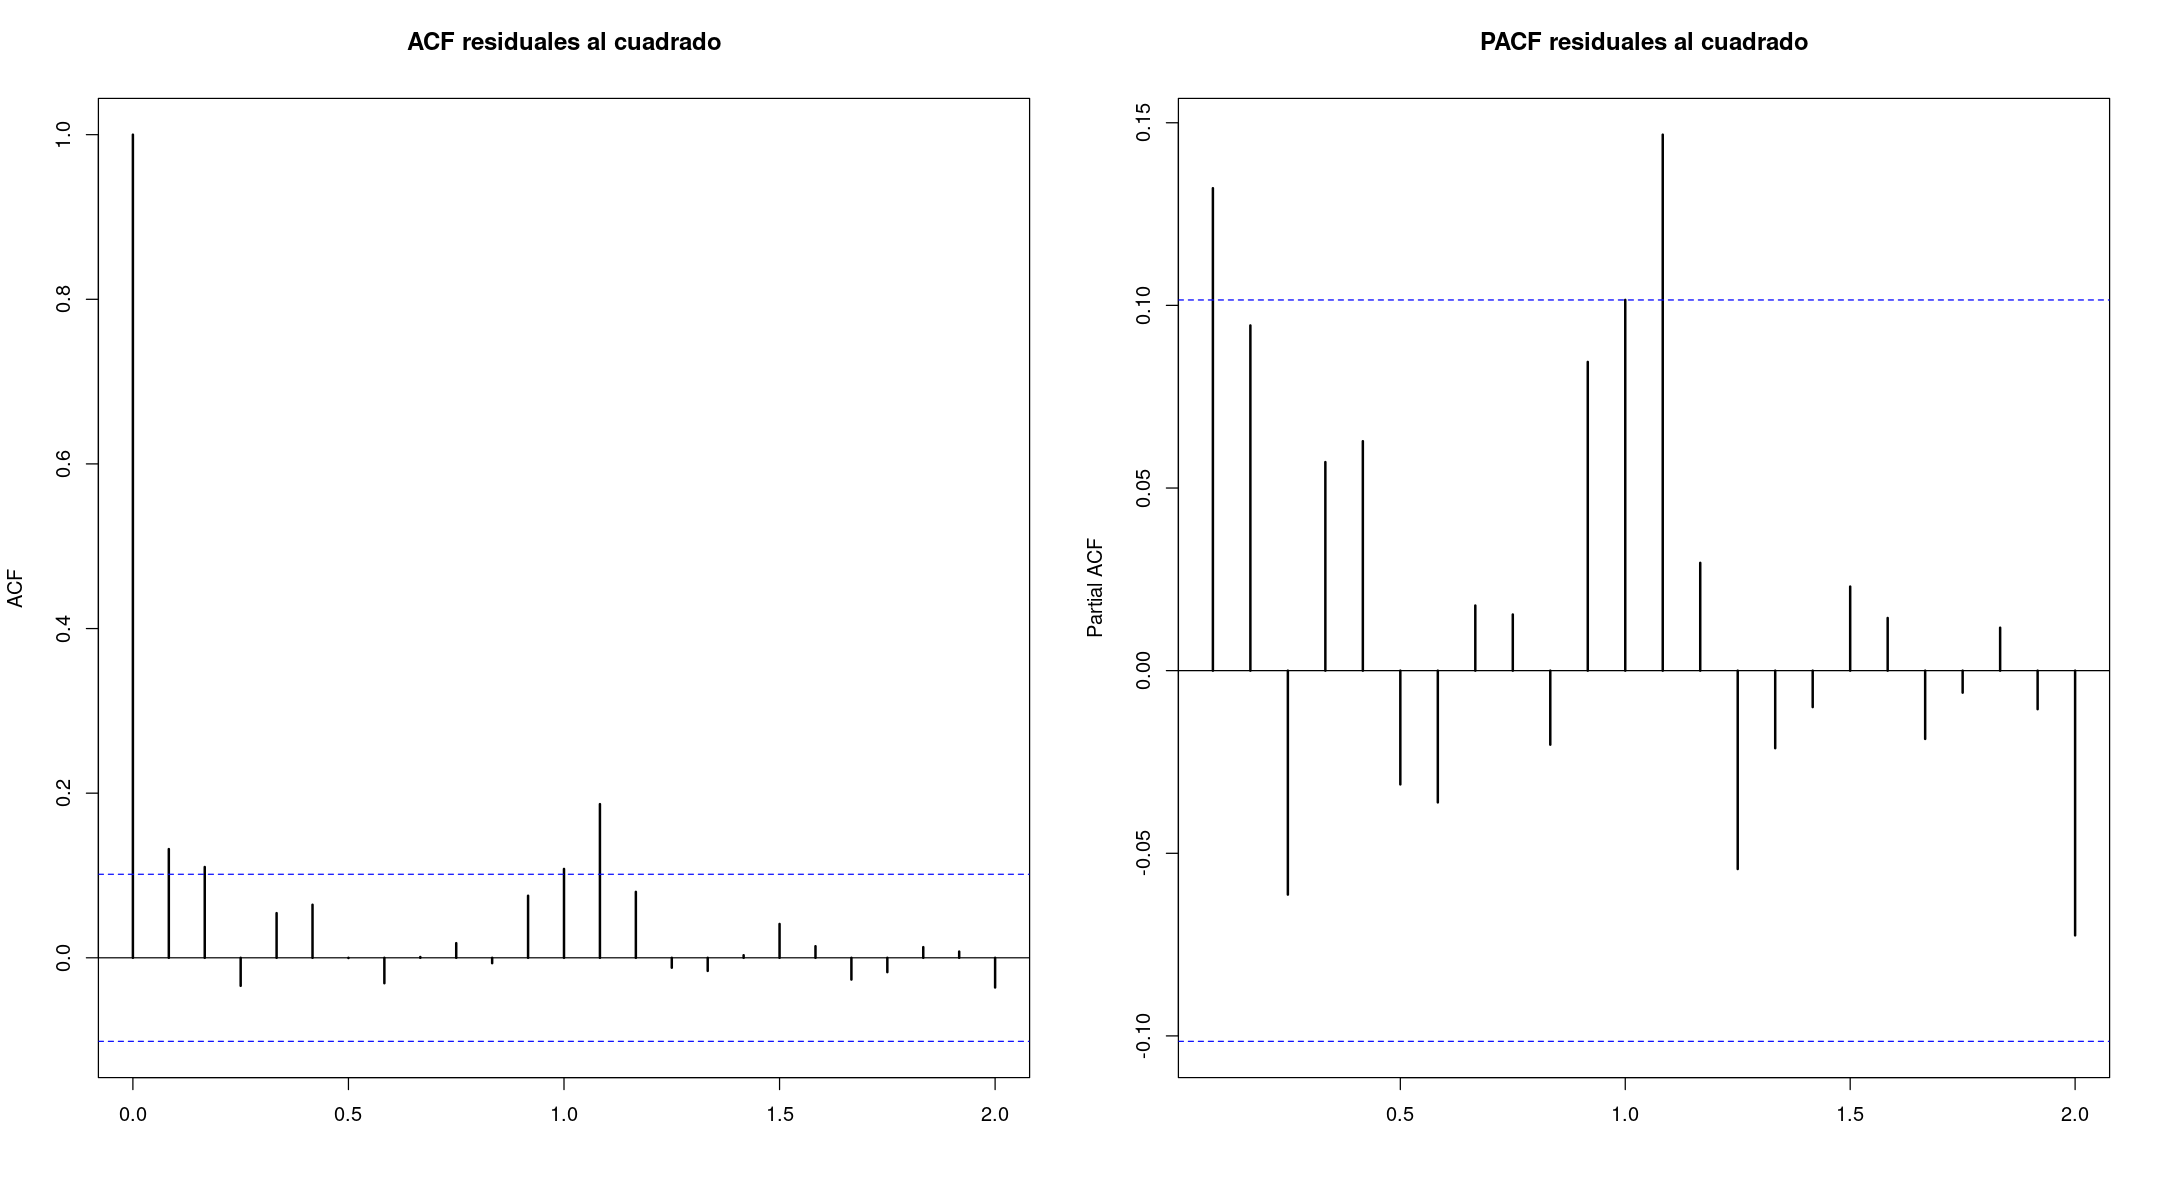

In [235]:
par(mfrow=c(1,2))
acf(res_arima_4.0.3_dl.ts^2,lag.max=24,plot=T,lwd=2,xlab='',main='ACF residuales al cuadrado') 
pacf(res_arima_4.0.3_dl.ts^2,lag.max=24,plot=T,lwd=2,xlab='',main='PACF residuales al cuadrado')

### Pruebas de normalidad en los residuales

In [236]:
jarque.bera.test(res_arima_4.0.3_dl.ts)


	Jarque Bera Test

data:  res_arima_4.0.3_dl.ts
X-squared = 106.6383, df = 2, p-value < 2.22e-16


[1] 10 23

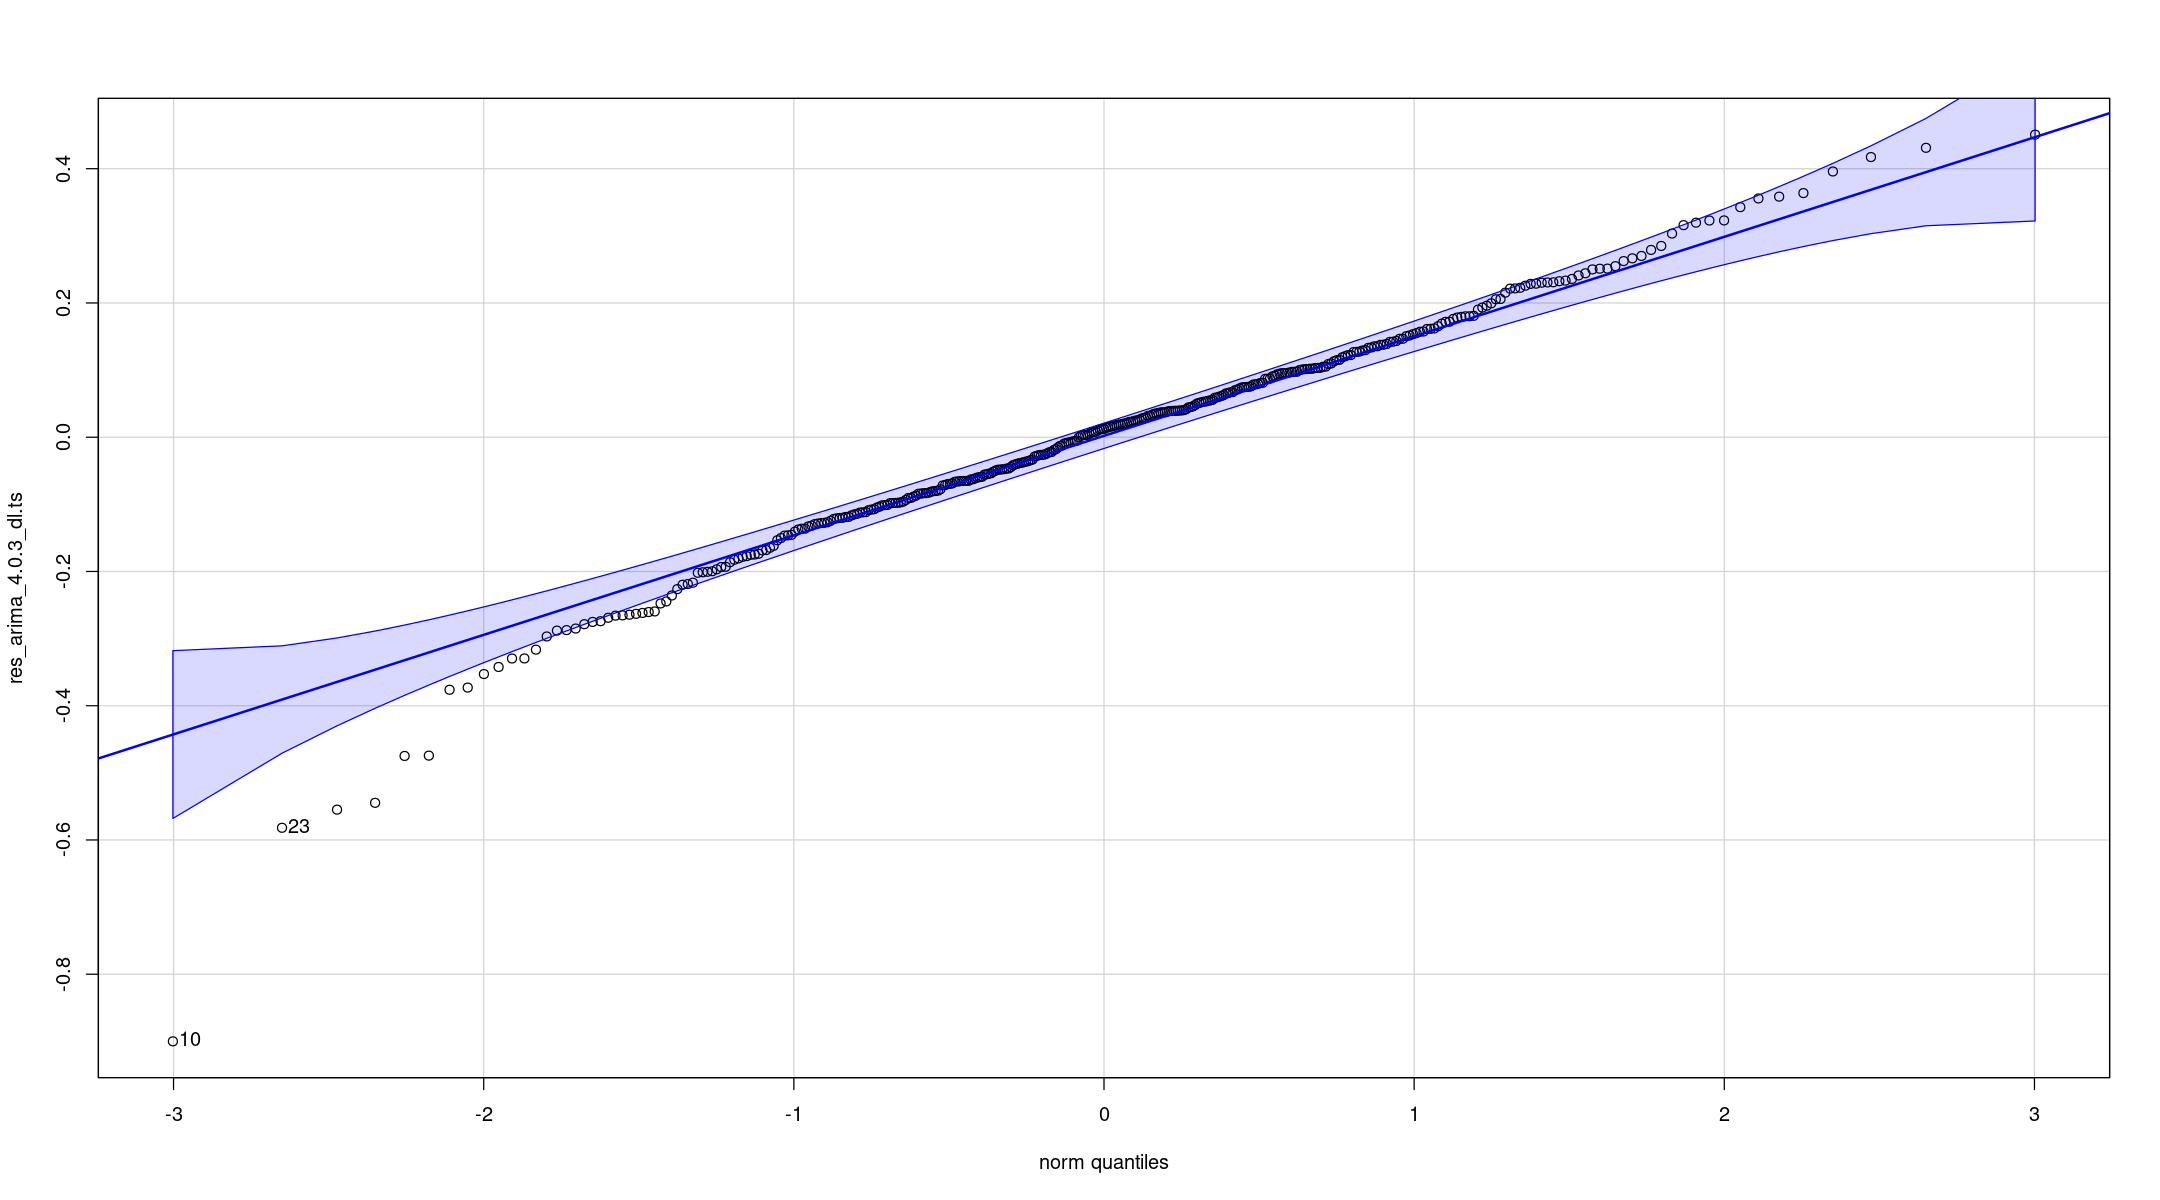

In [237]:
par(mfrow=c(1,1))
qqPlot(res_arima_4.0.3_dl.ts)

## MA(1)

### Pruebas de correlación serial en los residuales

In [238]:
res_arima_0.0.1_dl.ts = residuals(arima_0.0.1_dlts)

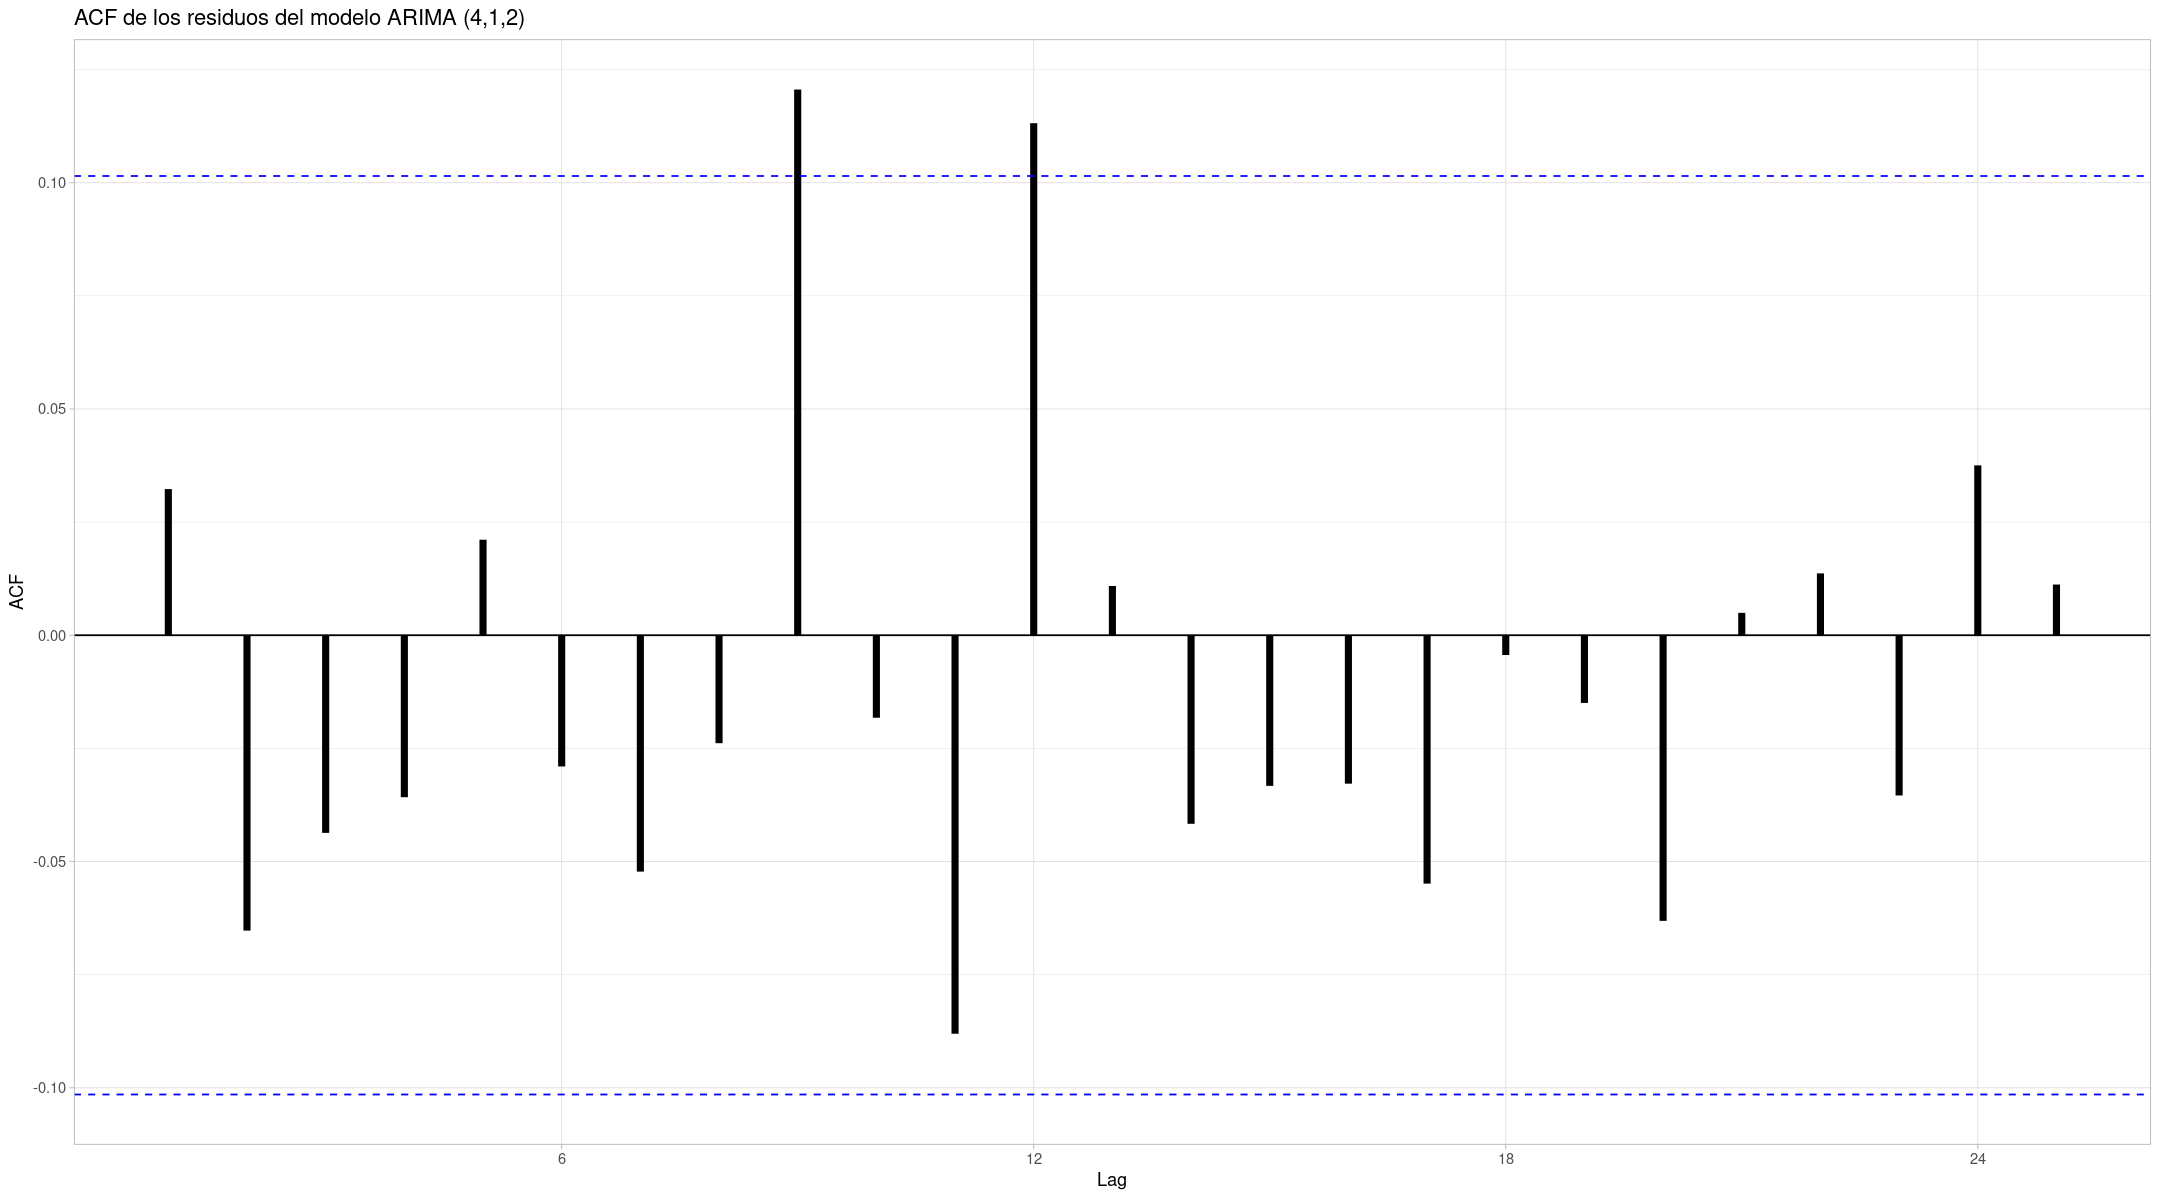

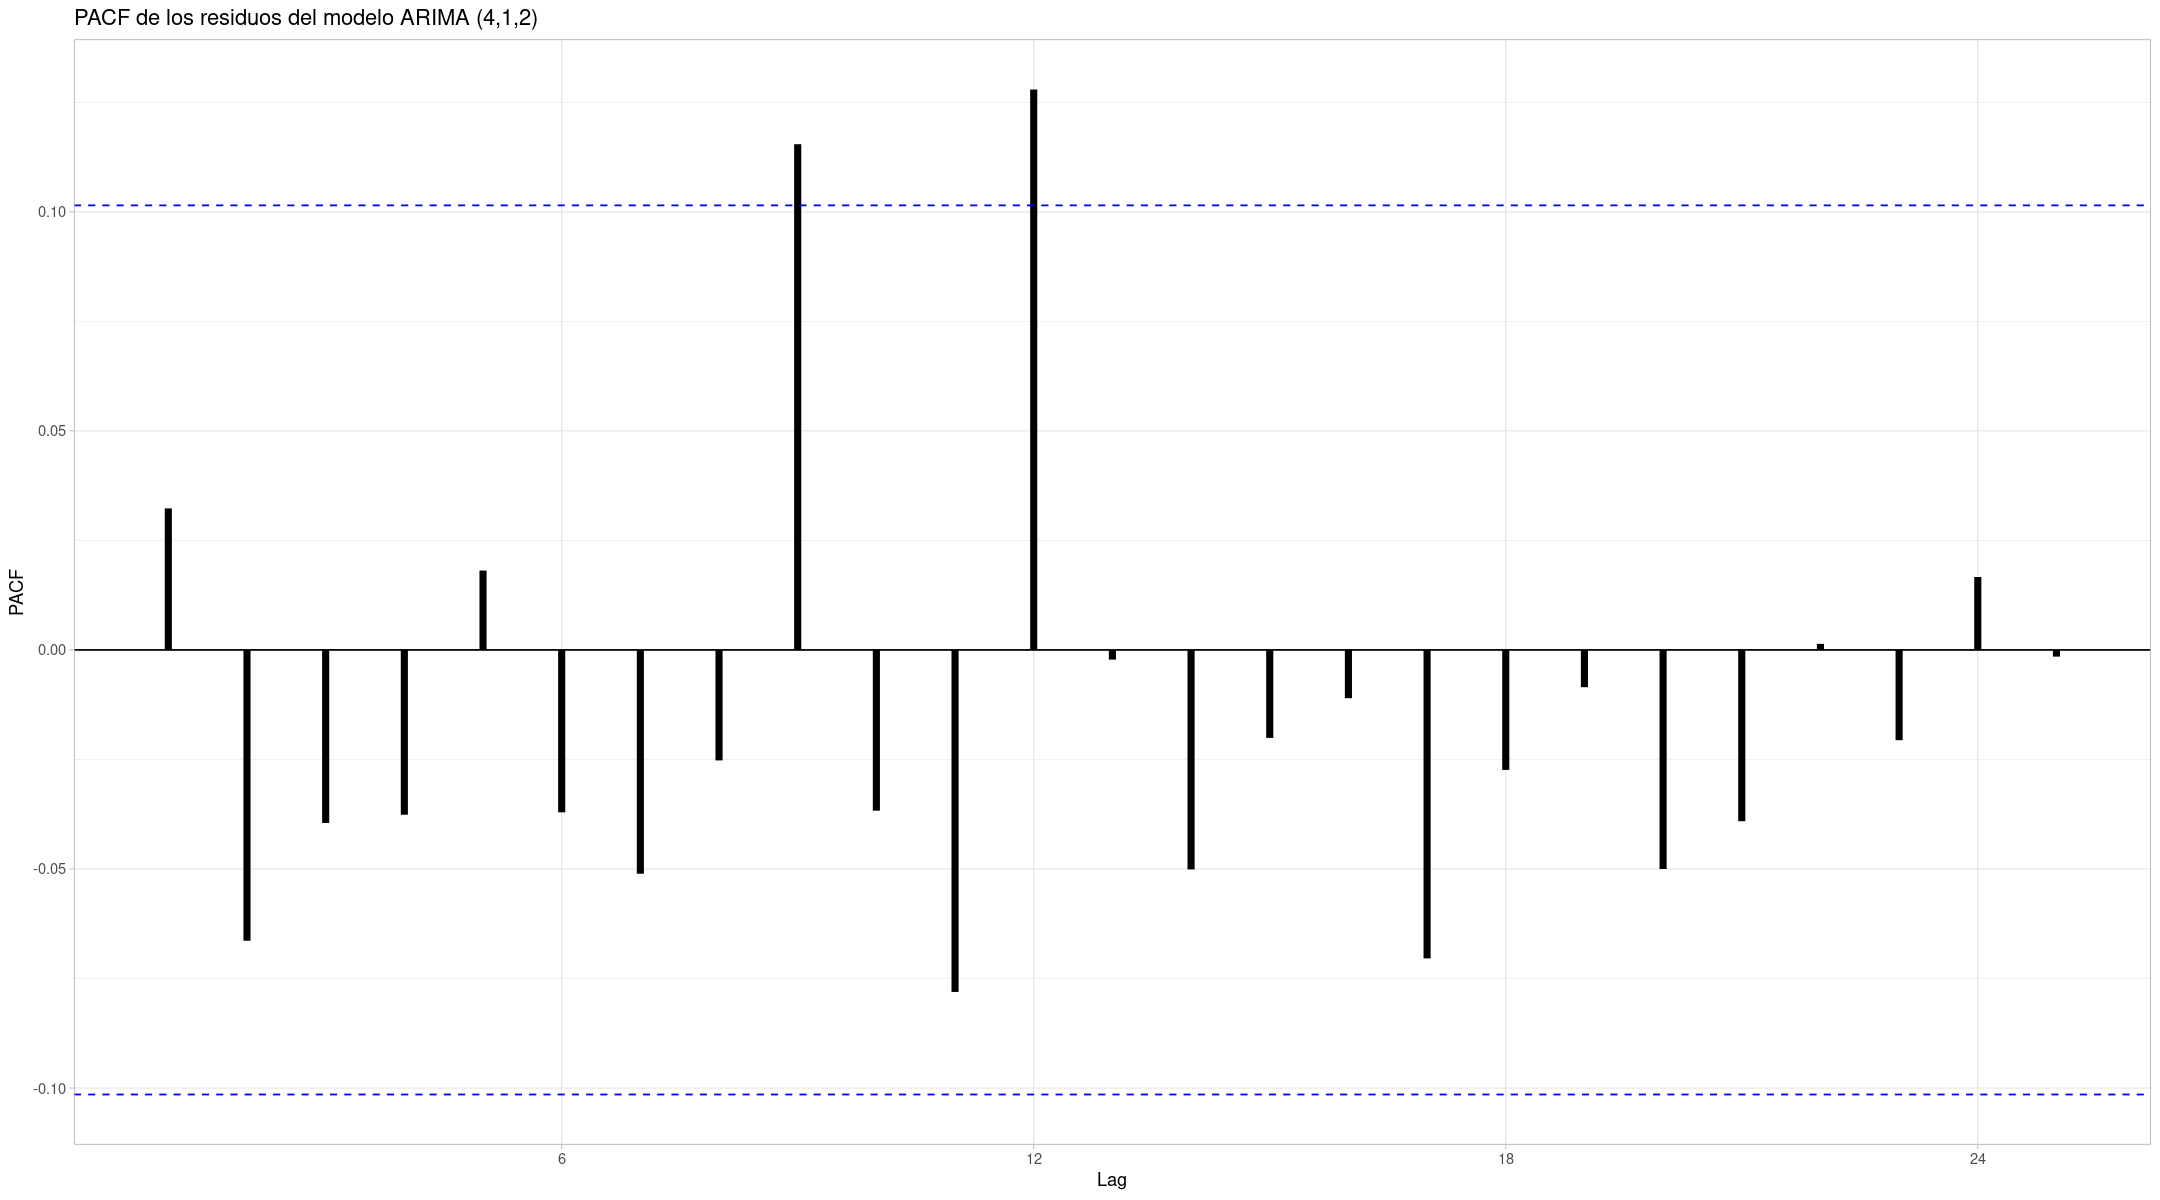

In [239]:
ggAcf(res_arima_0.0.1_dl.ts, lwd=2) + ggtitle("ACF de los residuos del modelo ARIMA (4,1,2)") + theme_light()

ggPacf(res_arima_0.0.1_dl.ts, lwd=2) + ggtitle("PACF de los residuos del modelo ARIMA (4,1,2)") + theme_light()

#### Prueba formal

In [240]:

lags.test = length(l.ts)/4
#test box-pierce
Box.test(res_arima_0.0.1_dl.ts, lag=lags.test, type = ("Box-Pierce")) #NRh0
Box.test(res_arima_0.0.1_dl.ts, lag=20, type = ("Box-Pierce")) #NRh0
Box.test(res_arima_0.0.1_dl.ts, lag=30, type = ("Box-Pierce")) #NRh0
# Test Ljung-Box
Box.test(res_arima_0.0.1_dl.ts, lag=lags.test, type = ("Ljung-Box")) #NRh0
Box.test(res_arima_0.0.1_dl.ts, lag=20, type = ("Ljung-Box")) #NRh0
Box.test(res_arima_0.0.1_dl.ts, lag=30, type = ("Ljung-Box")) #NRh0


	Box-Pierce test

data:  res_arima_0.0.1_dl.ts
X-squared = 73.10615, df = 93.5, p-value = 0.941367



	Box-Pierce test

data:  res_arima_0.0.1_dl.ts
X-squared = 22.2986, df = 20, p-value = 0.32453



	Box-Pierce test

data:  res_arima_0.0.1_dl.ts
X-squared = 31.51679, df = 30, p-value = 0.390331



	Box-Ljung test

data:  res_arima_0.0.1_dl.ts
X-squared = 82.80635, df = 93.5, p-value = 0.777779



	Box-Ljung test

data:  res_arima_0.0.1_dl.ts
X-squared = 23.06263, df = 20, p-value = 0.28573



	Box-Ljung test

data:  res_arima_0.0.1_dl.ts
X-squared = 33.0677, df = 30, p-value = 0.319611


### Pruebas de Heterocedasticidad en los residuales

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ  p.value
[1,]     4 15.9 3.14e-03
[2,]     8 17.8 2.28e-02
[3,]    12 25.8 1.16e-02
[4,]    16 49.3 2.98e-05
[5,]    20 52.0 1.14e-04
[6,]    24 52.8 6.16e-04
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 277.3 0.000000
[2,]     8 132.1 0.000000
[3,]    12  33.4 0.000453
[4,]    16  16.5 0.346790
[5,]    20  12.9 0.841812
[6,]    24  13.4 0.941579


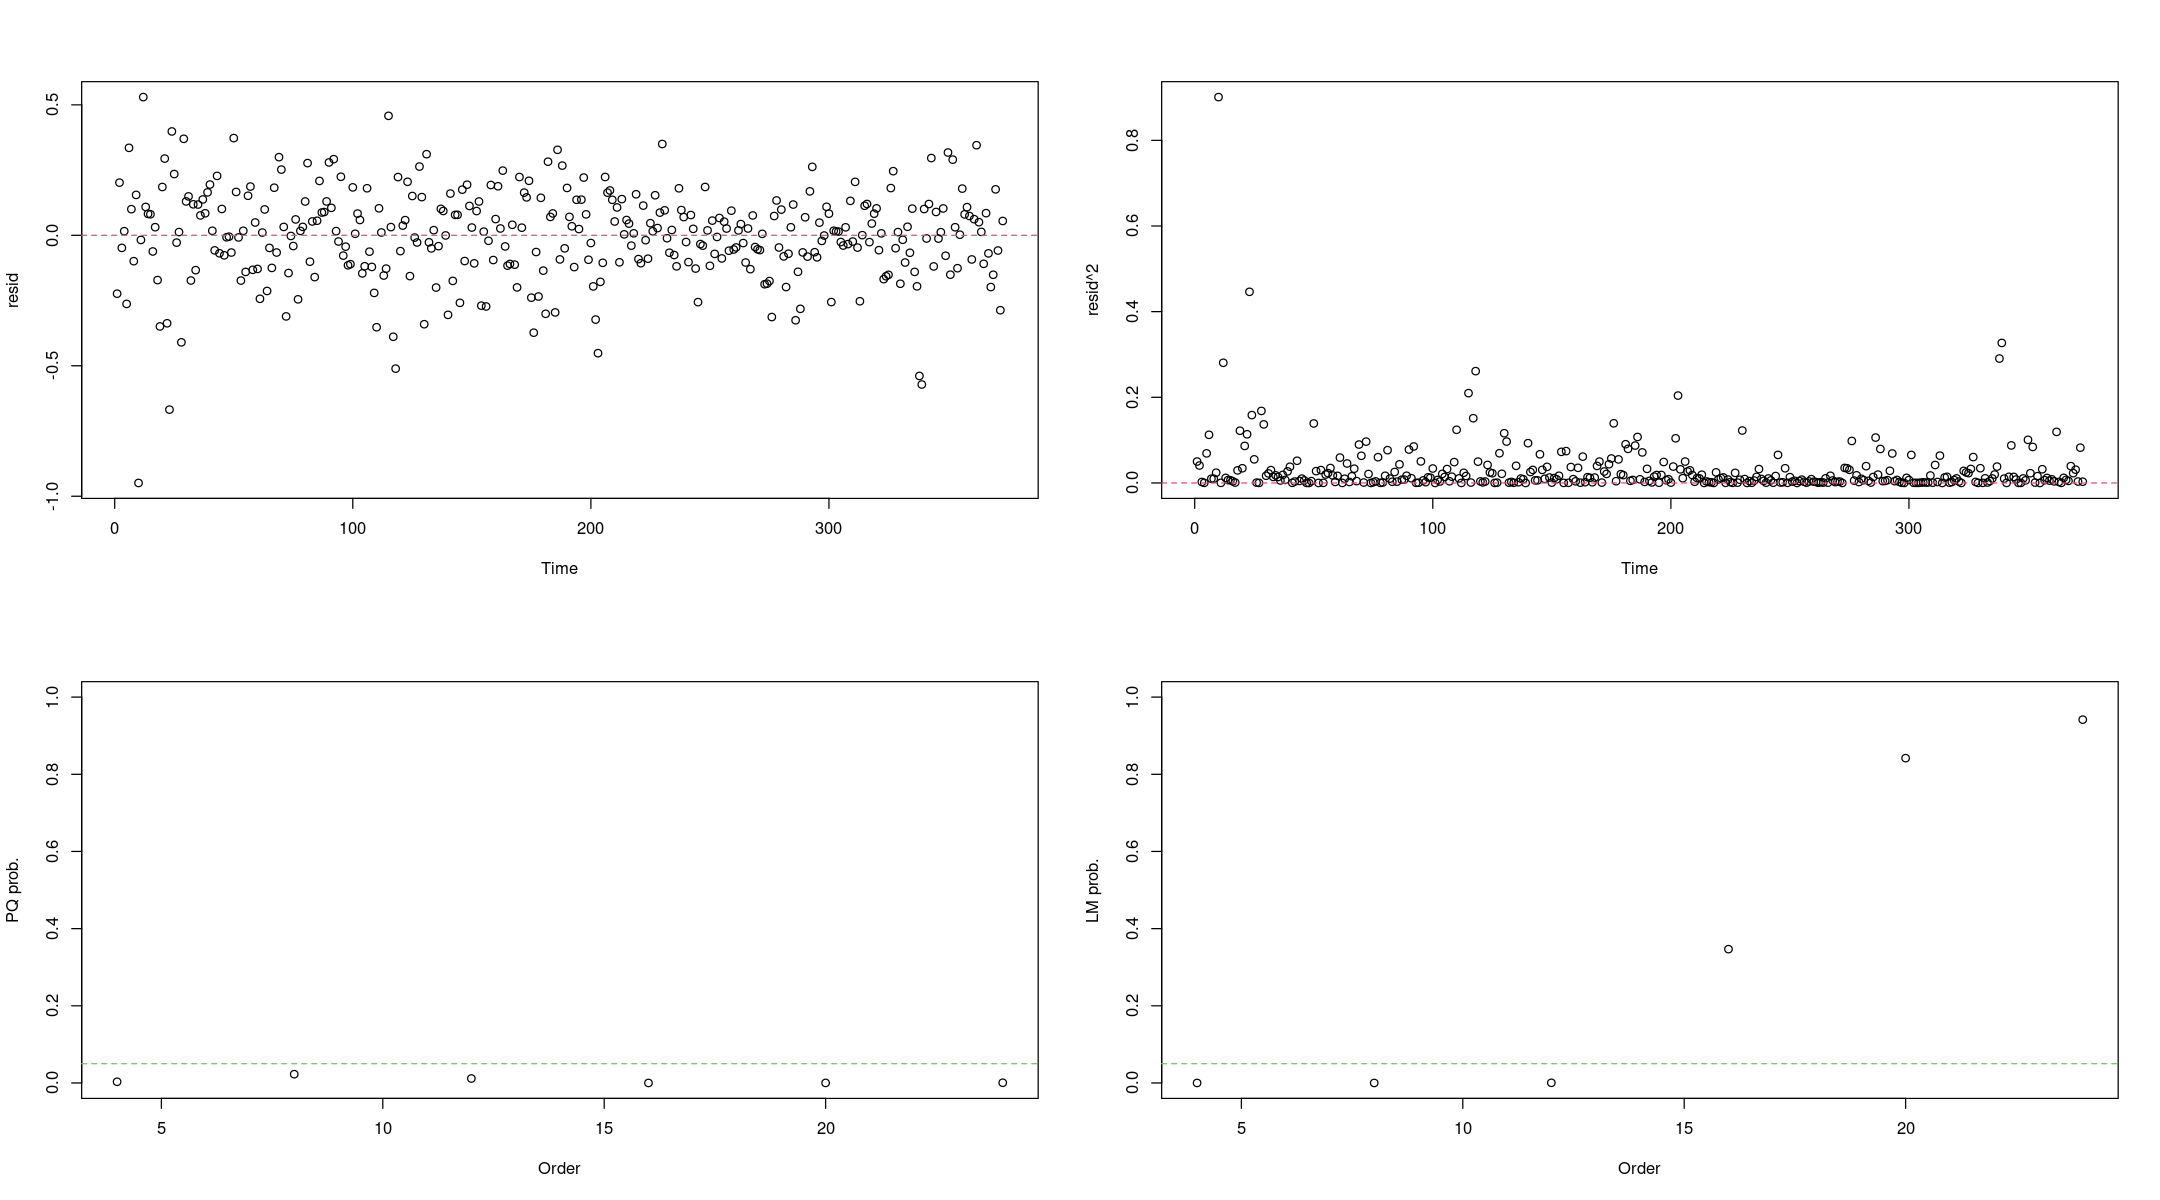

In [241]:
arch_l.ts <-arch.test(arima_0.0.1_dlts, output=TRUE)

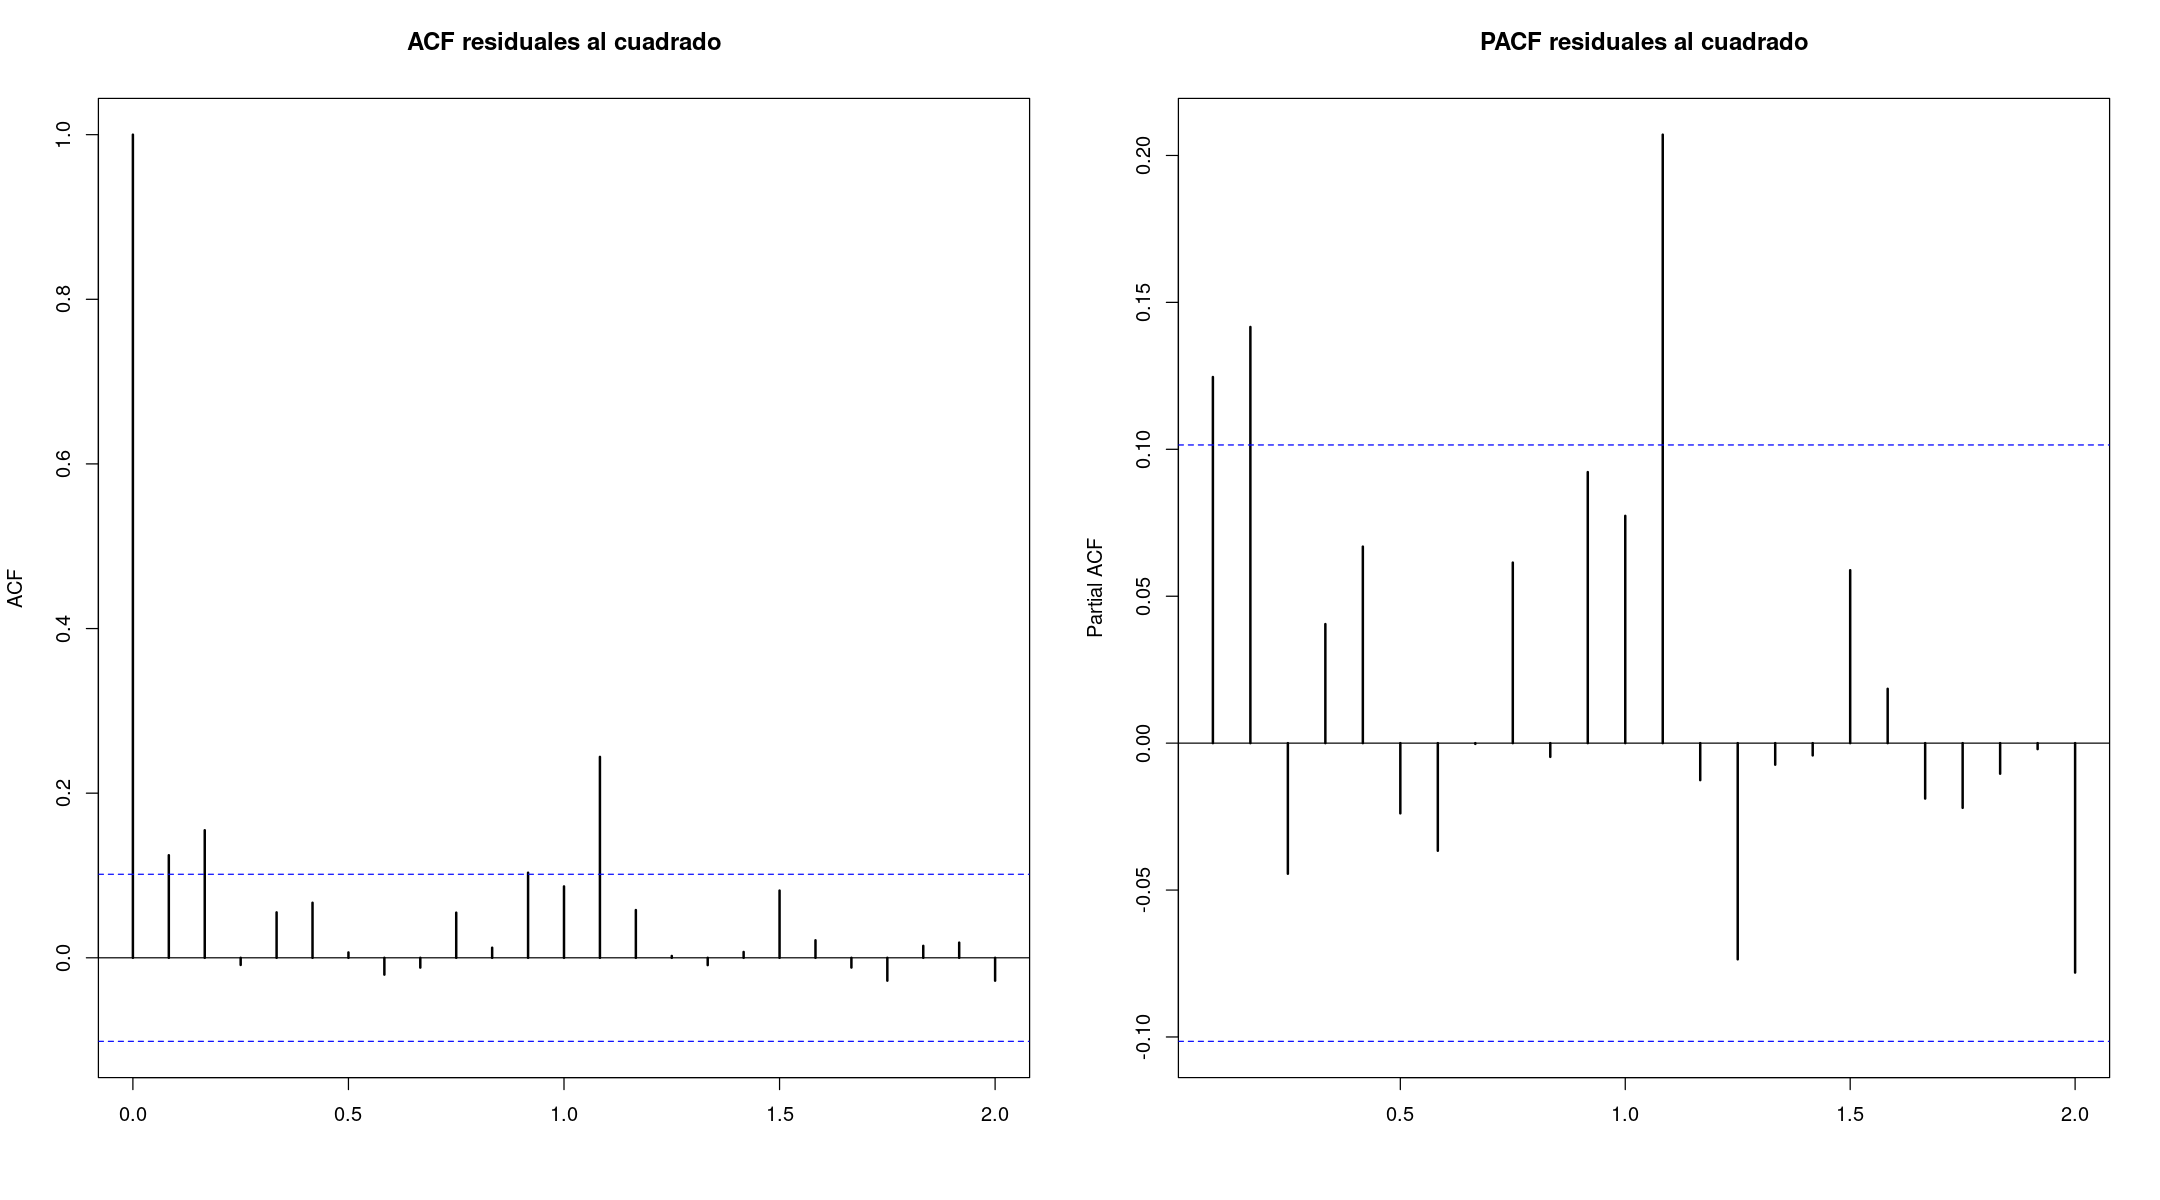

In [242]:
par(mfrow=c(1,2))
acf(res_arima_0.0.1_dl.ts^2,lag.max=24,plot=T,lwd=2,xlab='',main='ACF residuales al cuadrado') 
pacf(res_arima_0.0.1_dl.ts^2,lag.max=24,plot=T,lwd=2,xlab='',main='PACF residuales al cuadrado')

### Pruebas de normalidad en los residuales

In [243]:
jarque.bera.test(res_arima_0.0.1_dl.ts)


	Jarque Bera Test

data:  res_arima_0.0.1_dl.ts
X-squared = 148.491, df = 2, p-value < 2.22e-16


[1] 10 23

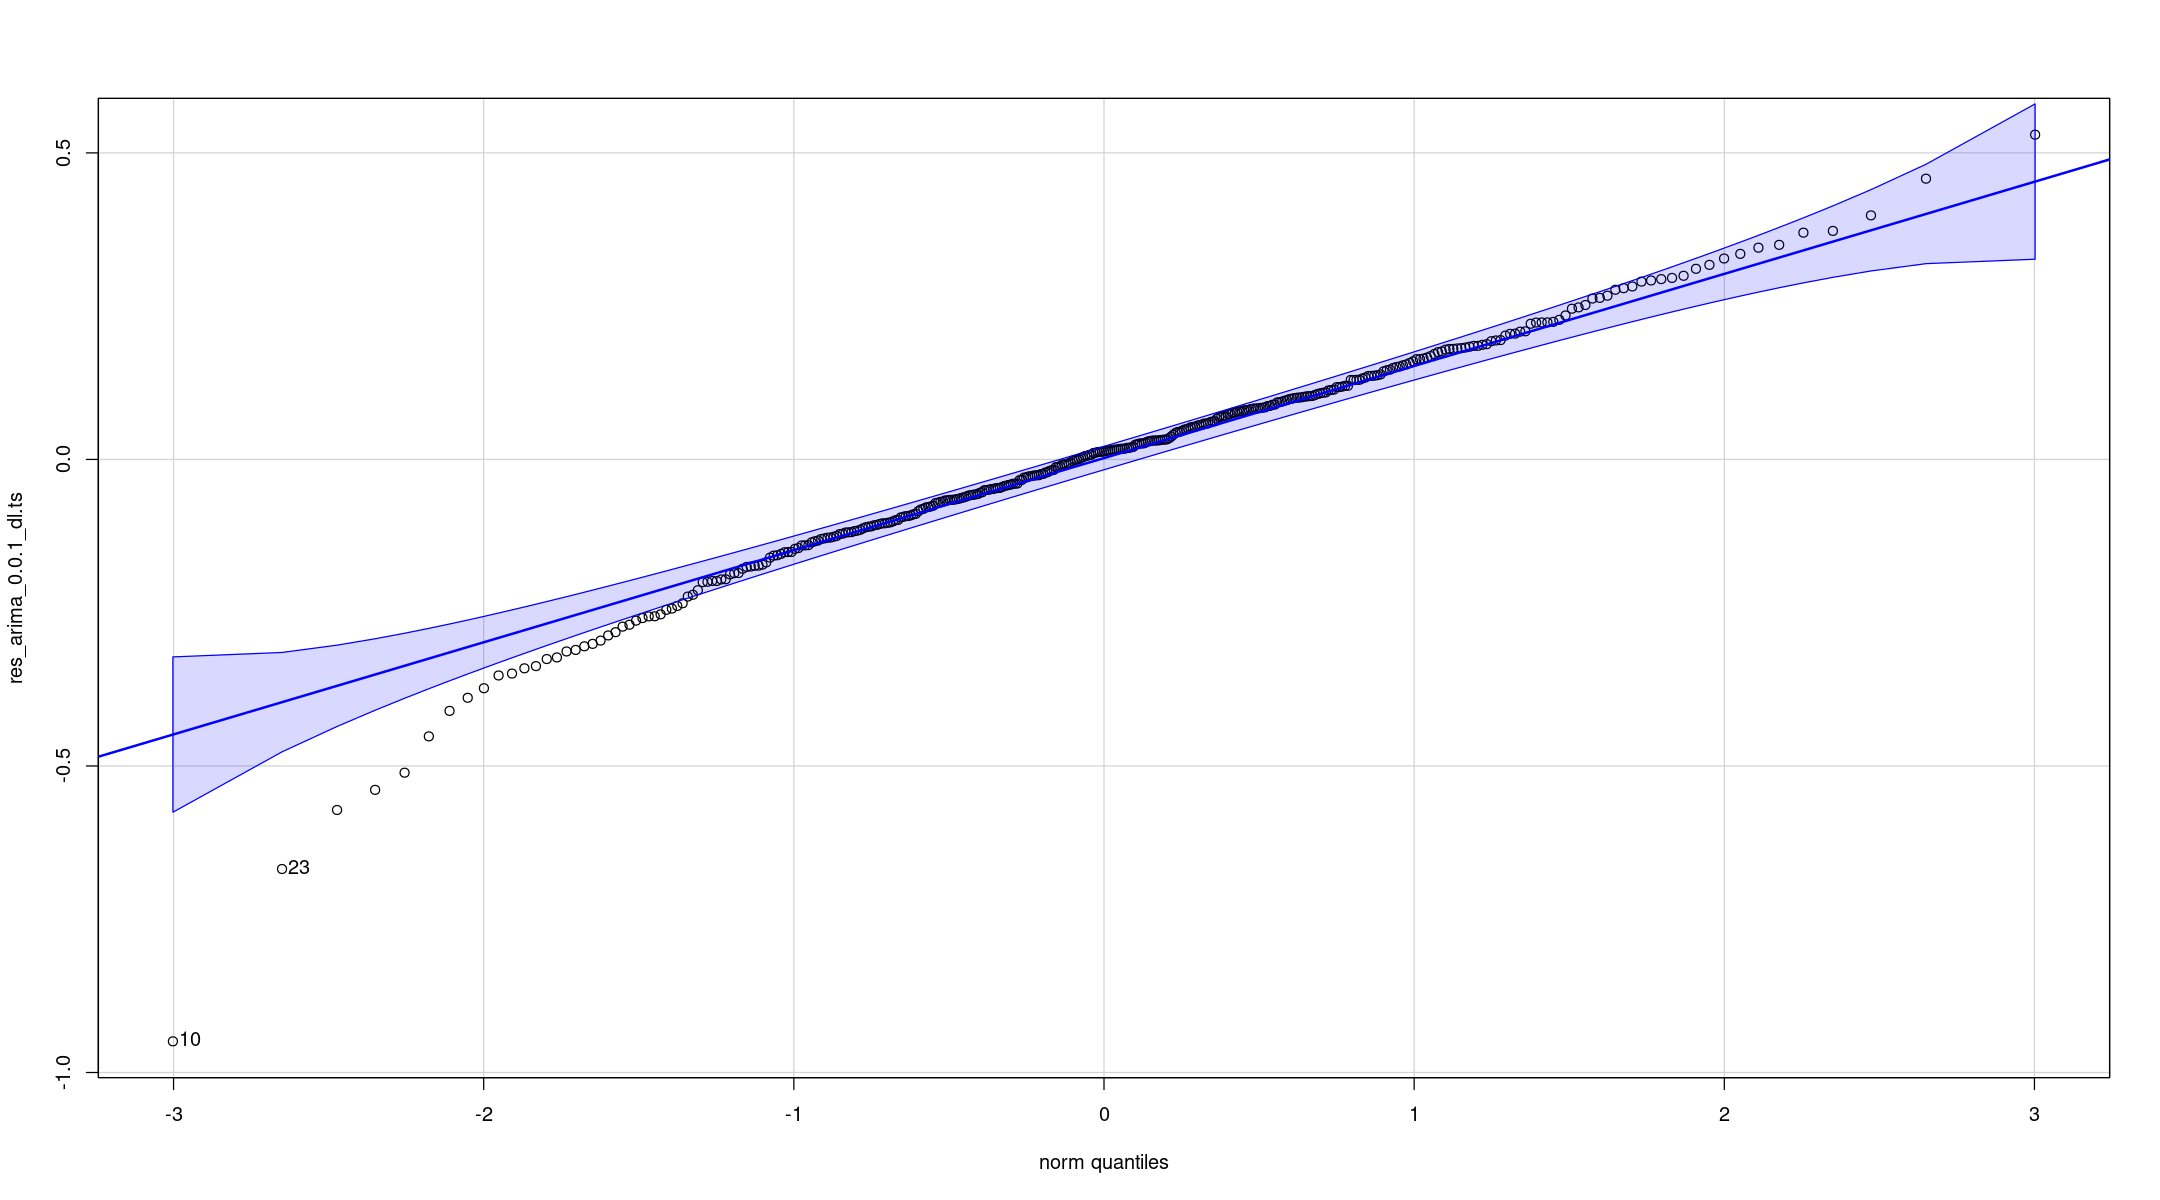

In [244]:
par(mfrow=c(1,1))
qqPlot(res_arima_0.0.1_dl.ts)

# Pronostico

In [245]:
detach("package:forecast", unload=TRUE)
install.packages("forecast")

Installing package into ‘/home/lekillergallet/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message in install.packages("forecast"):
“installation of package ‘forecast’ had non-zero exit status”


In [246]:
library(forecast)

forescast_arima_4.1.2_lts = arima_4.1.2_lts_fable %>% 
  forecast(h = 10, bootstrap = TRUE, times = 10000); forescast_arima_4.1.2_lts

forescast_arima_0.1.1_lts = arima_0.1.1_lts_fable %>%
  forecast(h = 10, bootstrap = TRUE, times = 10000); forescast_arima_0.1.1_lts

# forescast_arima_4.0.3_lts = arima_4.0.3_lts_fable %>%
#   forecast(h = 10, bootstrap = TRUE, times = 10000); forescast_arima_4.0.3_lts

forescast_arima_0.0.1_lts = arima_0.0.1_lts_fable %>%
  forecast(h = 10, bootstrap = TRUE, times = 10000); forescast_arima_0.0.1_lts


Attaching package: ‘forecast’


The following object is masked from ‘package:aTSA’:

    forecast


The following object is masked from ‘package:fabletools’:

    accuracy




.model   index    value         .mean     
1  arima412 2023 Mar sample[10000] 8.68826795
2  arima412 2023 Apr sample[10000] 8.70550956
3  arima412 2023 May sample[10000] 8.71870012
4  arima412 2023 Jun sample[10000] 8.72520730
5  arima412 2023 Jul sample[10000] 8.74204895
6  arima412 2023 Aug sample[10000] 8.75032001
7  arima412 2023 Sep sample[10000] 8.76398564
8  arima412 2023 Oct sample[10000] 8.77588402
9  arima412 2023 Nov sample[10000] 8.78970452
10 arima412 2023 Dec sample[10000] 8.80000469

.model   index    value         .mean     
1  arima011 2023 Mar sample[10000] 8.72589056
2  arima011 2023 Apr sample[10000] 8.71530877
3  arima011 2023 May sample[10000] 8.74195873
4  arima011 2023 Jun sample[10000] 8.73416773
5  arima011 2023 Jul sample[10000] 8.75649662
6  arima011 2023 Aug sample[10000] 8.75996207
7  arima011 2023 Sep sample[10000] 8.75594682
8  arima011 2023 Oct sample[10000] 8.75701928
9  arima011 2023 Nov sample[10000] 8.80527110
10 arima011 2023 Dec sample[10000] 8.80088631

.model   index    value         .mean     
1  arima001 2023 Mar sample[10000] 7.76232735
2  arima001 2023 Apr sample[10000] 7.04284423
3  arima001 2023 May sample[10000] 7.02938644
4  arima001 2023 Jun sample[10000] 7.03446358
5  arima001 2023 Jul sample[10000] 7.04359797
6  arima001 2023 Aug sample[10000] 7.04552512
7  arima001 2023 Sep sample[10000] 7.03442111
8  arima001 2023 Oct sample[10000] 7.03302250
9  arima001 2023 Nov sample[10000] 7.04600717
10 arima001 2023 Dec sample[10000] 7.04912062

In [247]:
xforescast_arima_4.1.2_lts = forescast_arima_4.1.2_lts %>% 
  hilo(level = c(80, 90, 95)); xforescast_arima_4.1.2_lts

xforescast_arima_0.1.1_lts = forescast_arima_0.1.1_lts %>%
  hilo(level = c(80, 90, 95)); xforescast_arima_0.1.1_lts

# xforescast_arima_4.0.3_lts = forescast_arima_4.0.3_lts %>%
#   hilo(level = c(80, 90, 95)); xforescast_arima_4.0.3_lts

xforescast_arima_0.0.1_lts = forescast_arima_0.0.1_lts %>%
  hilo(level = c(80, 90, 95)); xforescast_arima_0.0.1_lts

.model   index    value         .mean      80%                       
1  arima412 2023 Mar sample[10000] 8.68826795 [8.48841553, 8.88252134]80
2  arima412 2023 Apr sample[10000] 8.70550956 [8.44888967, 8.95084723]80
3  arima412 2023 May sample[10000] 8.71870012 [8.43268960, 8.99839937]80
4  arima412 2023 Jun sample[10000] 8.72520730 [8.41434057, 9.02851213]80
5  arima412 2023 Jul sample[10000] 8.74204895 [8.40889873, 9.06834508]80
6  arima412 2023 Aug sample[10000] 8.75032001 [8.39056741, 9.10177620]80
7  arima412 2023 Sep sample[10000] 8.76398564 [8.38841826, 9.12689510]80
8  arima412 2023 Oct sample[10000] 8.77588402 [8.38481258, 9.16015349]80
9  arima412 2023 Nov sample[10000] 8.78970452 [8.36290455, 9.19859860]80
10 arima412 2023 Dec sample[10000] 8.80000469 [8.36522112, 9.21730844]80
   90%                        95%                       
1  [8.38972429, 8.95424398]90 [8.33730928, 9.03488728]95
2  [8.35920847, 9.02710099]90 [8.26966826, 9.08434151]95
3  [8.32979763, 9.07554408]90 [8.23727737, 9.13462787]95
4  [8.29895899, 9.11448062]90 [8.19971684, 9.18977833]95
5  [8.29351544, 9.15675960]90 [8.18661321, 9.23805068]95
6  [8.27370812, 9.19315864]90 [8.15881110, 9.27603580]95
7  [8.26443939, 9.23367167]90 [8.13649631, 9.31903724]95
8  [8.24696043, 9.26645464]90 [8.12468194, 9.36052786]95
9  [8.22253626, 9.30282508]90 [8.10267886, 9.39678270]95
10 [8.22603615, 9.33483301]90 [8.08243731, 9.43843636]95

.model   index    value         .mean      80%                       
1  arima011 2023 Mar sample[10000] 8.72589056 [8.51144352, 8.92890915]80
2  arima011 2023 Apr sample[10000] 8.71530877 [8.46957411, 8.95596449]80
3  arima011 2023 May sample[10000] 8.74195873 [8.45949058, 9.01905674]80
4  arima011 2023 Jun sample[10000] 8.73416773 [8.41289100, 9.04496813]80
5  arima011 2023 Jul sample[10000] 8.75649662 [8.41233563, 9.09436628]80
6  arima011 2023 Aug sample[10000] 8.75996207 [8.37901316, 9.12481266]80
7  arima011 2023 Sep sample[10000] 8.75594682 [8.34933886, 9.14857959]80
8  arima011 2023 Oct sample[10000] 8.75701928 [8.32068186, 9.17482073]80
9  arima011 2023 Nov sample[10000] 8.80527110 [8.35018320, 9.24502805]80
10 arima011 2023 Dec sample[10000] 8.80088631 [8.32219732, 9.26423073]80
   90%                        95%                       
1  [8.44859537, 8.99310016]90 [8.36701910, 9.03016889]95
2  [8.37994219, 9.02536401]90 [8.27880177, 9.08945179]95
3  [8.34838521, 9.09428834]90 [8.23180077, 9.16200431]95
4  [8.29508364, 9.12585719]90 [8.18735348, 9.20242408]95
5  [8.29548941, 9.18883710]90 [8.16488358, 9.26990180]95
6  [8.25419586, 9.23131457]90 [8.13477838, 9.31743714]95
7  [8.21835444, 9.25369512]90 [8.08708244, 9.35125813]95
8  [8.17783397, 9.29445966]90 [8.03783981, 9.39832490]95
9  [8.19442058, 9.36609054]90 [8.06073965, 9.46517328]95
10 [8.15919912, 9.39521816]90 [8.02248844, 9.51261898]95

.model   index    value         .mean      80%                       
1  arima001 2023 Mar sample[10000] 7.76232735 [6.60782605, 8.55987173]80
2  arima001 2023 Apr sample[10000] 7.04284423 [5.67278448, 8.28917513]80
3  arima001 2023 May sample[10000] 7.02938644 [5.64359148, 8.28174339]80
4  arima001 2023 Jun sample[10000] 7.03446358 [5.68918397, 8.28697201]80
5  arima001 2023 Jul sample[10000] 7.04359797 [5.65428798, 8.29523714]80
6  arima001 2023 Aug sample[10000] 7.04552512 [5.66329494, 8.29353016]80
7  arima001 2023 Sep sample[10000] 7.03442111 [5.68654451, 8.26974694]80
8  arima001 2023 Oct sample[10000] 7.03302250 [5.66325883, 8.28048058]80
9  arima001 2023 Nov sample[10000] 7.04600717 [5.69129658, 8.29445368]80
10 arima001 2023 Dec sample[10000] 7.04912062 [5.71704375, 8.27863472]80
   90%                        95%                       
1  [6.30205650, 8.62950330]90 [6.15250500, 8.73376071]95
2  [5.22964759, 8.47513244]90 [4.88793246, 8.60952944]95
3  [5.22501817, 8.45507593]90 [4.87440354, 8.60076584]95
4  [5.27138430, 8.45185229]90 [4.89389131, 8.59635964]95
5  [5.23247098, 8.45755866]90 [4.85056790, 8.58553556]95
6  [5.23381719, 8.46507057]90 [4.88545298, 8.60651557]95
7  [5.23486462, 8.45233198]90 [4.85824155, 8.58477315]95
8  [5.23124897, 8.44364550]90 [4.92116835, 8.57995289]95
9  [5.26042118, 8.46036432]90 [4.87376965, 8.58903512]95
10 [5.25463116, 8.45090940]90 [4.89036585, 8.58452183]95

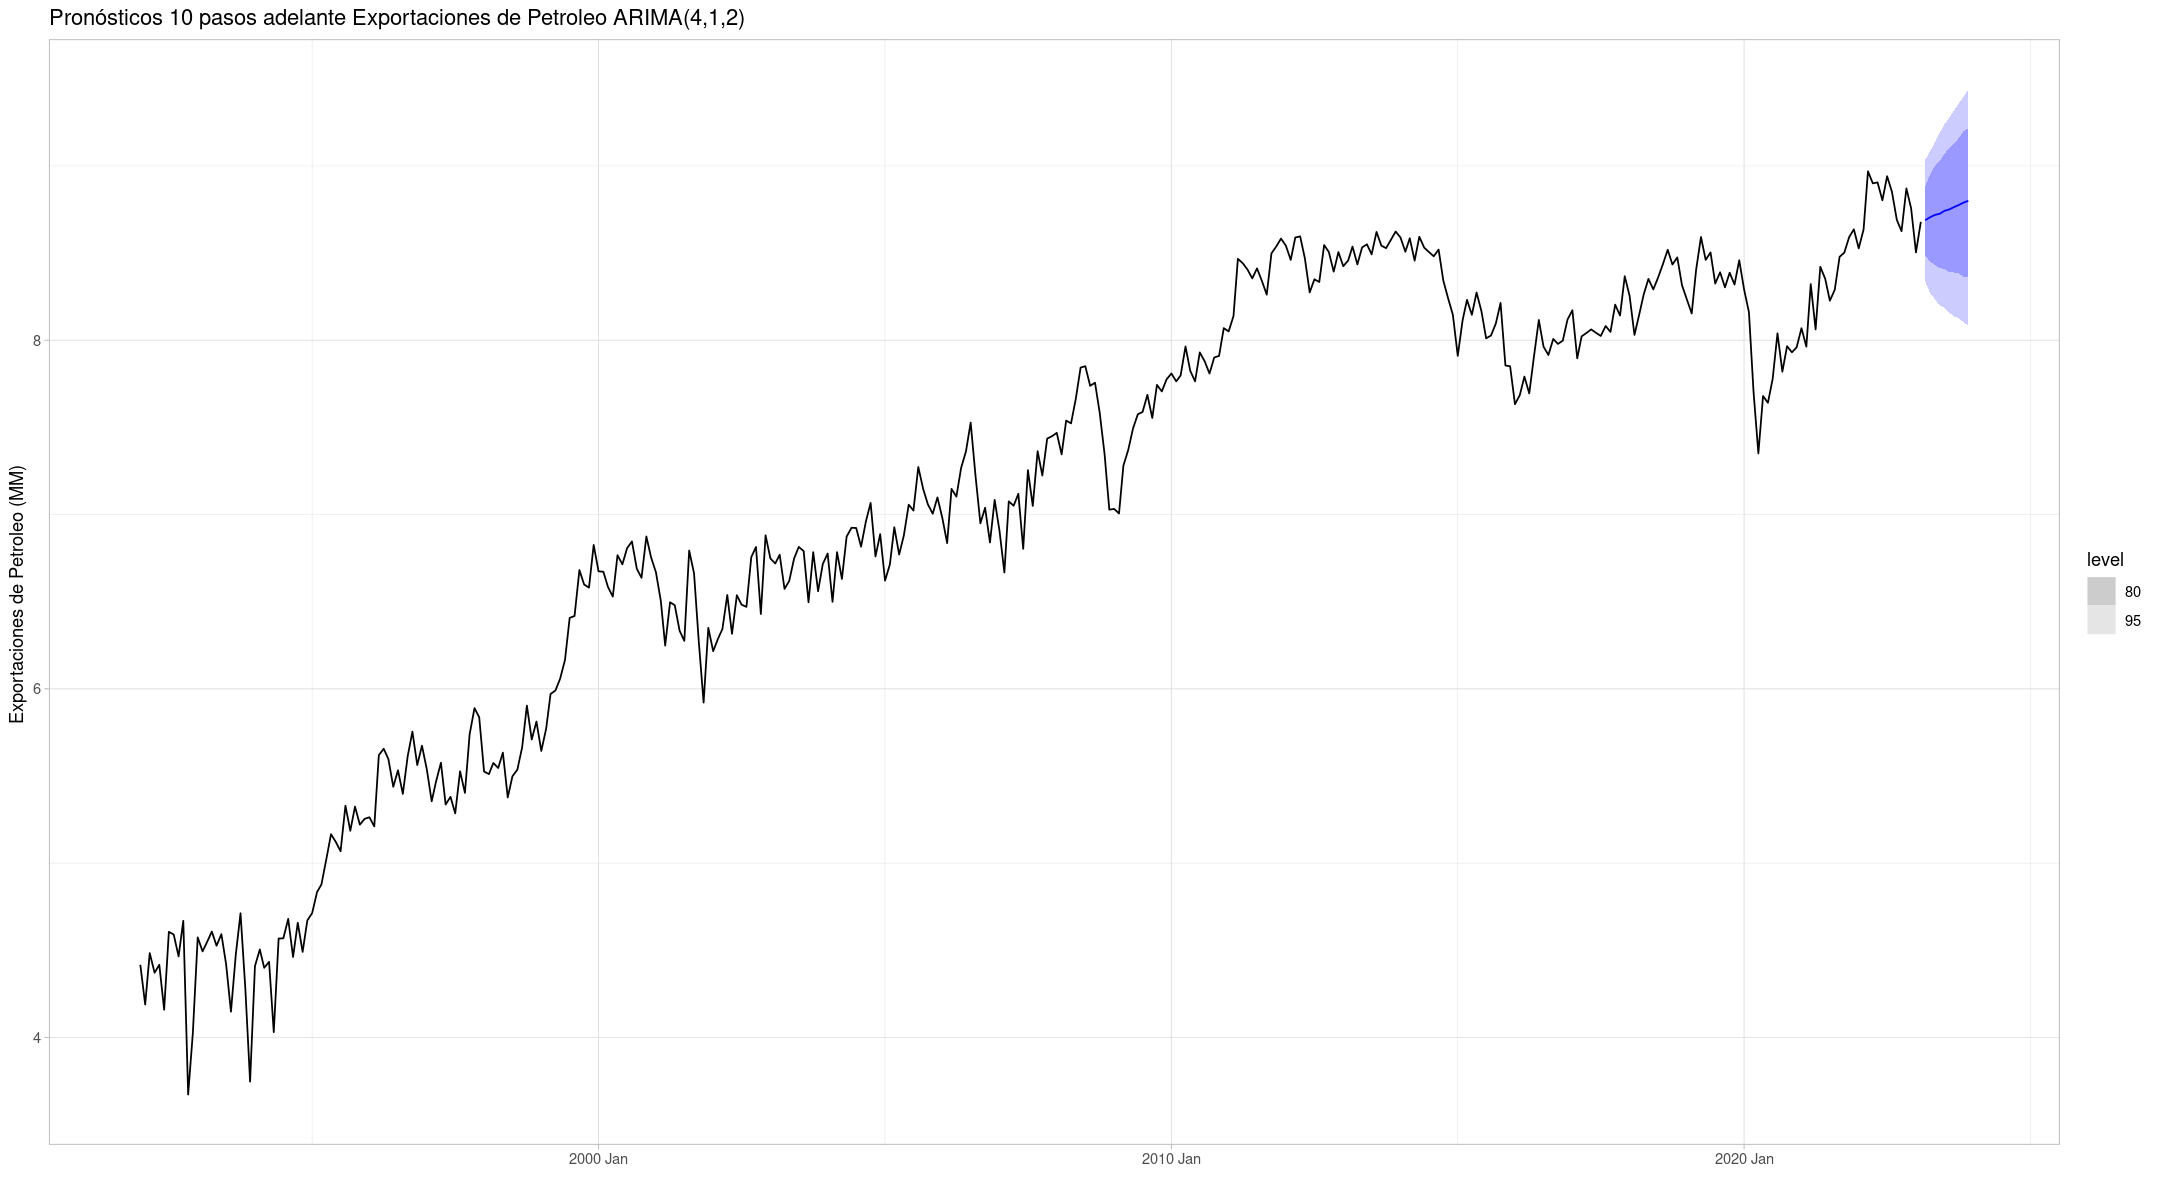

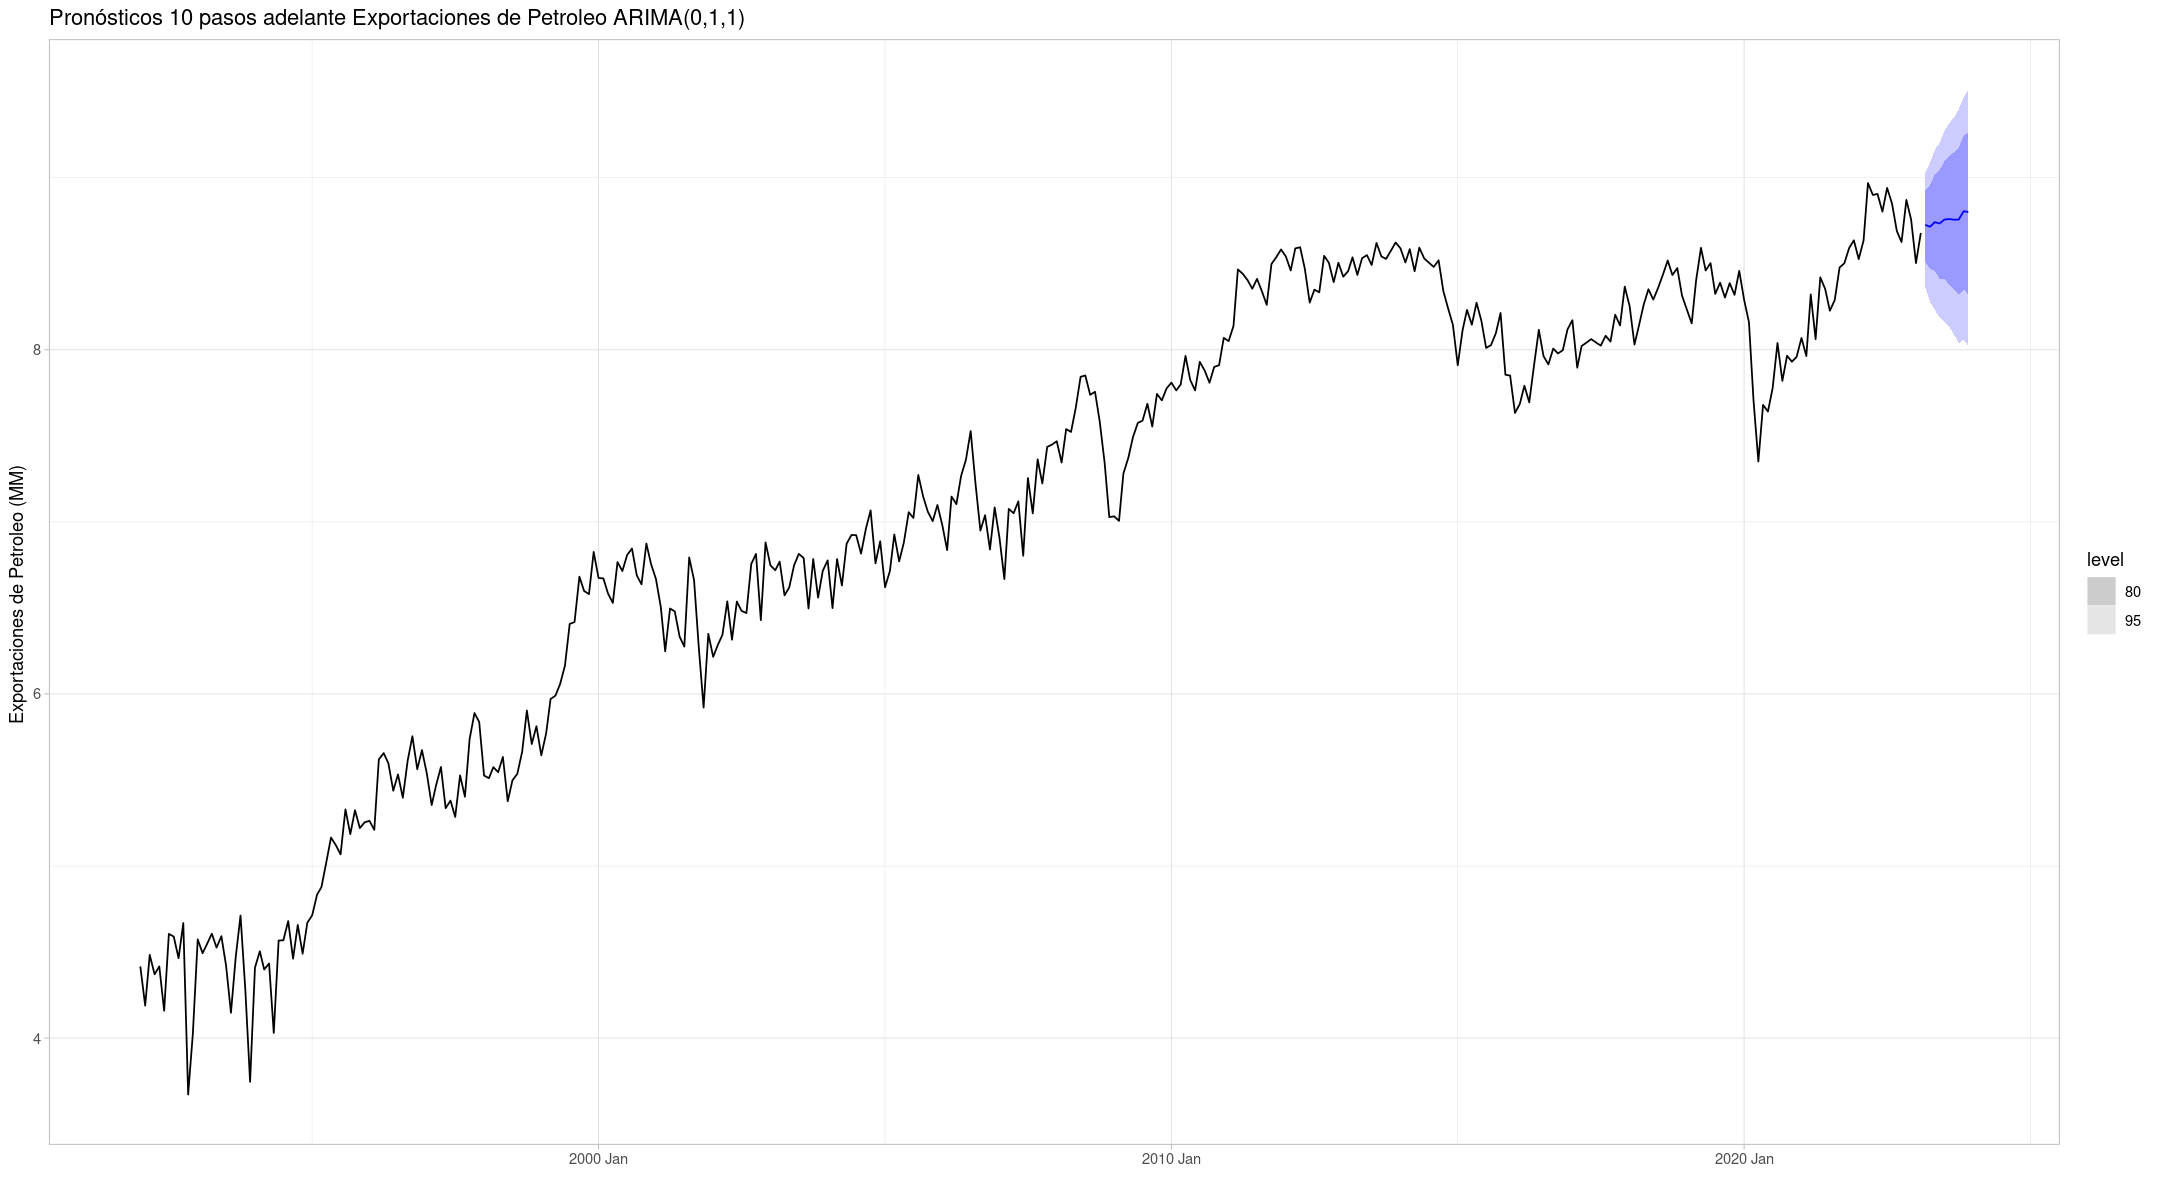

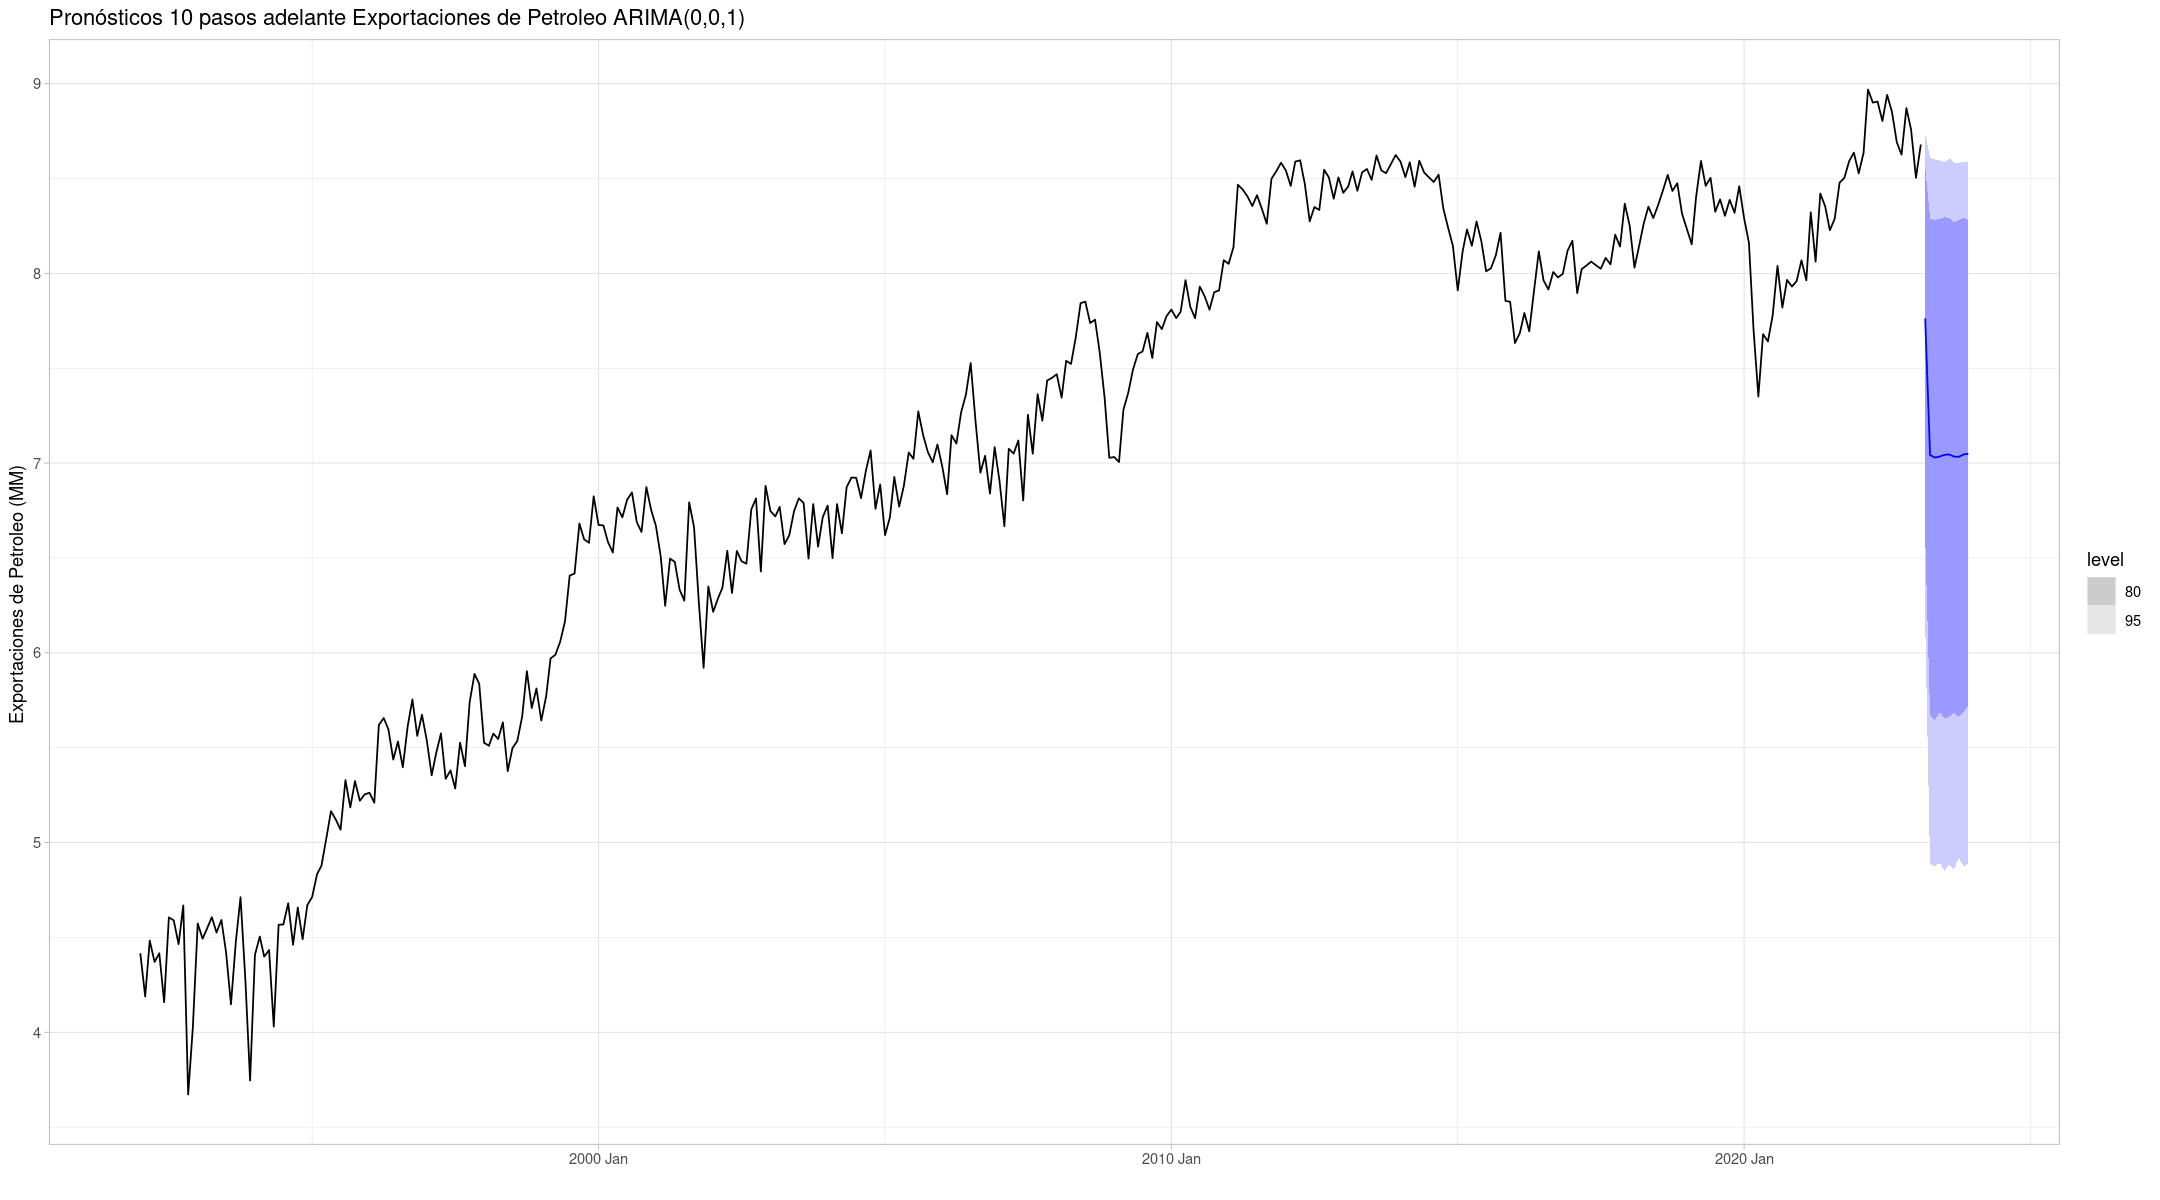

In [248]:
forescast_arima_4.1.2_lts %>% 
  autoplot(l.tsibble) + ggtitle("Pronósticos 10 pasos adelante Exportaciones de Petroleo ARIMA(4,1,2) ") + ylab("Exportaciones de Petroleo (MM) ") + xlab("") + theme_light()

forescast_arima_0.1.1_lts %>%
  autoplot(l.tsibble) + ggtitle("Pronósticos 10 pasos adelante Exportaciones de Petroleo ARIMA(0,1,1) ") + ylab("Exportaciones de Petroleo (MM) ") + xlab("") + theme_light()

# forescast_arima_4.0.3_lts %>%
#   autoplot(l.tsibble) + ggtitle("Pronósticos 10 pasos adelante Exportaciones de Petroleo ") + ylab("Exportaciones de Petroleo (MM) ") + xlab("") + theme_light()

forescast_arima_0.0.1_lts %>%
  autoplot(l.tsibble) + ggtitle("Pronósticos 10 pasos adelante Exportaciones de Petroleo ARIMA(0,0,1)") + ylab("Exportaciones de Petroleo (MM) ") + xlab("") + theme_light()

In [249]:
png("../Imagenes/Pred.png", width = 800, height = 600)
forescast_arima_0.1.1_lts %>%
  autoplot(l.tsibble) + ggtitle("Pronósticos 10 pasos adelante Exportaciones de Petroleo ARIMA(0,1,1) ") + ylab("Exportaciones de Petroleo (MM) ") + xlab("") + theme_light()
dev.off()

png 
  2

In [251]:
fit_1 <- l.ts - ts(residuals(arima_4.1.2_lts_fable)$.resid, start = 1992, frequency = 12)

fit_2 <- l.ts - ts(residuals(arima_0.1.1_lts_fable)$.resid, start = 1992, frequency = 12)

# fit_3 <- dl.ts - residuals(arima_4.0.3_lts_fable)

fit_4 <- dl.ts - ts(residuals(arima_0.0.1_lts_fable)$.resid, start = 1992, frequency = 12)

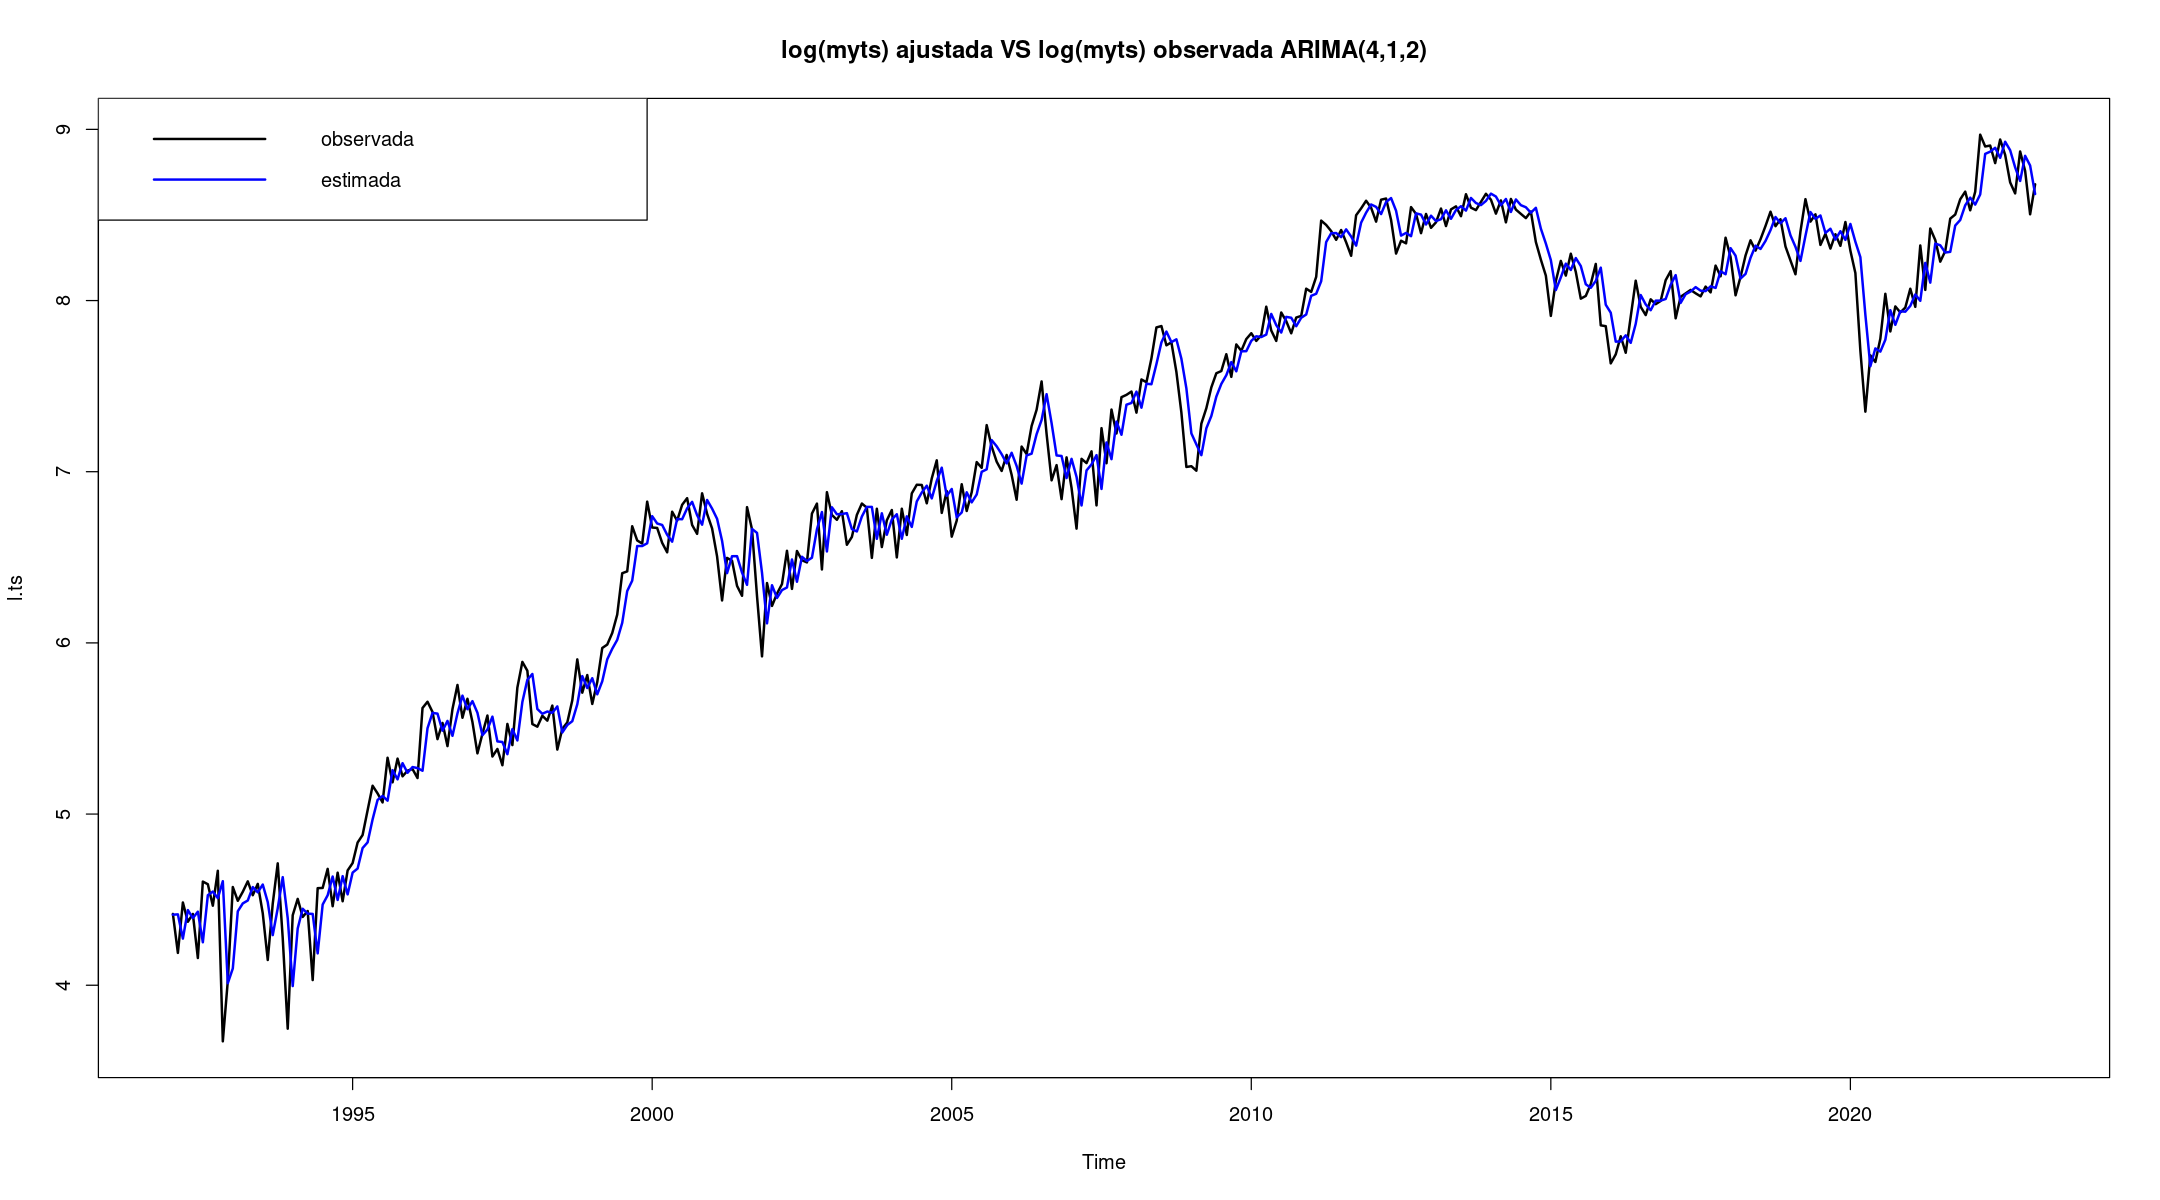

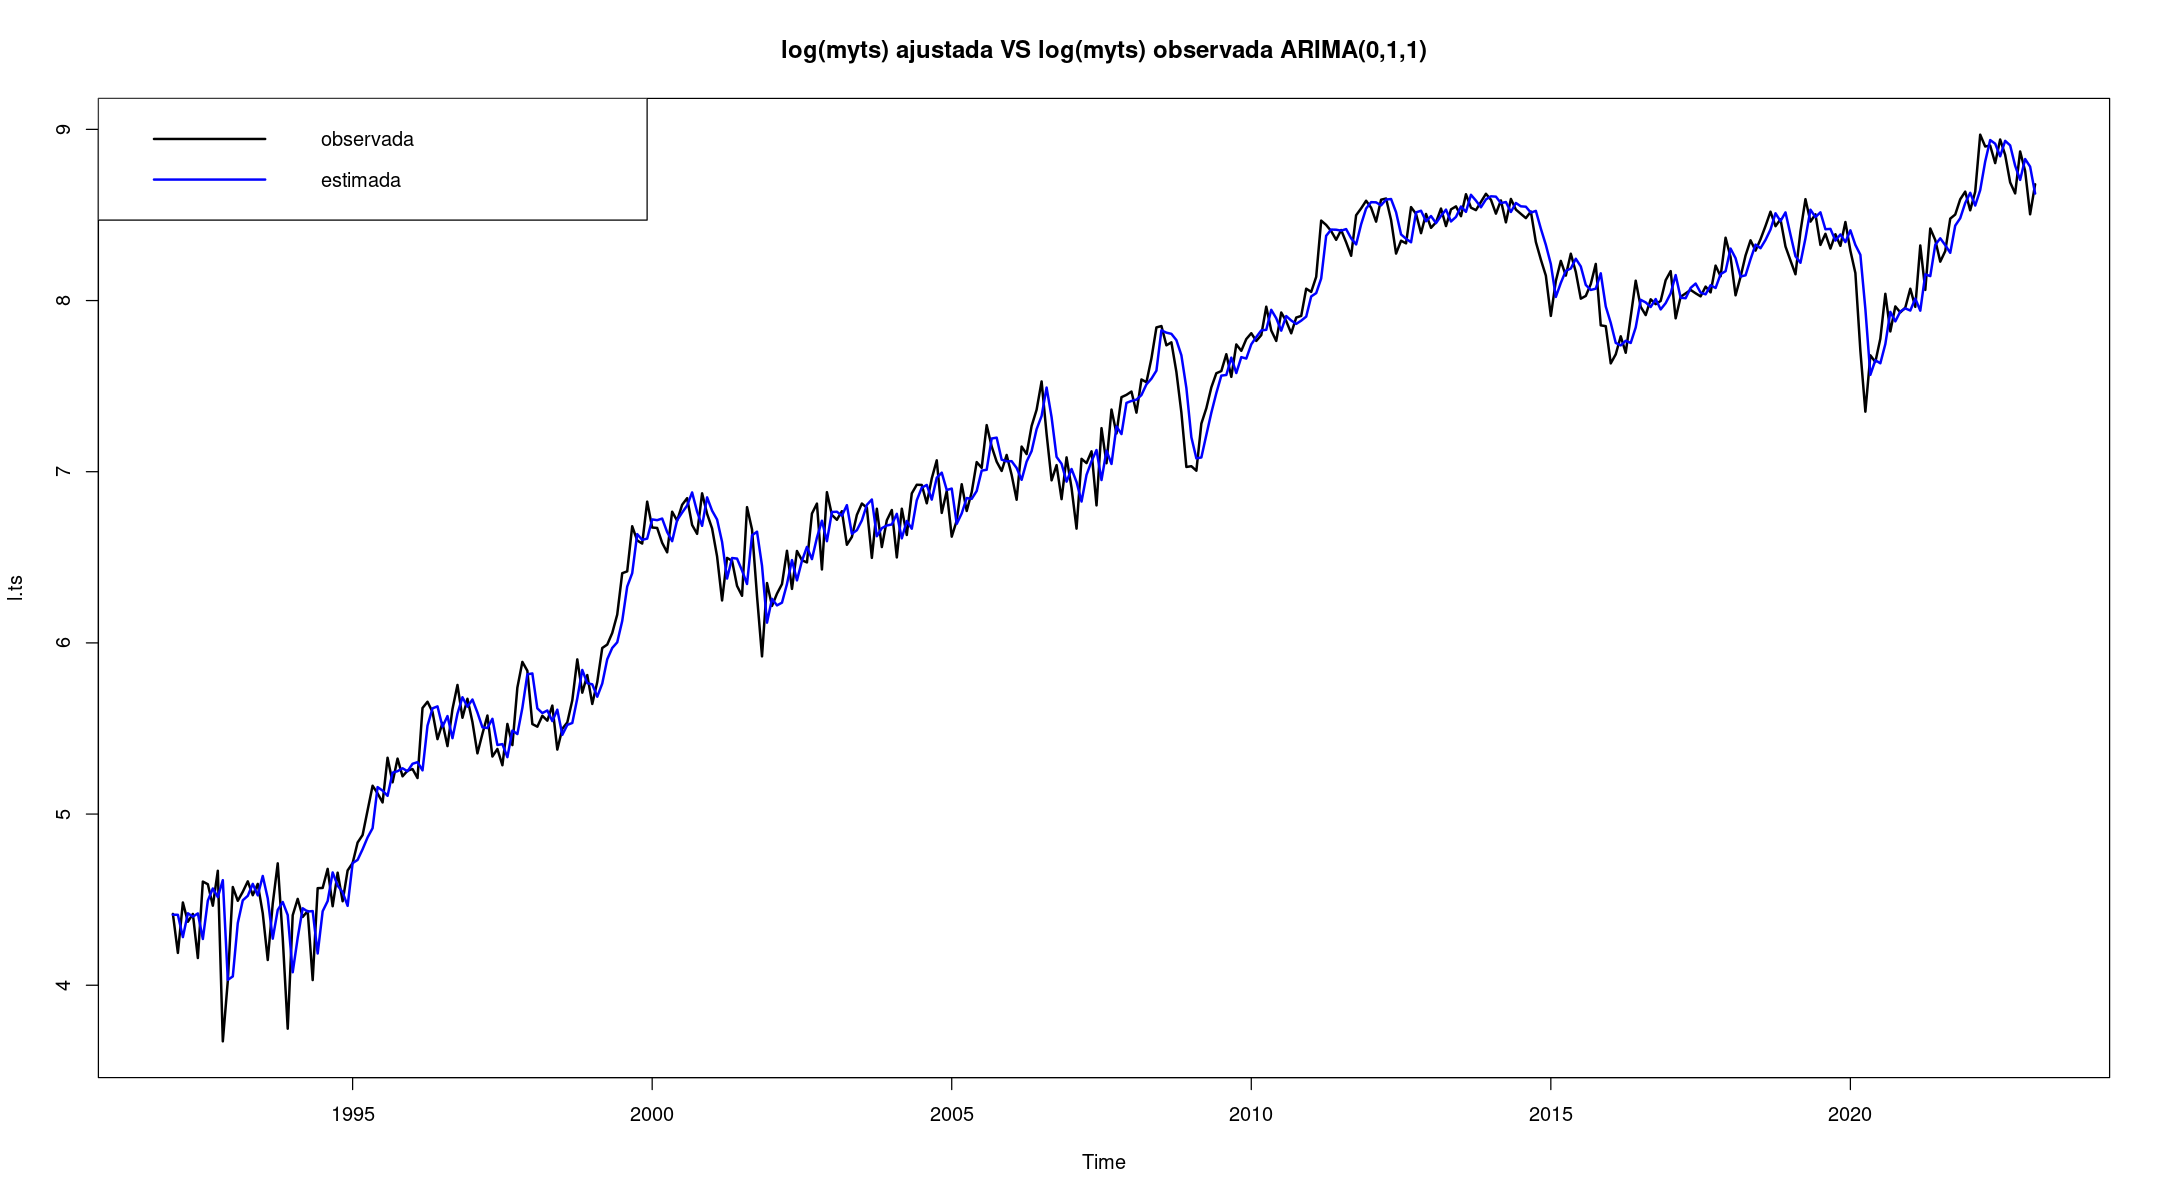

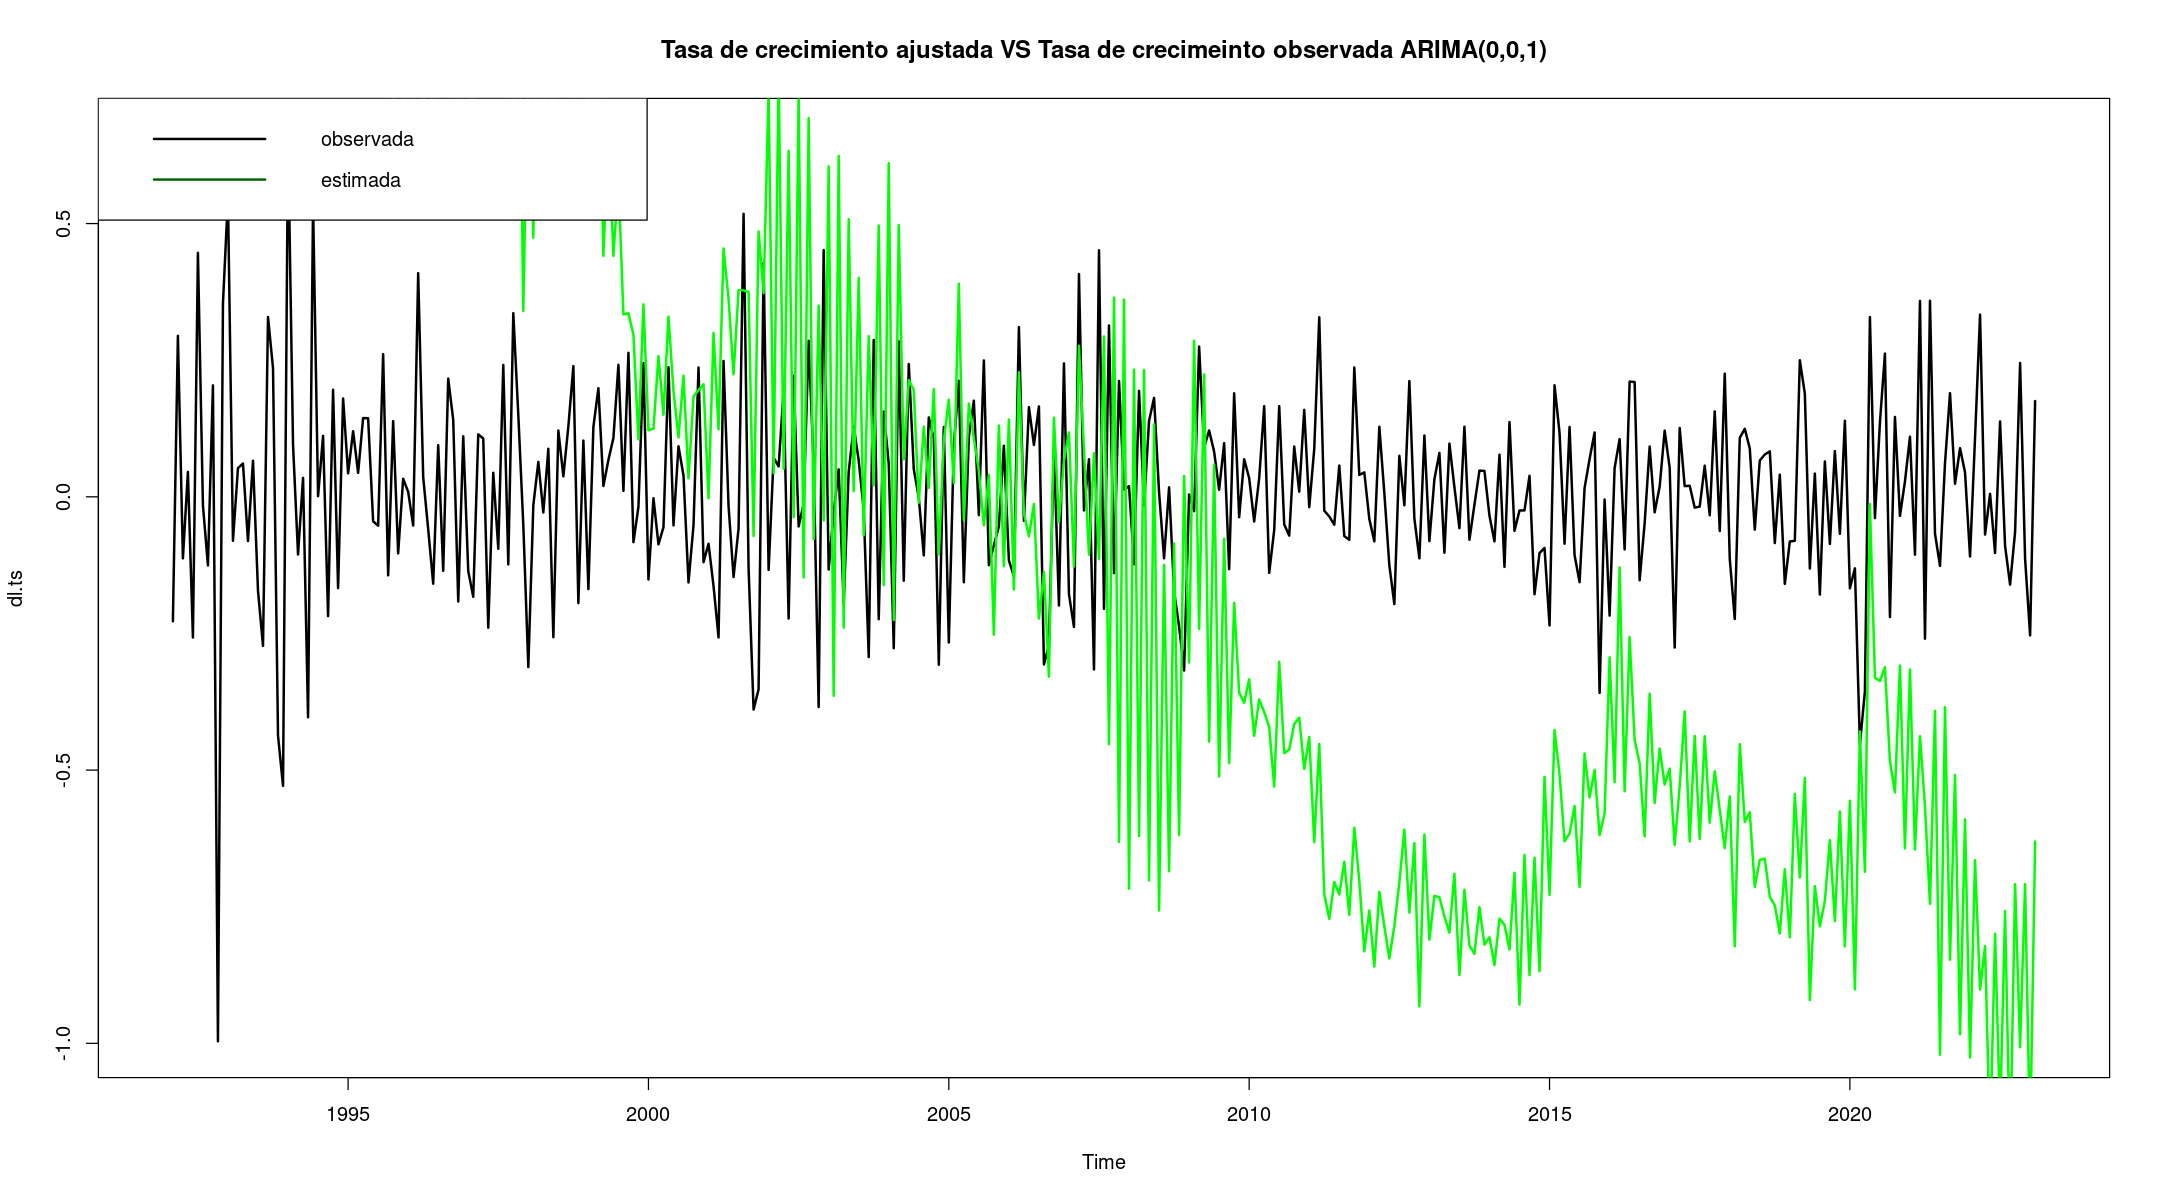

In [252]:
plot.ts(l.ts,type="l",main="log(myts) ajustada VS log(myts) observada ARIMA(4,1,2)",lwd=2)
points(fit_1,col="blue",lwd=2, type = "l")
legend("topleft",c("observada", "estimada"), col=c("black","blue"),lty=1,lwd=2)

plot.ts(l.ts,type="l",main="log(myts) ajustada VS log(myts) observada ARIMA(0,1,1)",lwd=2)
points(fit_2,col="blue",lwd=2, type = "l")
legend("topleft",c("observada", "estimada"), col=c("black","blue"),lty=1,lwd=2)

# plot.ts(dl.ts,type="l",main="log(indprod) ajustada VS log(indprod) observada",lwd=2)
# points(fit_3,col="blue",lwd=2, type = "l")
# legend("topleft",c("observada", "estimada"), col=c("black","blue"),lty=1,lwd=2)

plot.ts(dl.ts,type="l",main="Tasa de crecimiento ajustada VS Tasa de crecimeinto observada ARIMA(0,0,1)",lwd=2)
points(fit_4,col="green",lwd=2, type = "l")
legend("topleft",c("observada", "estimada"), col=c("black","darkgreen"),lty=1,lwd=2)

In [250]:
png("../Imagenes/ajuste.png", width = 800, height = 600)
plot.ts(l.ts,type="l",main="log(myts) ajustada VS log(myts) observada ARIMA(0,1,1)",lwd=2)
points(fit_2,col="blue",lwd=2, type = "l")
legend("topleft",c("observada", "estimada"), col=c("black","blue"),lty=1,lwd=2)
dev.off()

png 
  2